# ASSIGNMENT 4: Take the code that I uploaded and then change the generator and the discriminator architectures by introducing convolution layers. Use one of the classes from the CIFAR-10 dataset to generate images. Show the effect of controlling the noise vector.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import os
import shutil


In [4]:
# Load the CIFAR-10 dataset with the "dogs" class labels
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (_, _) = cifar10.load_data()

# Filter the dataset to keep only the "airplanes" class (class label 5)
airplanes_indices = np.where(y_train == 0)[0]
X_airplanes = X_train[airplanes_indices]

# Normalize and rescale images to the range [0, 1]
# X_airplanes = X_airplanes.astype(np.float32) / 255.0  # Normalize to [0, 1]
# Normalize and rescale images to the range [-1, 1]
X_airplanes = (X_airplanes.astype(np.float32) / 127.5) - 1.0

In [30]:
from tensorflow.keras.datasets import mnist

In [5]:
# Define a function to plot a grid of images
def plot_images(images, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()


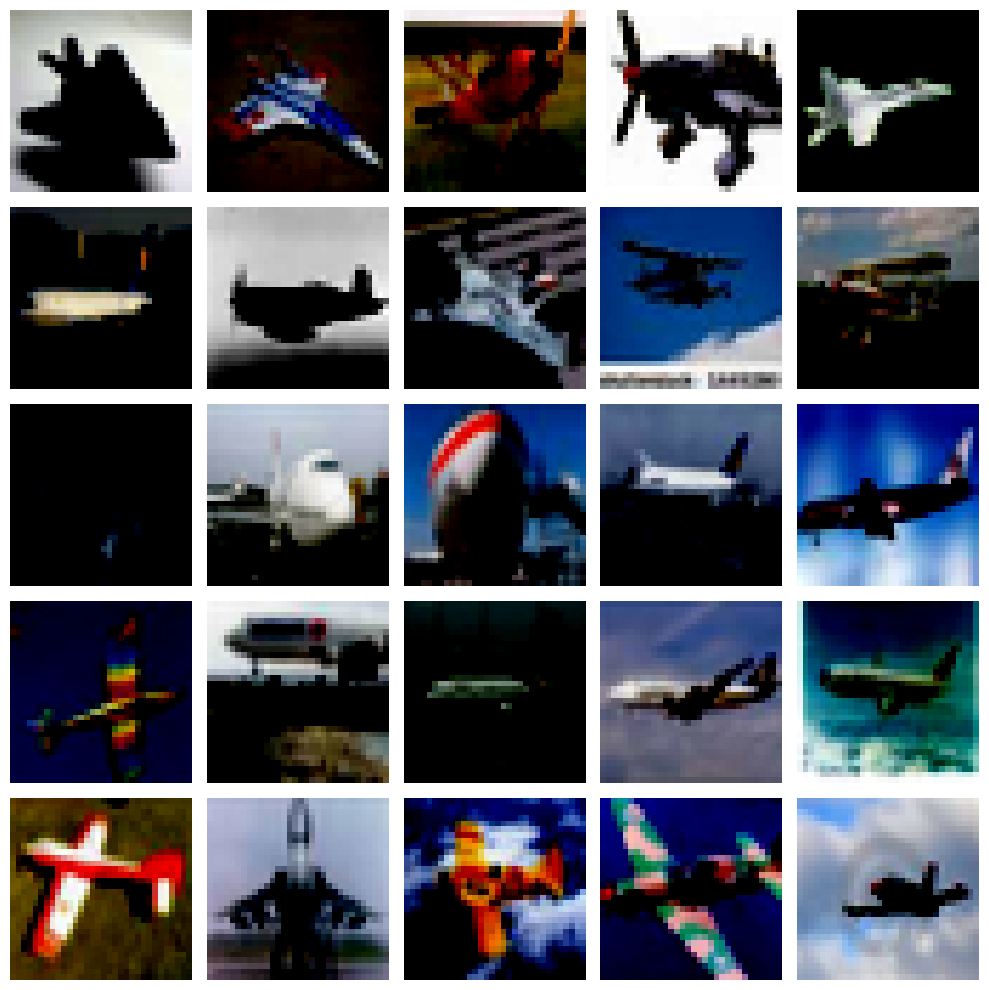

In [6]:
plot_images(X_airplanes[:25], 5, 5)

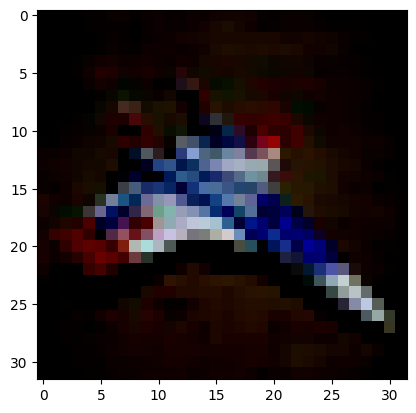

In [7]:
# Select single image from your dataset
single_image = X_airplanes[1]  

# Display the single image
plt.imshow(single_image)
plt.axis('on') 
plt.show()

In [13]:
# Define a noise function for generating random noise - add seed
def generate_random_noise(batch_size, latent_dim):
    np.random.seed(43)
    return np.random.normal(0, 1, (batch_size, latent_dim))

In [9]:
def load_model_weights(gan, epoch):
    # Define the directory where the weights are saved
    load_dir = 'gan_weights'

    # Load the generator and discriminator weights for the specified epoch
    gan.generator.load_weights(f'{load_dir}/generator_weights_epoch_{epoch}.h5')
    gan.discriminator.load_weights(f'{load_dir}/discriminator_weights_epoch_{epoch}.h5')
      
        # Clear the directory
    shutil.rmtree(load_dir)
    # Recreate the directory
    os.makedirs(load_dir)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 flatten_3 (Flatten)         (None, 16384)            

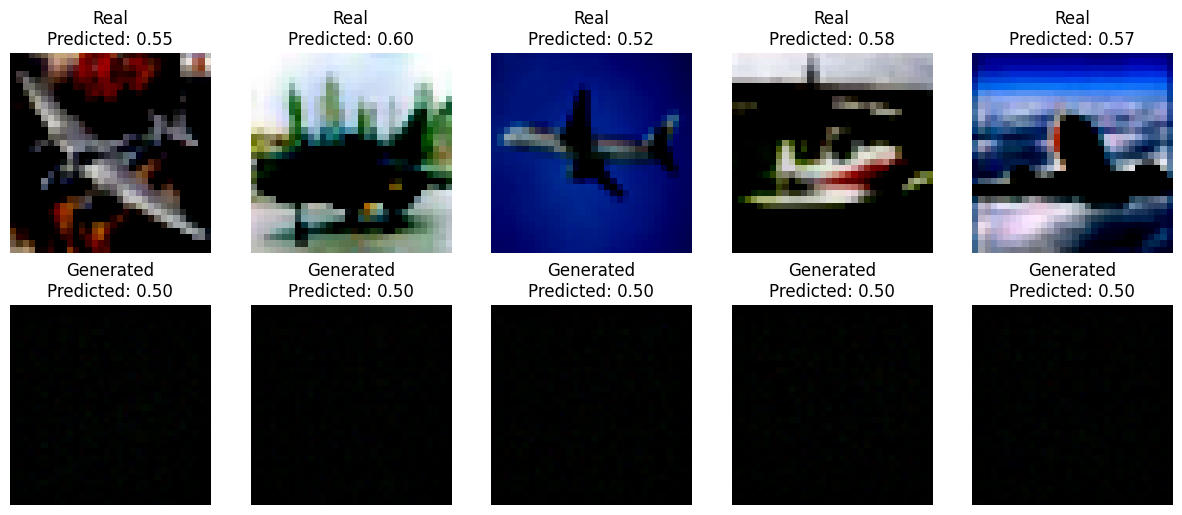

0 [D loss: 0.698970, acc.: 17.19%] [G loss: 0.691228]
1/1 [==============================] - 0s 18ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.98355615]
 [0.9999976 ]
 [0.92090195]
 [0.9347028 ]
 [0.25629303]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.01578795]
 [0.01010266]
 [0.03341466]
 [0.17865336]
 [0.01696287]]
1/1 [==============================] - 0s 19ms/step


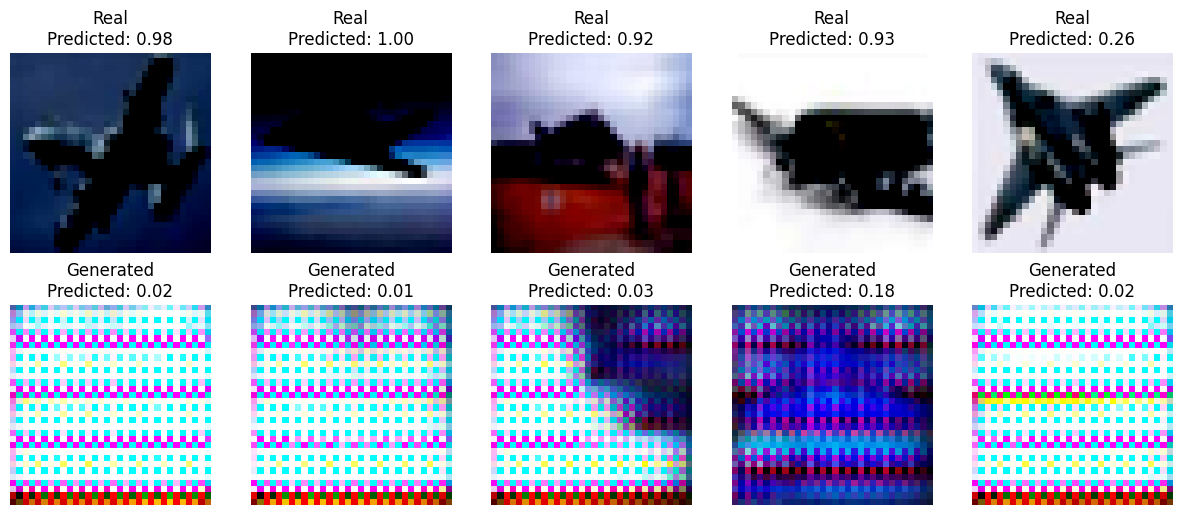

200 [D loss: 0.187641, acc.: 90.62%] [G loss: 3.660727]
1/1 [==============================] - 0s 18ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 27ms/step
[[0.51551527]
 [0.965175  ]
 [0.7317984 ]
 [0.43866274]
 [0.48669472]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.35638365]
 [0.4163381 ]
 [0.4306884 ]
 [0.46087927]
 [0.4073501 ]]
1/1 [==============================] - 0s 19ms/step


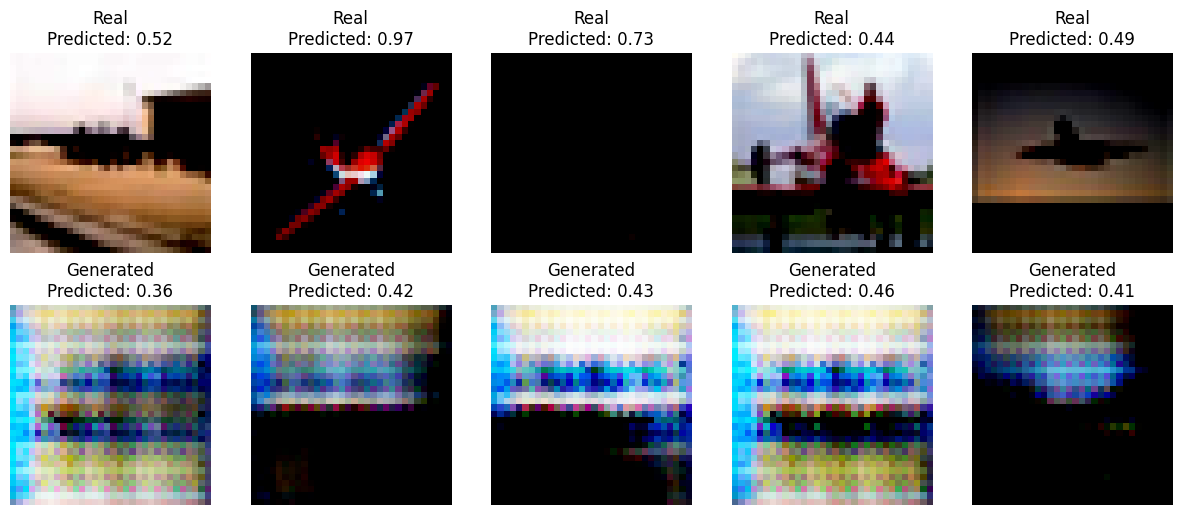

400 [D loss: 0.665517, acc.: 50.00%] [G loss: 0.956191]
1/1 [==============================] - 0s 18ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.6810785 ]
 [0.39747986]
 [0.6311238 ]
 [0.47034365]
 [0.63412213]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.3428334 ]
 [0.24015944]
 [0.34035772]
 [0.5271861 ]
 [0.2927104 ]]
1/1 [==============================] - 0s 19ms/step


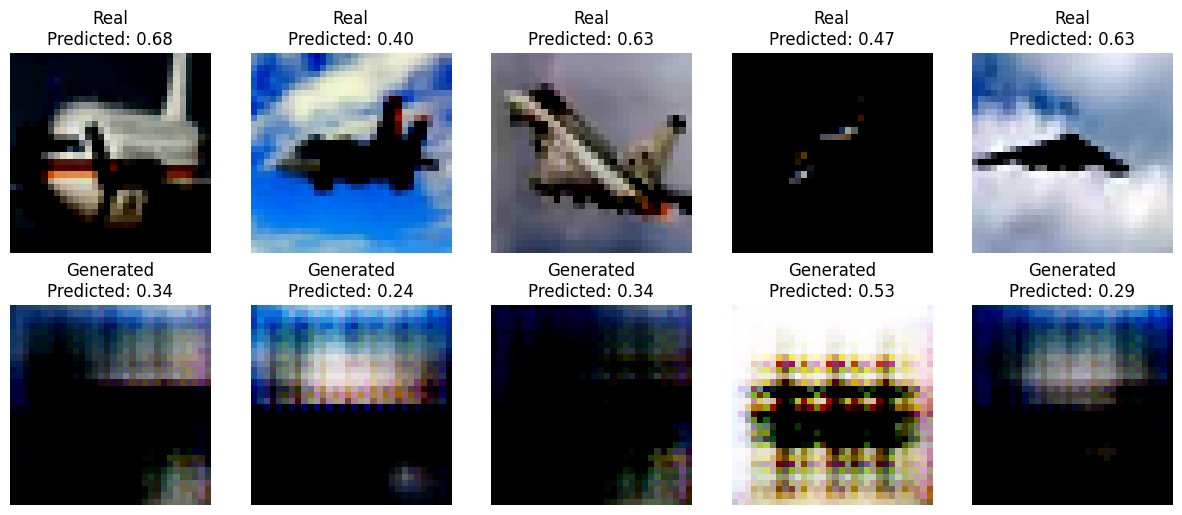

600 [D loss: 0.657330, acc.: 62.50%] [G loss: 0.984064]
1/1 [==============================] - 0s 17ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.6929548 ]
 [0.82521677]
 [0.63050103]
 [0.65997946]
 [0.6388182 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.26944572]
 [0.2317125 ]
 [0.32832757]
 [0.23706056]
 [0.36588308]]
1/1 [==============================] - 0s 19ms/step


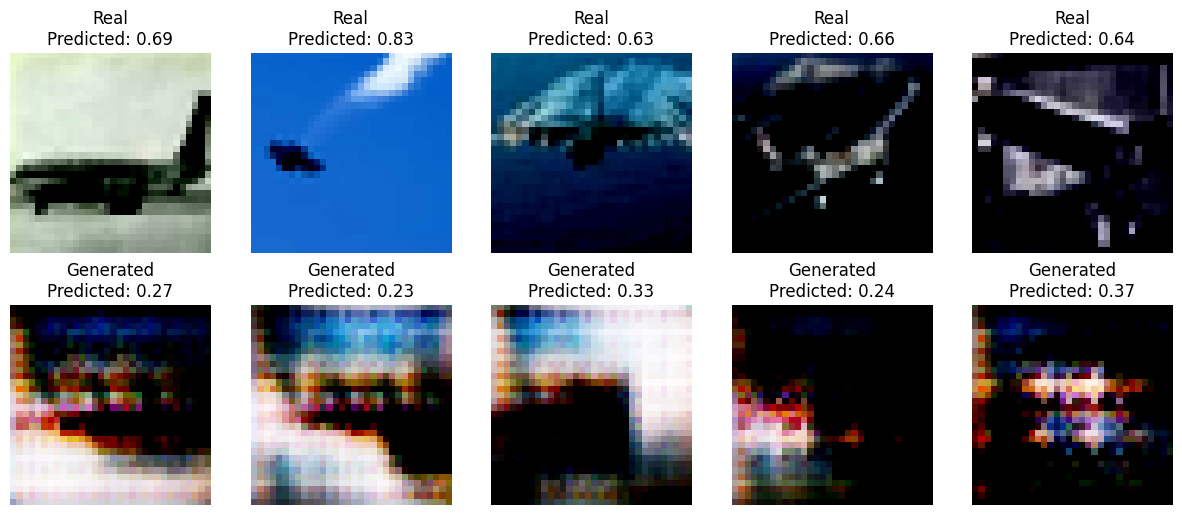

800 [D loss: 0.502094, acc.: 79.69%] [G loss: 1.117131]
1/1 [==============================] - 0s 21ms/step


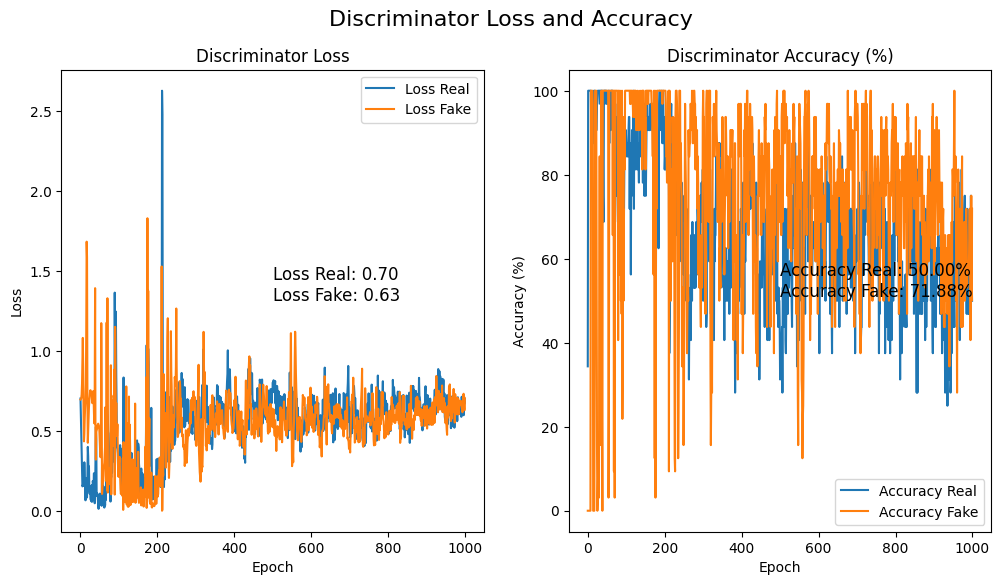

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, LeakyReLU, BatchNormalization, Conv2D
from tensorflow.keras.models import Sequential, Model

class GAN():
    def __init__(self):
        self.img_rows = 32  # CIFAR-10 image dimensions (32x32)
        self.img_cols = 32
        self.channels = 3  # CIFAR-10 images have 3 color channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
#         self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0002, beta1=0.1)
        self.optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])

        # Build and compile the generator
        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=self.optimizer)

        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model, we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model (stacked generator and discriminator) takes
        # noise as input => generates images => determines validity
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=self.optimizer)

        # Initialize lists to store loss and accuracy values
        self.d_loss_real_values = []
        self.d_loss_fake_values = []
        self.d_accuracy_real_values = []
        self.d_accuracy_fake_values = []

    def build_generator(self):
        model = Sequential()

#         model.add(Dense(256, input_dim=self.latent_dim))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(Dense(512))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(Dense(1024))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(Dense(np.prod(self.img_shape), activation='tanh'))
#         model.add(Reshape(self.img_shape))

        n_nodes = 256 * 4 * 4
        model.add(Dense(n_nodes, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 256)))

        # Upsample to 8x8
        model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))

        # Upsample to 16x16
        model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))

        # Upsample to 32x32
        model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))

        # Output layer
        model.add(Conv2D(self.channels, (3, 3), activation='tanh', padding='same'))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(64, (3, 3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, noise_function, epochs, batch_size=128, save_interval=50):
        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_airplanes.shape[0], batch_size)
            imgs = X_airplanes[idx]

            noise = noise_function(batch_size, self.latent_dim)

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            if epoch % save_interval == 0:
                print("Discriminator Predictions for Real Data:")
                print(self.discriminator.predict(imgs[:5]))  # Print predictions for the first 5 real samples
                print("Discriminator Predictions for Generated Data:")
                print(self.discriminator.predict(gen_imgs[:5]))  # Print predictions for the first 5 generated samples
                self.display_discriminator_predictions(imgs[:5], gen_imgs[:5])

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = noise_function(batch_size, self.latent_dim)

            # The generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = np.array([1] * batch_size)

            # Train the generator
            g_loss = self.combined.train_on_batch(noise, valid_y)

            self.d_loss_real_values.append(d_loss_real[0])
            self.d_loss_fake_values.append(d_loss_fake[0])
            self.d_accuracy_real_values.append(100 * d_loss_real[1])
            self.d_accuracy_fake_values.append(100 * d_loss_fake[1])

            # Plot the progress
            if epoch % save_interval == 0:
                print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
                self.save_model_weights(epoch)

        self.plot_loss_accuracy()

    def display_discriminator_predictions(self, real_imgs, generated_imgs):
        fig, axs = plt.subplots(2, 5, figsize=(15, 6))

        # Display real images and discriminator predictions
        for i in range(5):
            axs[0, i].imshow(real_imgs[i])
            axs[0, i].axis('off')
            axs[0, i].set_title(f"Real\nPredicted: {self.discriminator.predict(np.expand_dims(real_imgs[i], axis=0))[0][0]:.2f}")

        # Display generated images and discriminator predictions
        for i in range(5):
            axs[1, i].imshow(generated_imgs[i])
            axs[1, i].axis('off')
            axs[1, i].set_title(f"Generated\nPredicted: {self.discriminator.predict(np.expand_dims(generated_imgs[i], axis=0))[0][0]:.2f}")

        plt.show()

    def save_model_weights(self, epoch):
        # Define a directory to save the weights for each epoch
        save_dir = 'gan_weights'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save generator and discriminator weights
        self.generator.save_weights(f'{save_dir}/generator_weights_epoch_{epoch}.h5')
        self.discriminator.save_weights(f'{save_dir}/discriminator_weights_epoch_{epoch}.h5')

    def plot_loss_accuracy(self):
        # Plot the graph
        plt.figure(figsize=(12, 6))

        # Plot discriminator loss
        plt.subplot(121)
        plt.plot(self.d_loss_real_values, label='Loss Real')
        plt.plot(self.d_loss_fake_values, label='Loss Fake')
        plt.title('Discriminator Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Calculate and display loss percentages
        last_loss_real = self.d_loss_real_values[-1]
        last_loss_fake = self.d_loss_fake_values[-1]
        plt.text(0.5, 0.5, f'Loss Real: {last_loss_real:.2f}\nLoss Fake: {last_loss_fake:.2f}', transform=plt.gca().transAxes, fontsize=12,
                 verticalalignment='baseline')

        # Plot discriminator accuracy
        plt.subplot(122)
        plt.plot(self.d_accuracy_real_values, label='Accuracy Real')
        plt.plot(self.d_accuracy_fake_values, label='Accuracy Fake')
        plt.title('Discriminator Accuracy (%)')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()

        # Calculate and display accuracy percentages
        last_accuracy_real = self.d_accuracy_real_values[-1]
        last_accuracy_fake = self.d_accuracy_fake_values[-1]
        plt.text(0.5, 0.5, f'Accuracy Real: {last_accuracy_real:.2f}%\nAccuracy Fake: {last_accuracy_fake:.2f}%',
                 transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom')

        # Add a title to the graph
        plt.suptitle('Discriminator Loss and Accuracy', fontsize=16)

        plt.show()

if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=1000, noise_function=generate_random_noise, batch_size=32, save_interval=200)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 flatten_4 (Flatten)         (None, 16384)            

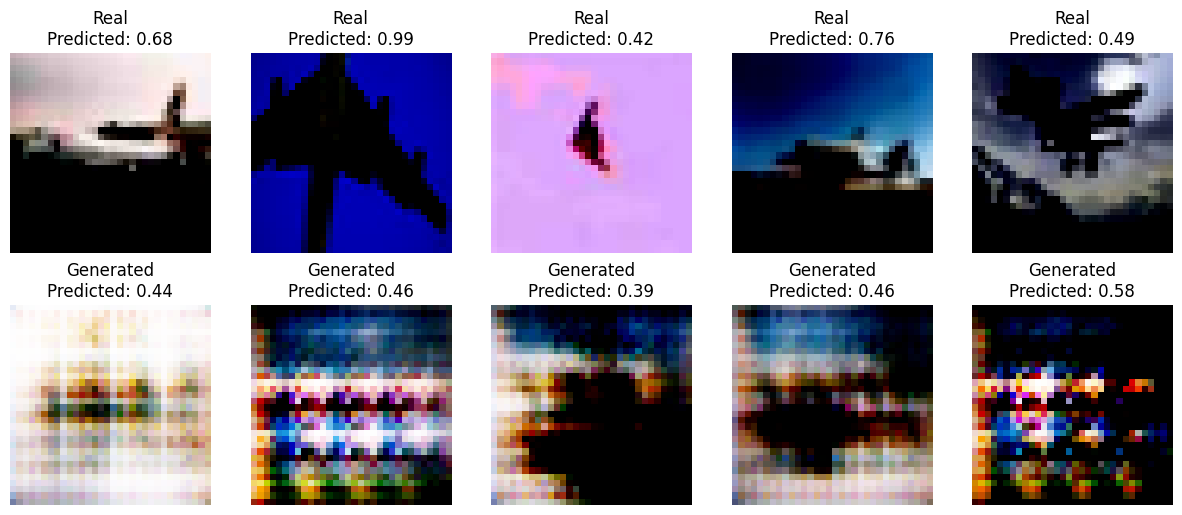

0 [D loss: 0.637613, acc.: 53.91%] [G loss: 0.841547]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.46296602]
 [0.5026382 ]
 [0.61767536]
 [0.5757787 ]
 [0.48001665]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.46060702]
 [0.558981  ]
 [0.43266028]
 [0.33621737]
 [0.36824295]]
1/1 [==============================] - 0s 20ms/step


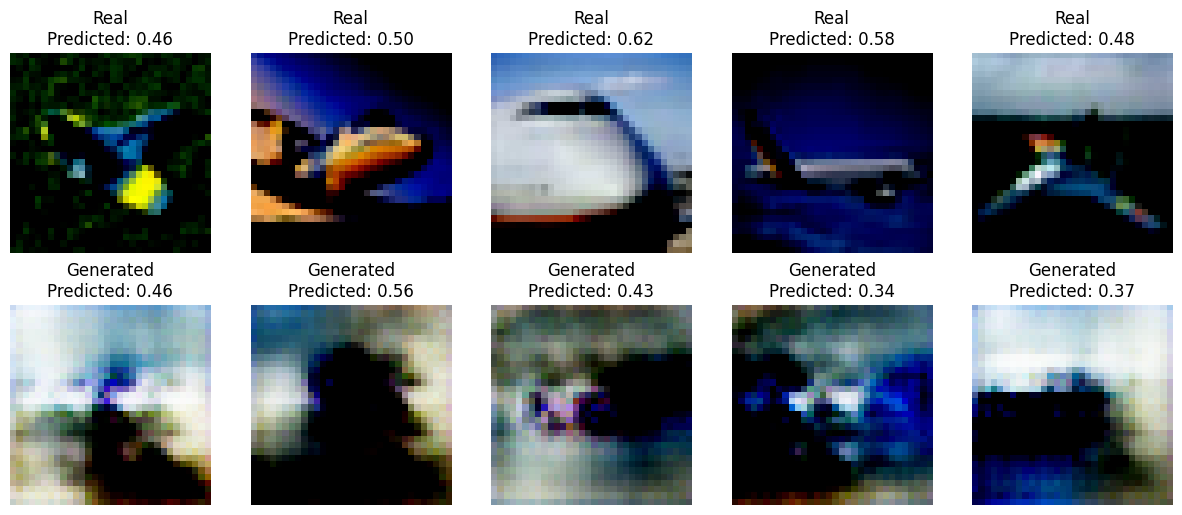

200 [D loss: 0.667852, acc.: 54.69%] [G loss: 0.846632]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.33040768]
 [0.3365316 ]
 [0.61827654]
 [0.34859213]
 [0.4222706 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.32600787]
 [0.5311035 ]
 [0.5636397 ]
 [0.5023799 ]
 [0.62322795]]
1/1 [==============================] - 0s 18ms/step


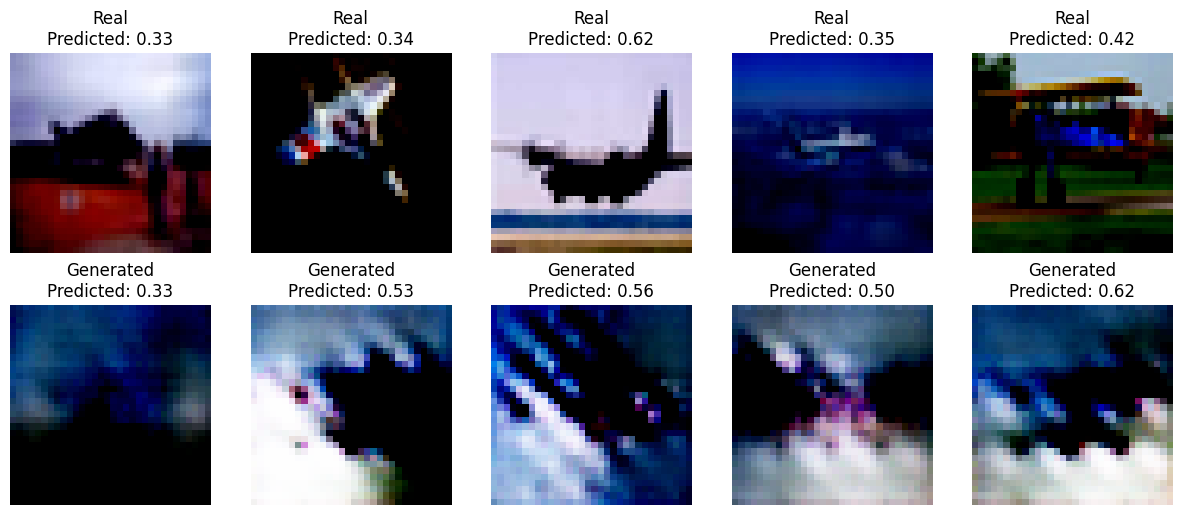

400 [D loss: 0.660766, acc.: 59.38%] [G loss: 0.940141]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.53158826]
 [0.46919507]
 [0.66300565]
 [0.5339325 ]
 [0.6387048 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.4261293 ]
 [0.26575023]
 [0.29472932]
 [0.35991636]
 [0.36084497]]
1/1 [==============================] - 0s 21ms/step


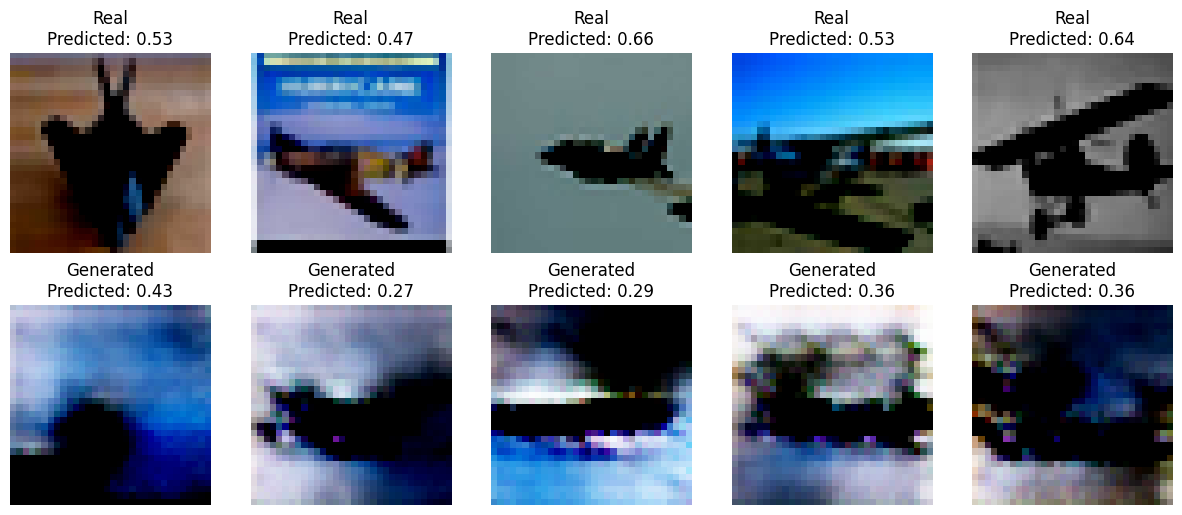

600 [D loss: 0.647270, acc.: 60.94%] [G loss: 1.158351]
2/2 [==============================] - 0s 7ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 28ms/step
[[0.5464541 ]
 [0.83713394]
 [0.4307243 ]
 [0.98199695]
 [0.3908864 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 32ms/step
[[0.07165579]
 [0.44828516]
 [0.1510415 ]
 [0.6590159 ]
 [0.33525485]]
1/1 [==============================] - 0s 19ms/step


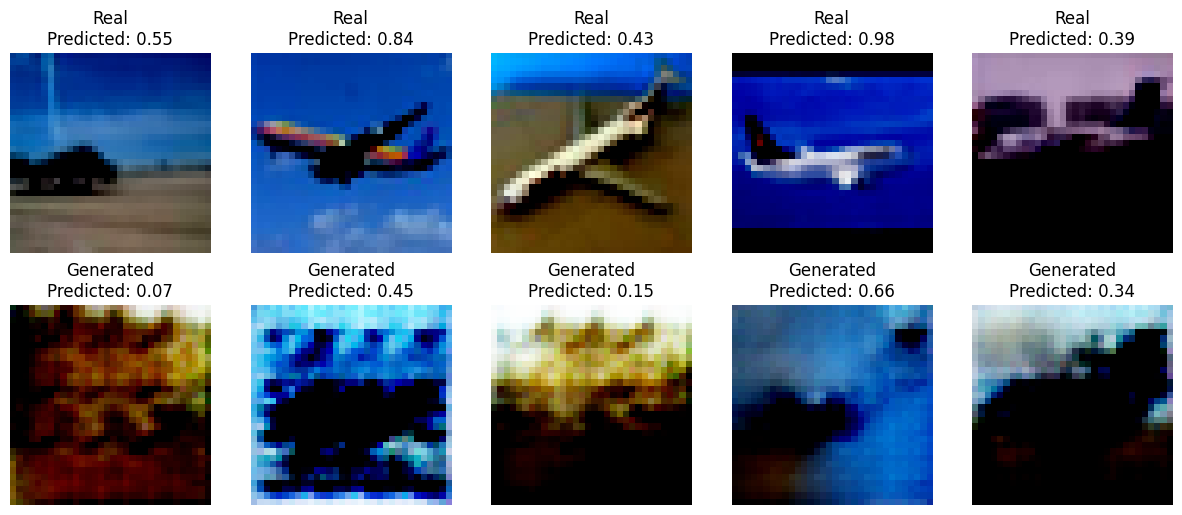

800 [D loss: 0.708800, acc.: 53.12%] [G loss: 1.177713]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.53683823]
 [0.6223266 ]
 [0.64688003]
 [0.6869098 ]
 [0.7437122 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.33969462]
 [0.564257  ]
 [0.43796775]
 [0.34545565]
 [0.31087306]]
1/1 [==============================] - 0s 23ms/step


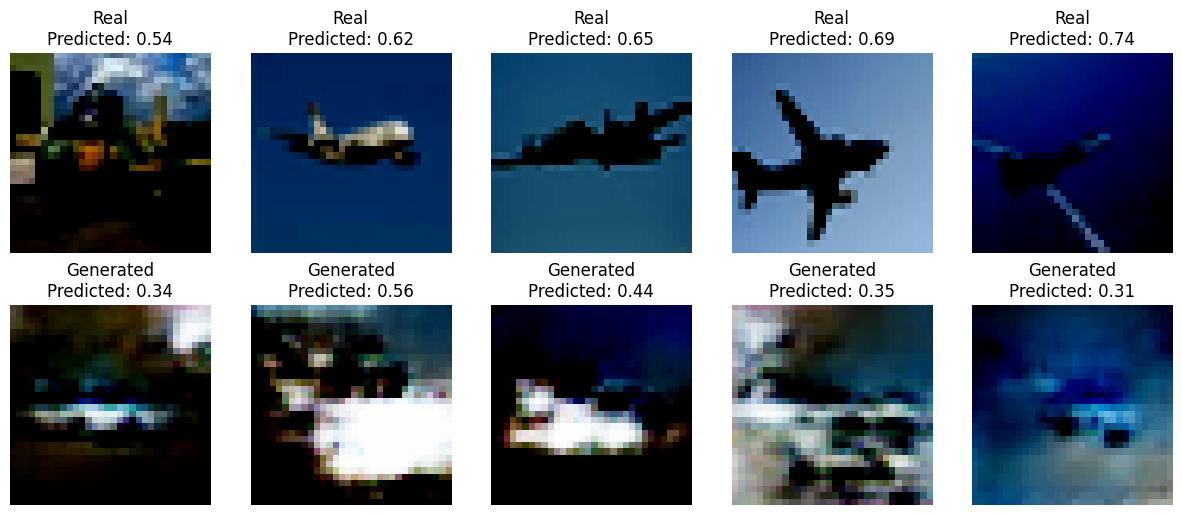

1000 [D loss: 0.611909, acc.: 69.53%] [G loss: 0.965562]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.6482426 ]
 [0.6932431 ]
 [0.58235484]
 [0.58988744]
 [0.30297002]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.30251494]
 [0.30418658]
 [0.35876408]
 [0.47227105]
 [0.46461   ]]
1/1 [==============================] - 0s 21ms/step


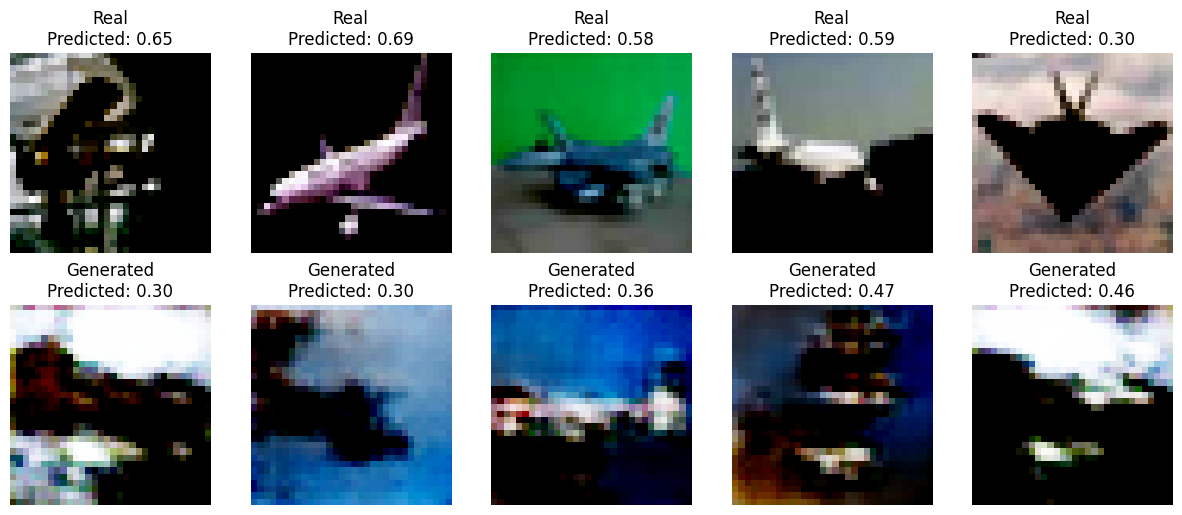

1200 [D loss: 0.712231, acc.: 50.00%] [G loss: 0.842903]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 24ms/step
[[0.3679424 ]
 [0.5421154 ]
 [0.6488995 ]
 [0.4930968 ]
 [0.45091918]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 25ms/step
[[0.41461593]
 [0.5232091 ]
 [0.42652687]
 [0.36933878]
 [0.39734873]]
1/1 [==============================] - 0s 25ms/step


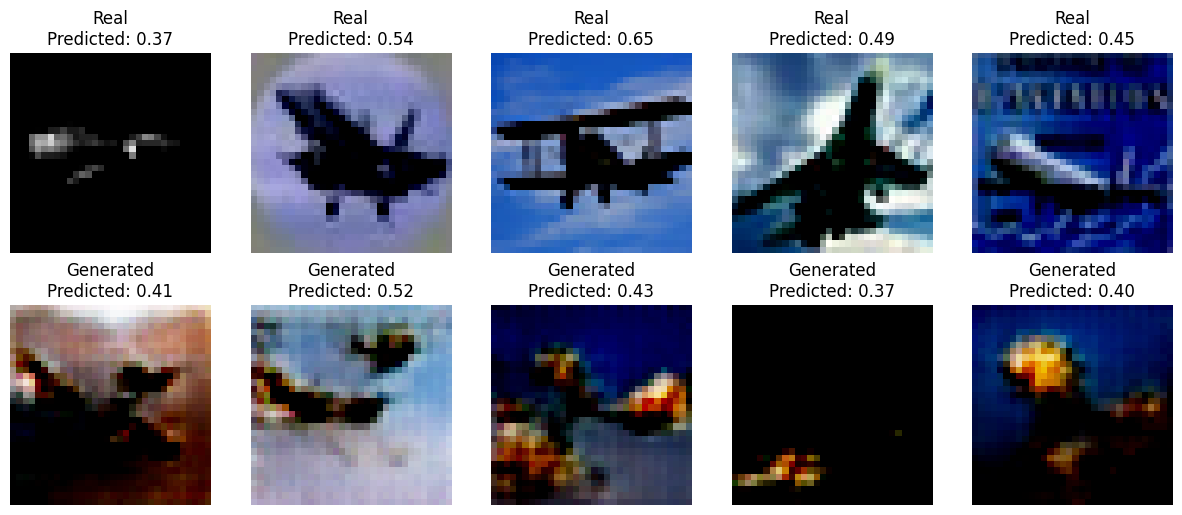

1400 [D loss: 0.669456, acc.: 52.34%] [G loss: 0.830021]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 18ms/step
[[0.4669591 ]
 [0.6327465 ]
 [0.55465144]
 [0.7379075 ]
 [0.5343427 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 22ms/step
[[0.333308  ]
 [0.32984722]
 [0.23604198]
 [0.39956728]
 [0.30539894]]
1/1 [==============================] - 0s 18ms/step


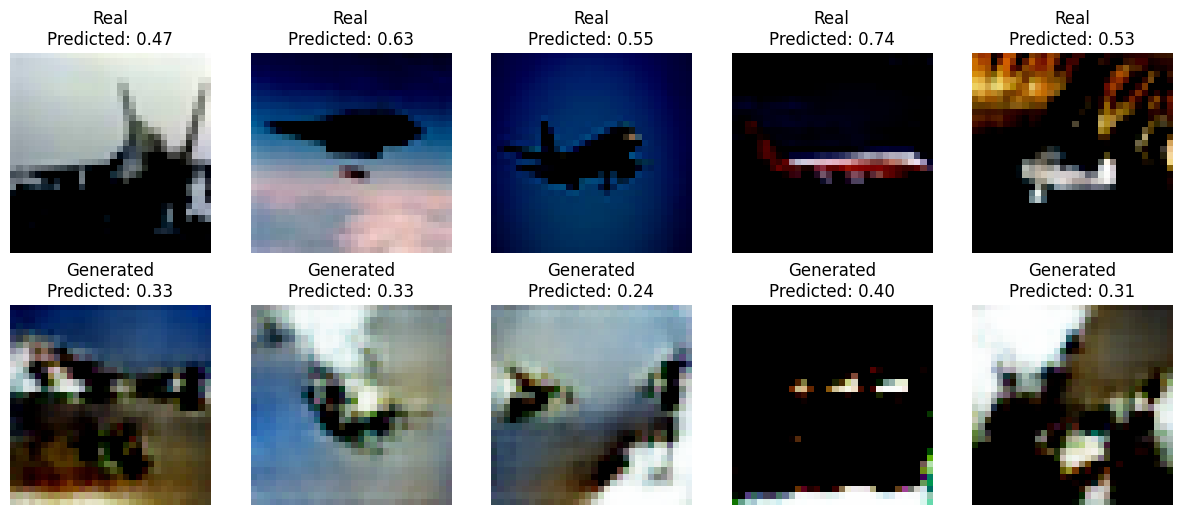

1600 [D loss: 0.598903, acc.: 67.97%] [G loss: 0.971399]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 24ms/step
[[0.5657741 ]
 [0.5984075 ]
 [0.58859116]
 [0.44954145]
 [0.73313725]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.4353372 ]
 [0.44028366]
 [0.35008818]
 [0.45642954]
 [0.55364007]]
1/1 [==============================] - 0s 24ms/step


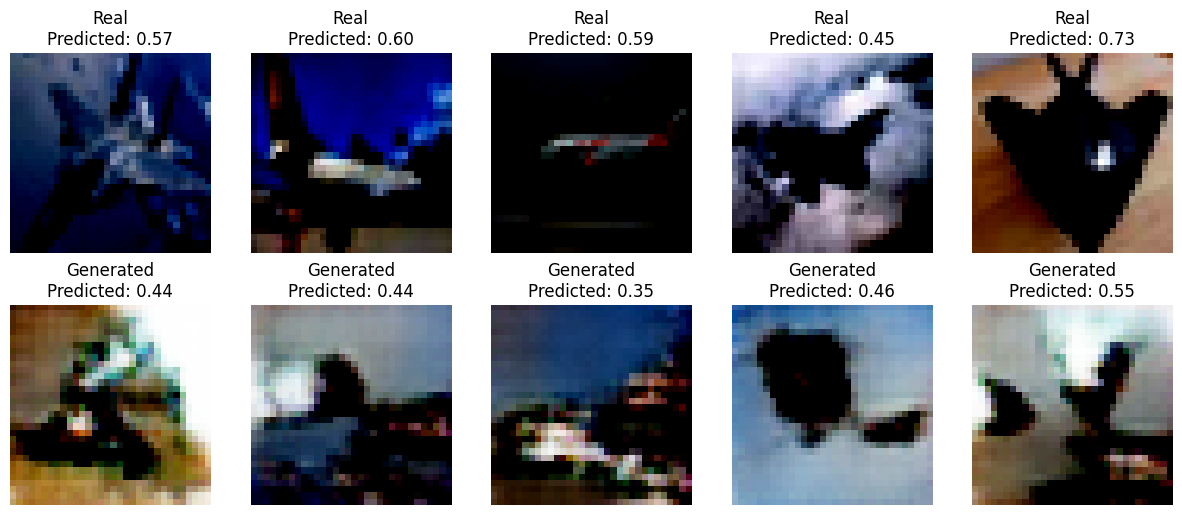

1800 [D loss: 0.664671, acc.: 61.72%] [G loss: 0.787682]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.7655644 ]
 [0.87803835]
 [0.60160536]
 [0.50997955]
 [0.6555105 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.4313676 ]
 [0.4580809 ]
 [0.2407893 ]
 [0.39688128]
 [0.50992817]]
1/1 [==============================] - 0s 20ms/step


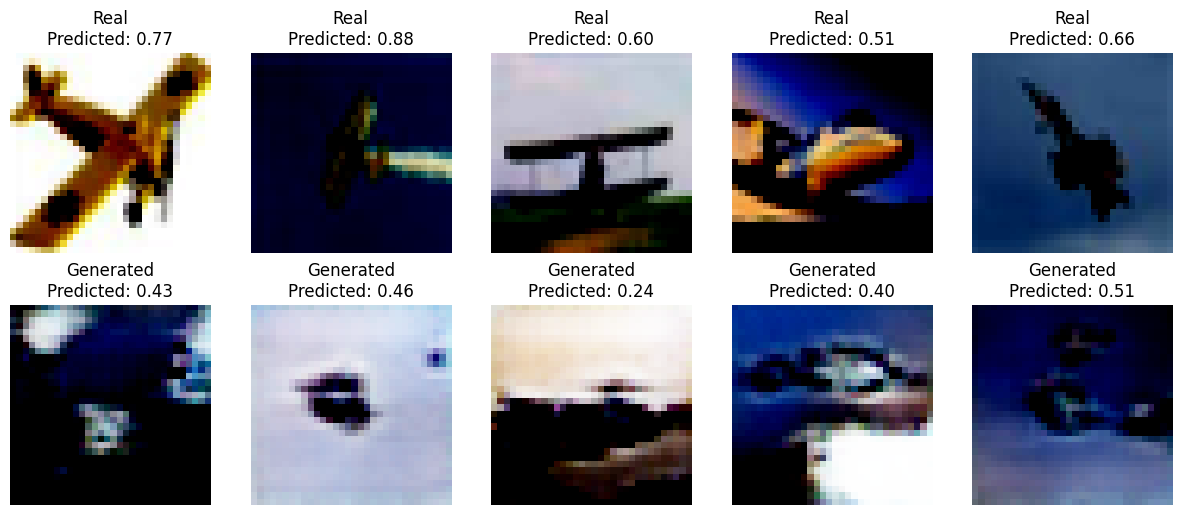

2000 [D loss: 0.637400, acc.: 60.16%] [G loss: 0.856373]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.47085765]
 [0.50020415]
 [0.38163516]
 [0.4309371 ]
 [0.49721077]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.3502727 ]
 [0.4505075 ]
 [0.47194993]
 [0.4161698 ]
 [0.38495478]]
1/1 [==============================] - 0s 19ms/step


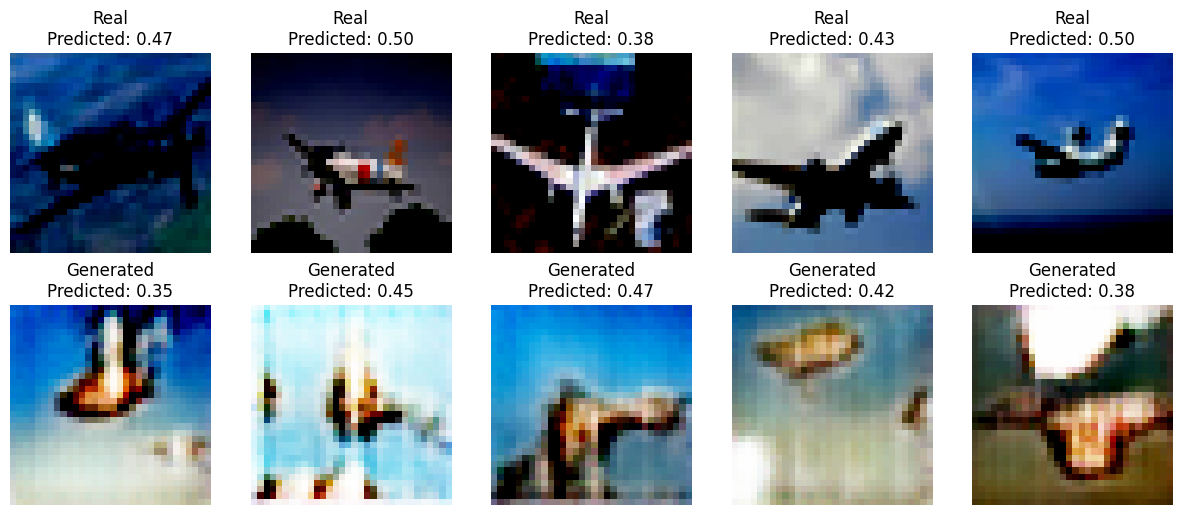

2200 [D loss: 0.693016, acc.: 53.12%] [G loss: 0.979287]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.44771594]
 [0.44761553]
 [0.5184219 ]
 [0.74349946]
 [0.40377456]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.47079983]
 [0.32209176]
 [0.3673652 ]
 [0.37777755]
 [0.47413495]]
1/1 [==============================] - 0s 19ms/step


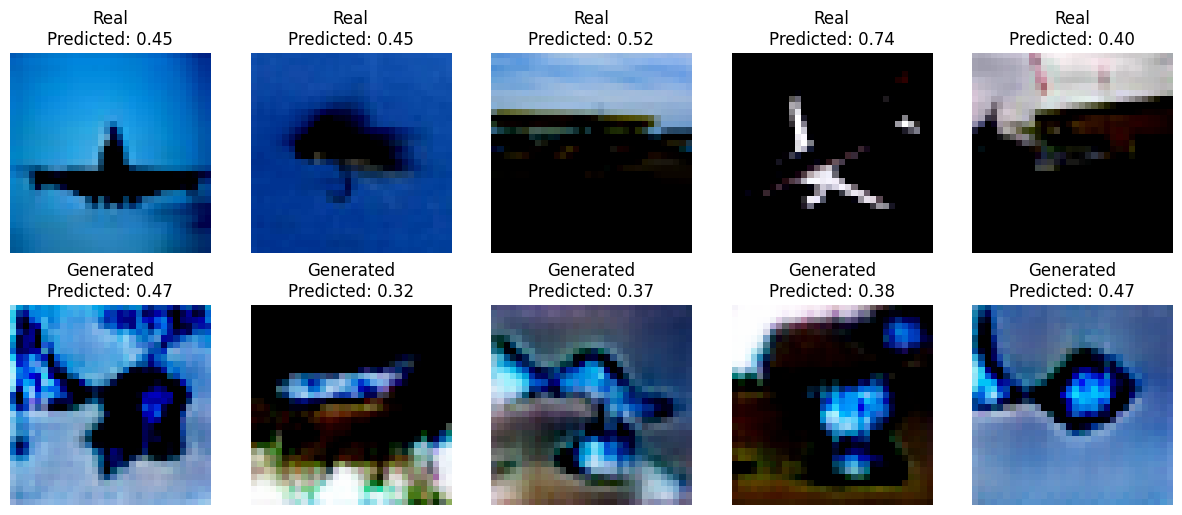

2400 [D loss: 0.636649, acc.: 62.50%] [G loss: 0.897163]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 22ms/step
[[0.65027285]
 [0.48264042]
 [0.8184764 ]
 [0.54192066]
 [0.64056486]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.47246635]
 [0.35712734]
 [0.4188186 ]
 [0.3760797 ]
 [0.33568653]]
1/1 [==============================] - 0s 19ms/step


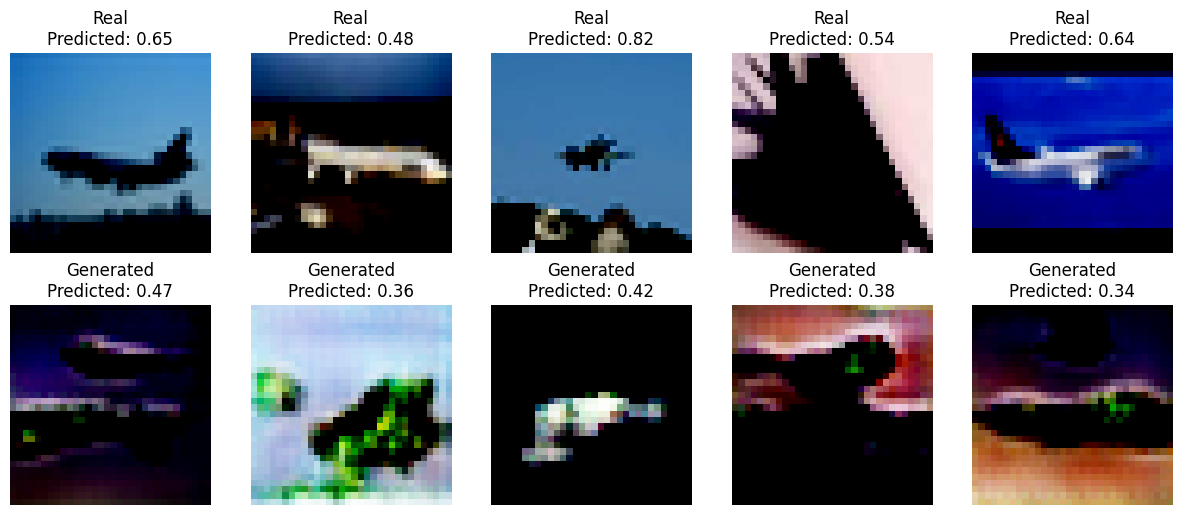

2600 [D loss: 0.646370, acc.: 59.38%] [G loss: 0.942380]
2/2 [==============================] - 0s 7ms/step


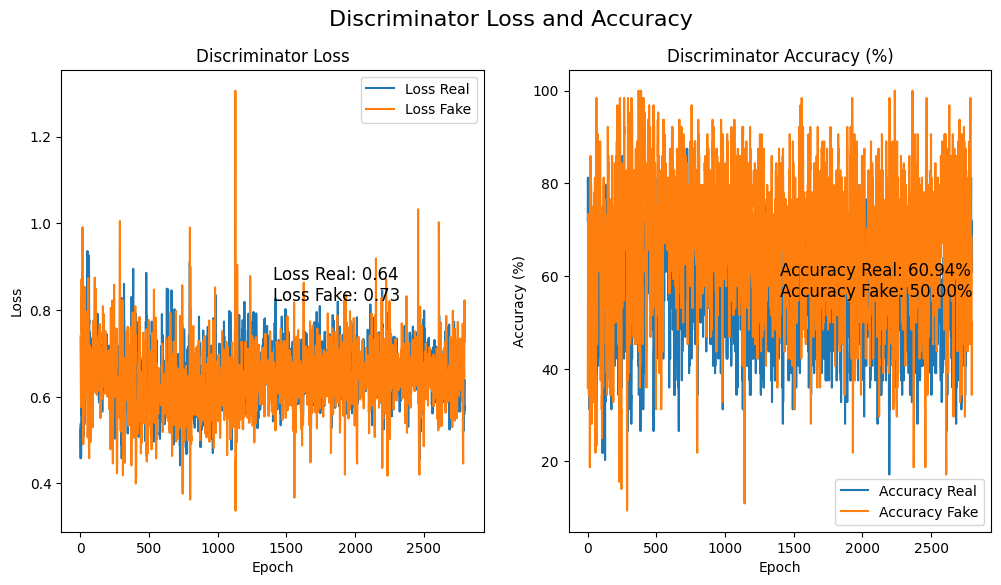

In [32]:
# Create a new GAN instance
gan = GAN()

# Specify the epoch from which you want to resume training
resume_epoch =800  # Change this to the epoch you want to start from

# Load the weights for the specified epoch
load_model_weights(gan, resume_epoch)

# Continue training for additional epochs
additional_epochs = 2000  # Adjust the number of additional epochs as needed

gan.train(noise_function=generate_random_noise, epochs=resume_epoch + additional_epochs, batch_size=64, save_interval=200)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 flatten_5 (Flatten)         (None, 16384)           

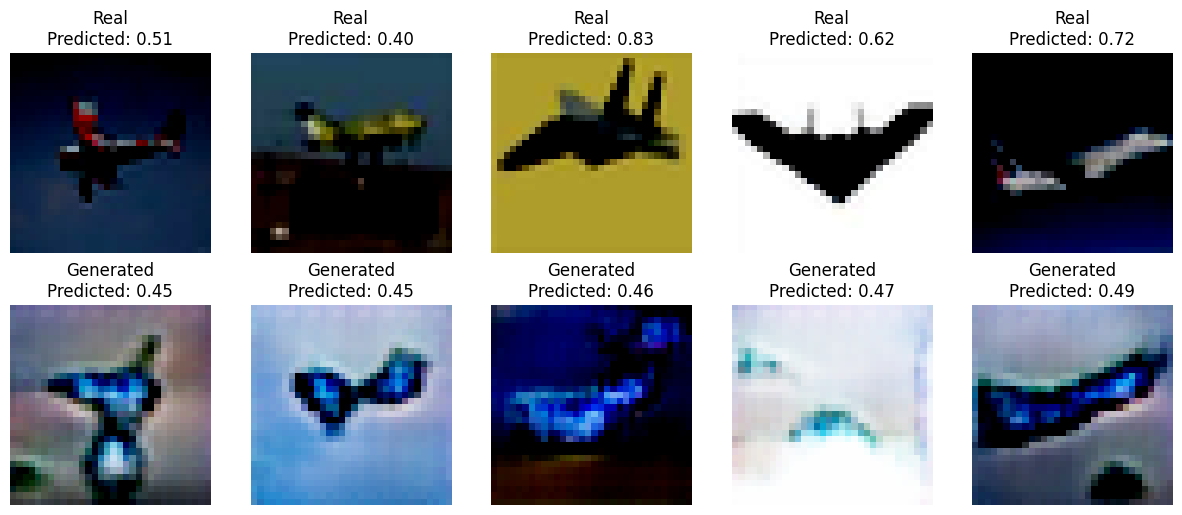

0 [D loss: 0.732397, acc.: 43.75%] [G loss: 0.779980]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.3691011 ]
 [0.44651026]
 [0.63625497]
 [0.49195325]
 [0.5058868 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.45245236]
 [0.25929272]
 [0.3912721 ]
 [0.51590014]
 [0.40790567]]
1/1 [==============================] - 0s 19ms/step


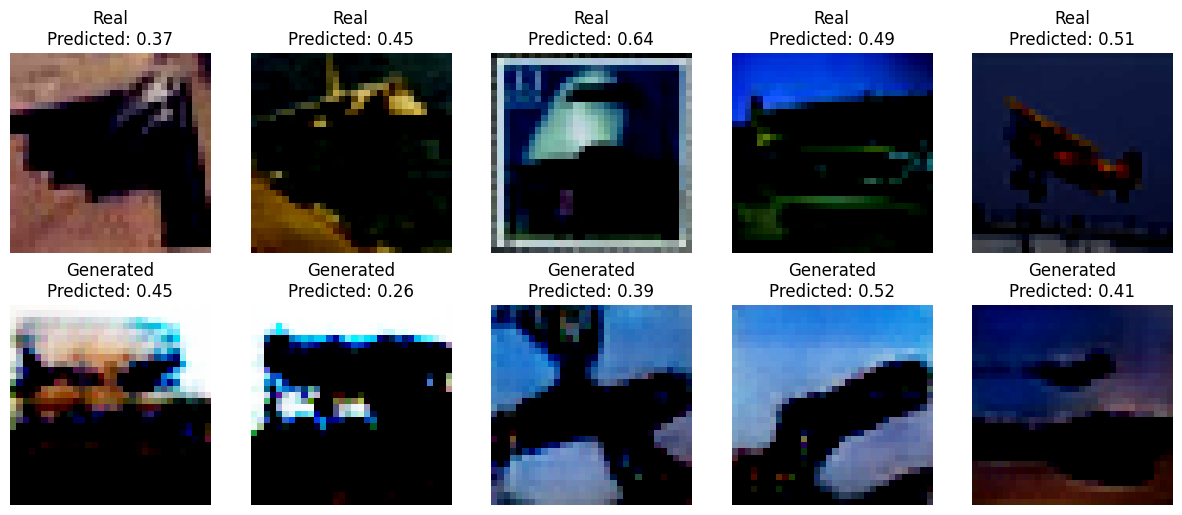

200 [D loss: 0.656292, acc.: 59.38%] [G loss: 0.898606]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.5981992 ]
 [0.502519  ]
 [0.49184898]
 [0.43764392]
 [0.4325379 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 22ms/step
[[0.3414856 ]
 [0.3897104 ]
 [0.4164102 ]
 [0.451641  ]
 [0.41425723]]
1/1 [==============================] - 0s 20ms/step


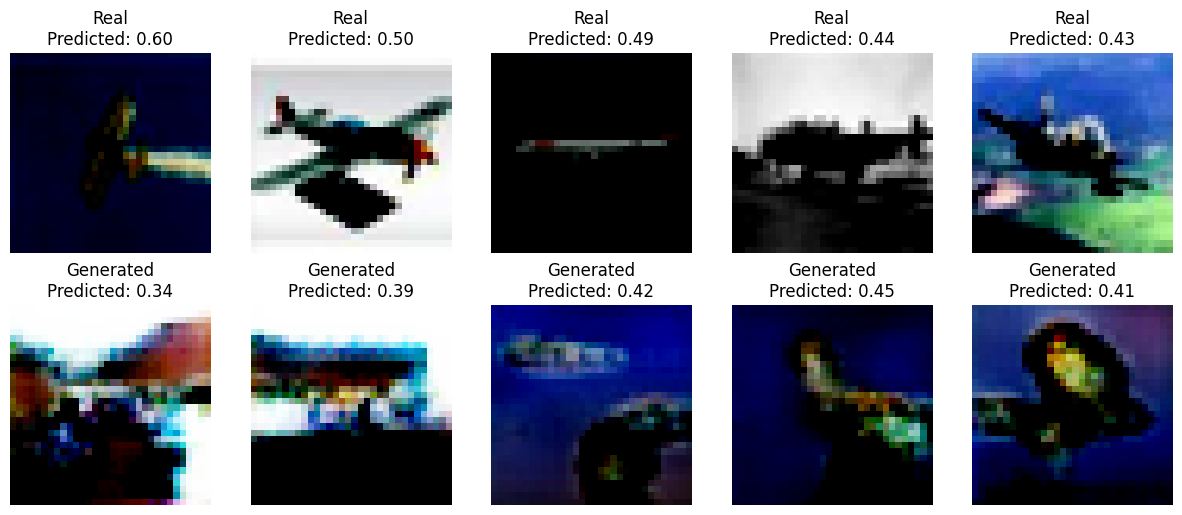

400 [D loss: 0.697739, acc.: 53.91%] [G loss: 0.857612]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.5058192 ]
 [0.5249033 ]
 [0.74896467]
 [0.6480507 ]
 [0.44302052]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.43984234]
 [0.43917254]
 [0.37053084]
 [0.42706296]
 [0.40604952]]
1/1 [==============================] - 0s 18ms/step


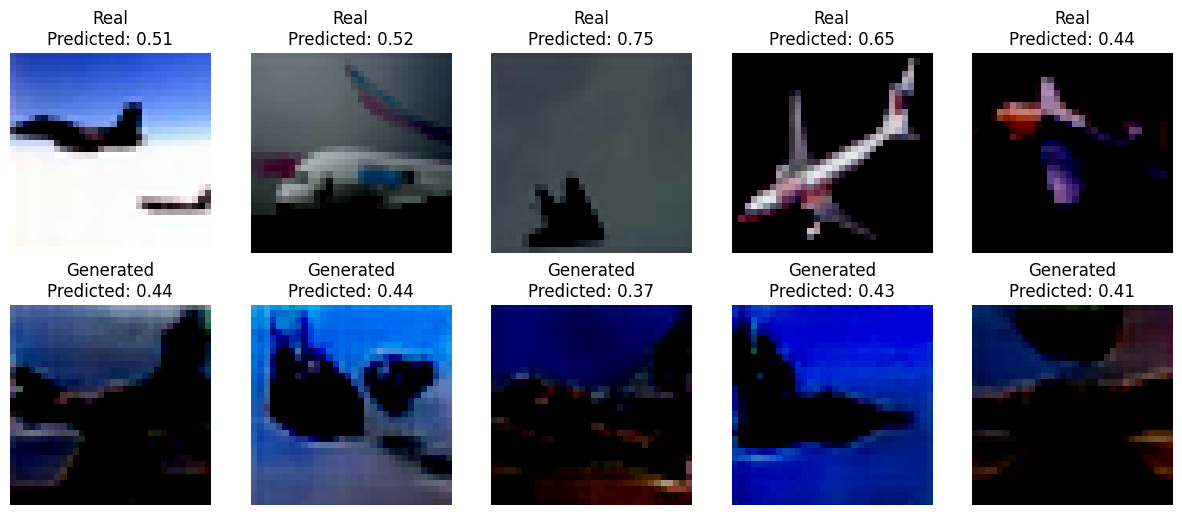

600 [D loss: 0.682305, acc.: 56.25%] [G loss: 0.860609]
2/2 [==============================] - 0s 6ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 30ms/step
[[0.40410146]
 [0.33791333]
 [0.5236096 ]
 [0.535697  ]
 [0.86220396]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 28ms/step
[[0.4482659 ]
 [0.39979434]
 [0.3686477 ]
 [0.46492508]
 [0.39508325]]
1/1 [==============================] - 0s 39ms/step


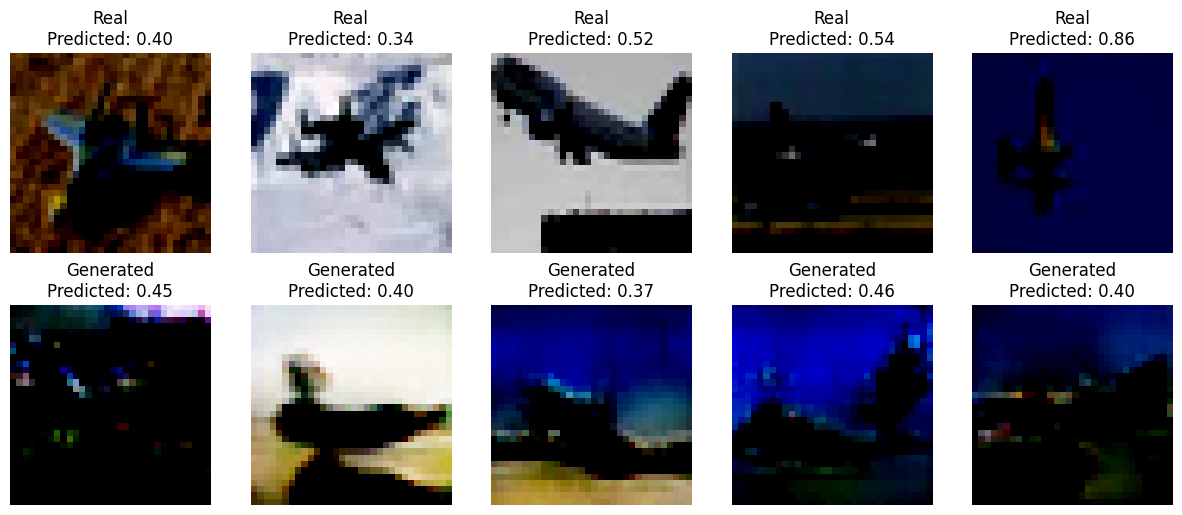

800 [D loss: 0.625157, acc.: 67.97%] [G loss: 0.838072]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.5478183 ]
 [0.41213387]
 [0.48831192]
 [0.65651155]
 [0.5619279 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.38549426]
 [0.39893666]
 [0.4329274 ]
 [0.42490867]
 [0.38614166]]
1/1 [==============================] - 0s 18ms/step


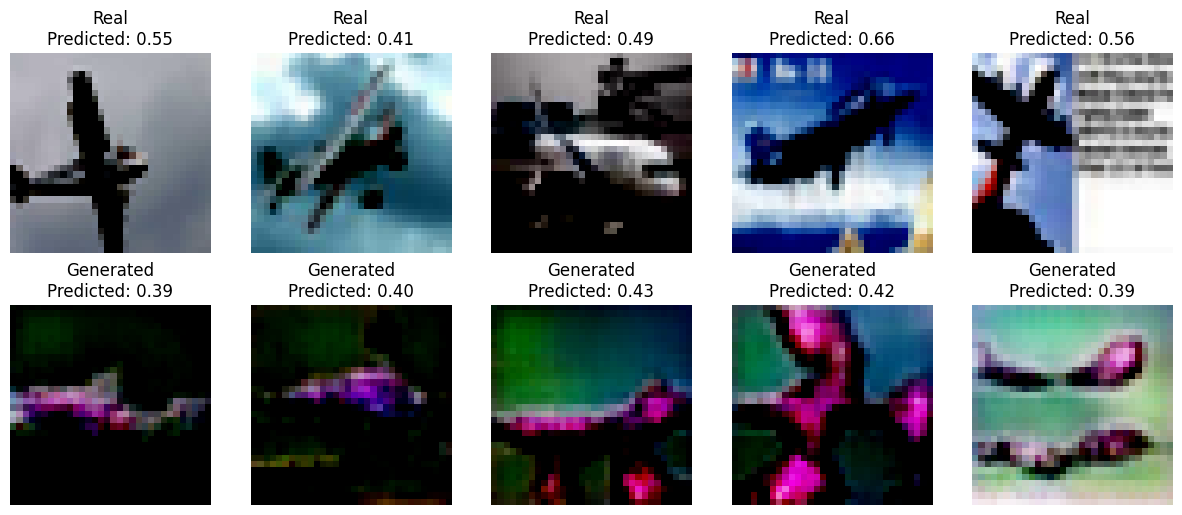

1000 [D loss: 0.653904, acc.: 65.62%] [G loss: 0.941047]
2/2 [==============================] - 0s 6ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 24ms/step
[[0.43147466]
 [0.579258  ]
 [0.36546606]
 [0.55939704]
 [0.3378166 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 25ms/step
[[0.47789535]
 [0.40568757]
 [0.43236315]
 [0.3122281 ]
 [0.36272532]]
1/1 [==============================] - 0s 25ms/step


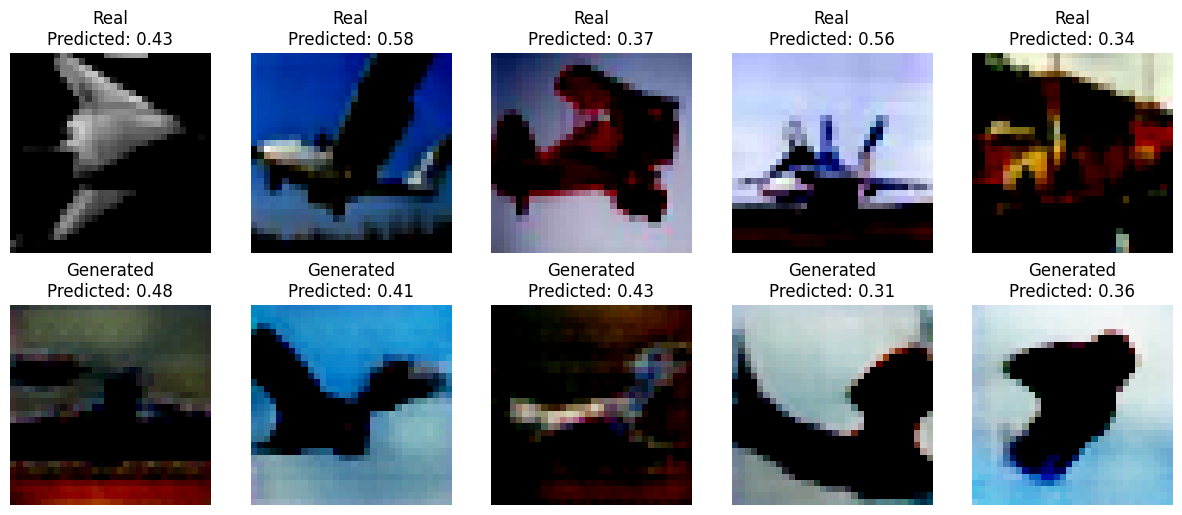

1200 [D loss: 0.614880, acc.: 68.75%] [G loss: 0.996572]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.60890543]
 [0.42600992]
 [0.494453  ]
 [0.57307035]
 [0.4574855 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.33936659]
 [0.5526327 ]
 [0.4261457 ]
 [0.443563  ]
 [0.3709006 ]]
1/1 [==============================] - 0s 19ms/step


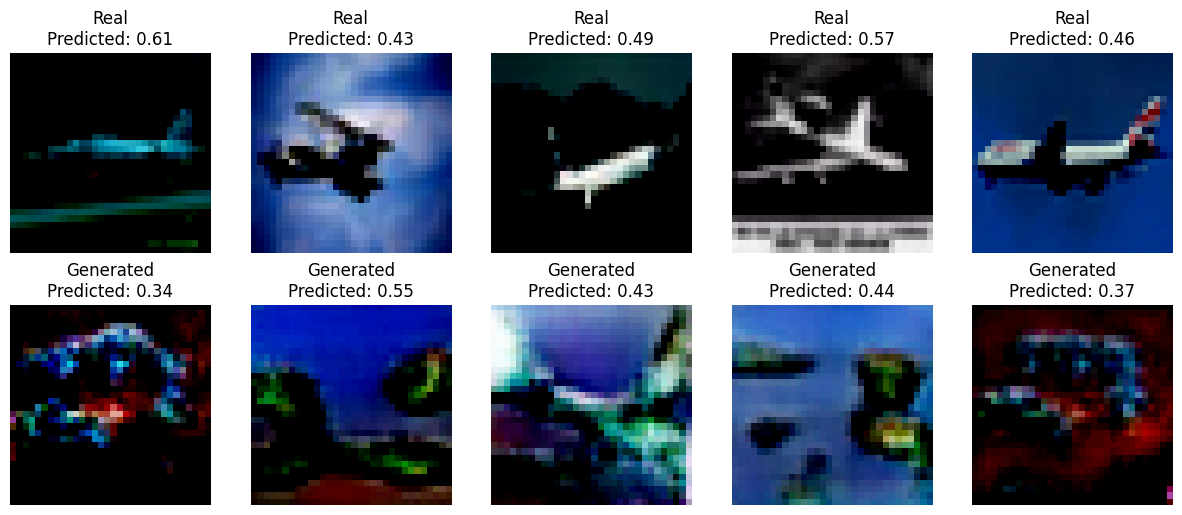

1400 [D loss: 0.645062, acc.: 67.19%] [G loss: 0.872933]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.4912255 ]
 [0.7441032 ]
 [0.5790522 ]
 [0.5271141 ]
 [0.44834968]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.3729515 ]
 [0.35474125]
 [0.31294492]
 [0.2898045 ]
 [0.33662   ]]
1/1 [==============================] - 0s 25ms/step


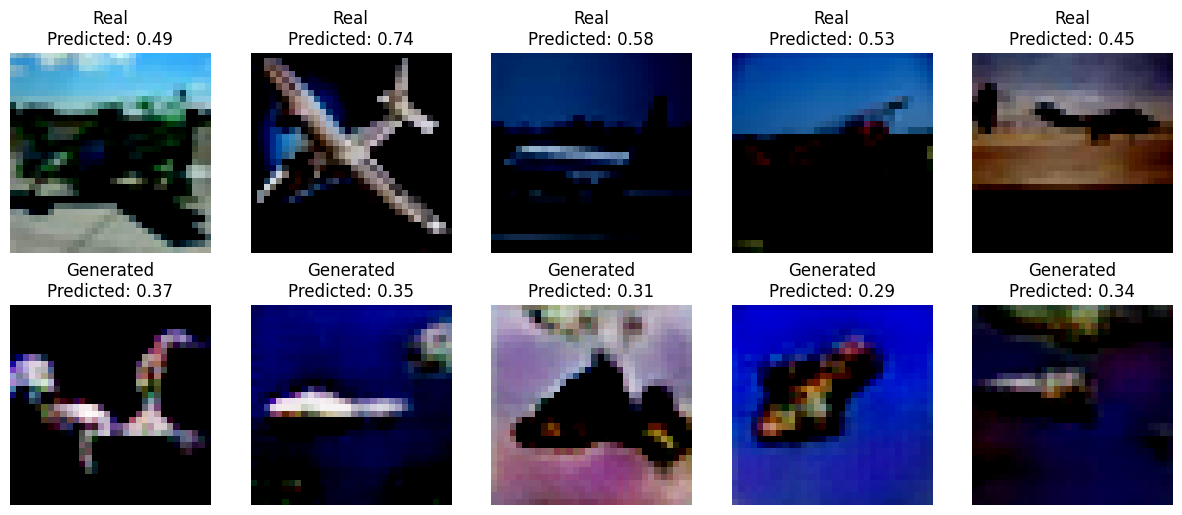

1600 [D loss: 0.587316, acc.: 71.88%] [G loss: 0.980049]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.5168861 ]
 [0.52511233]
 [0.5995565 ]
 [0.45805717]
 [0.52398175]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.4963219 ]
 [0.32649255]
 [0.3374047 ]
 [0.48341575]
 [0.3866459 ]]
1/1 [==============================] - 0s 19ms/step


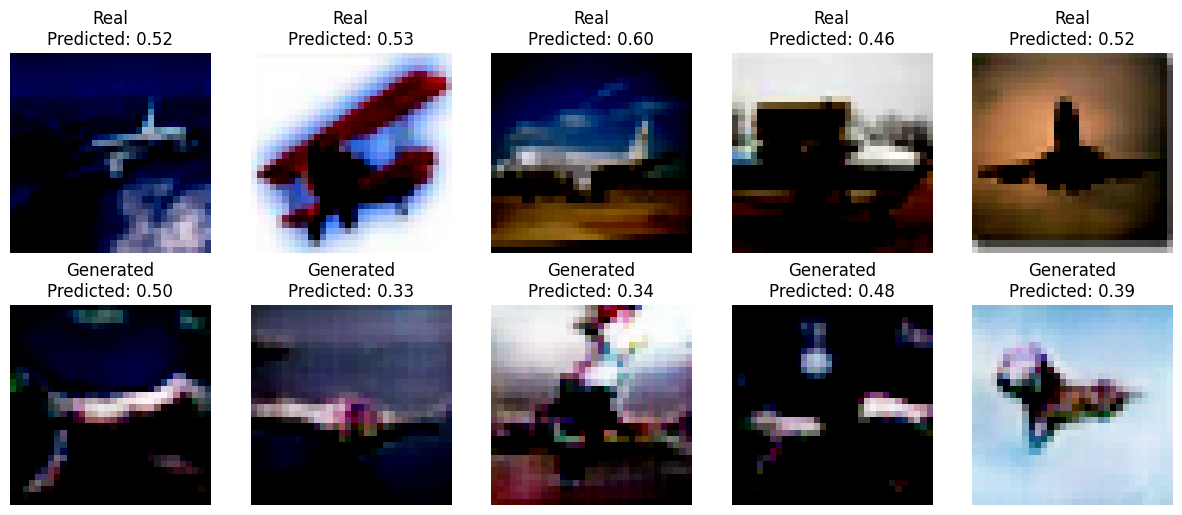

1800 [D loss: 0.640836, acc.: 66.41%] [G loss: 0.880850]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.7158096 ]
 [0.5124005 ]
 [0.57724273]
 [0.7975328 ]
 [0.4425276 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.4202513 ]
 [0.38008332]
 [0.46606204]
 [0.42738283]
 [0.38632917]]
1/1 [==============================] - 0s 21ms/step


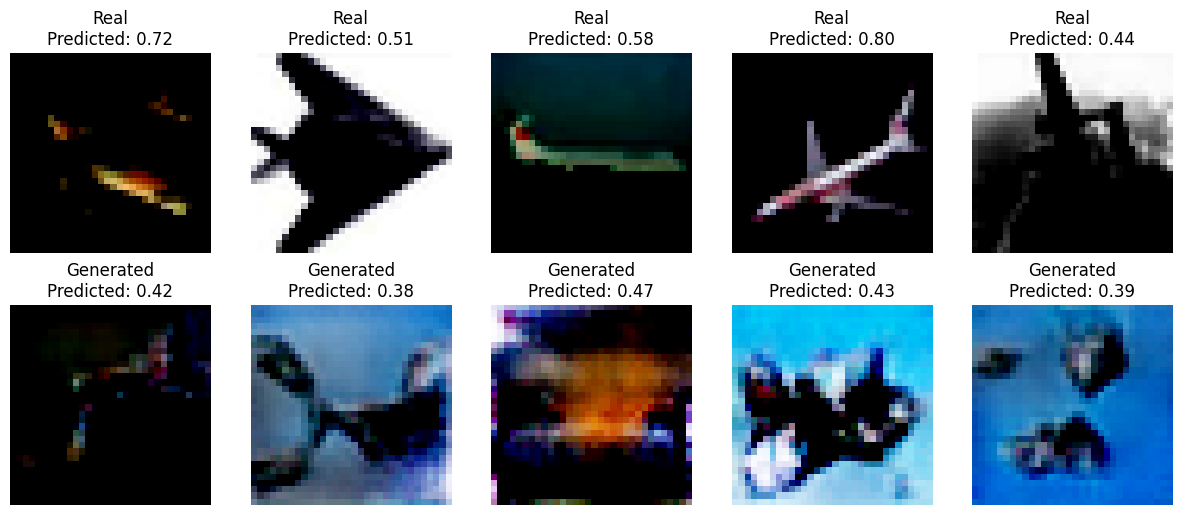

2000 [D loss: 0.627305, acc.: 67.97%] [G loss: 0.906896]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.5561384 ]
 [0.45352545]
 [0.812826  ]
 [0.5251731 ]
 [0.42413318]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.43304786]
 [0.4620685 ]
 [0.35817087]
 [0.5633425 ]
 [0.4156826 ]]
1/1 [==============================] - 0s 20ms/step


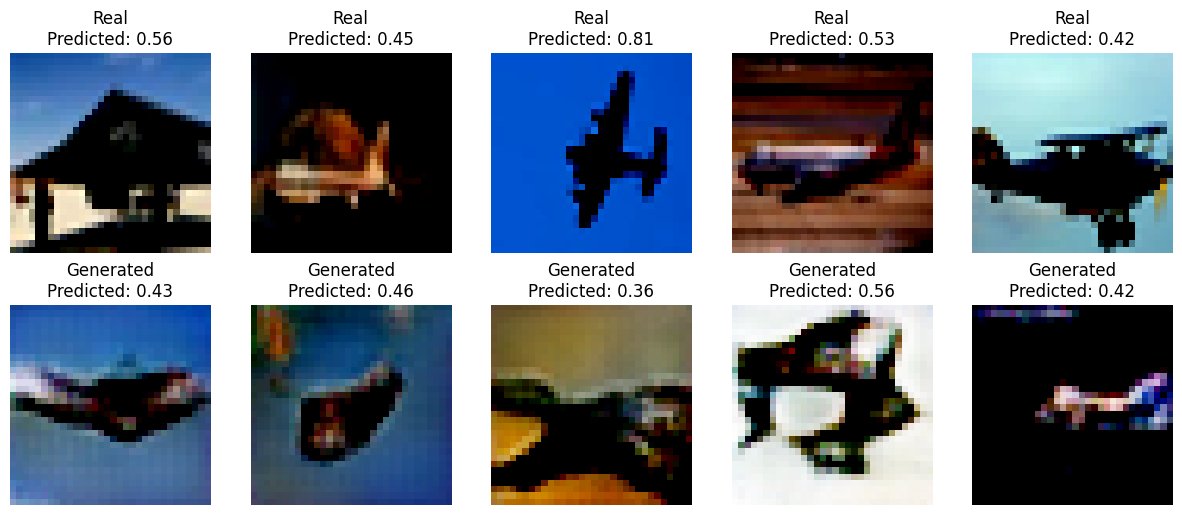

2200 [D loss: 0.674169, acc.: 60.94%] [G loss: 0.844300]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 18ms/step
[[0.4415988 ]
 [0.7471563 ]
 [0.53772813]
 [0.47901267]
 [0.567696  ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.40332857]
 [0.45748824]
 [0.43427864]
 [0.5732984 ]
 [0.48747653]]
1/1 [==============================] - 0s 18ms/step


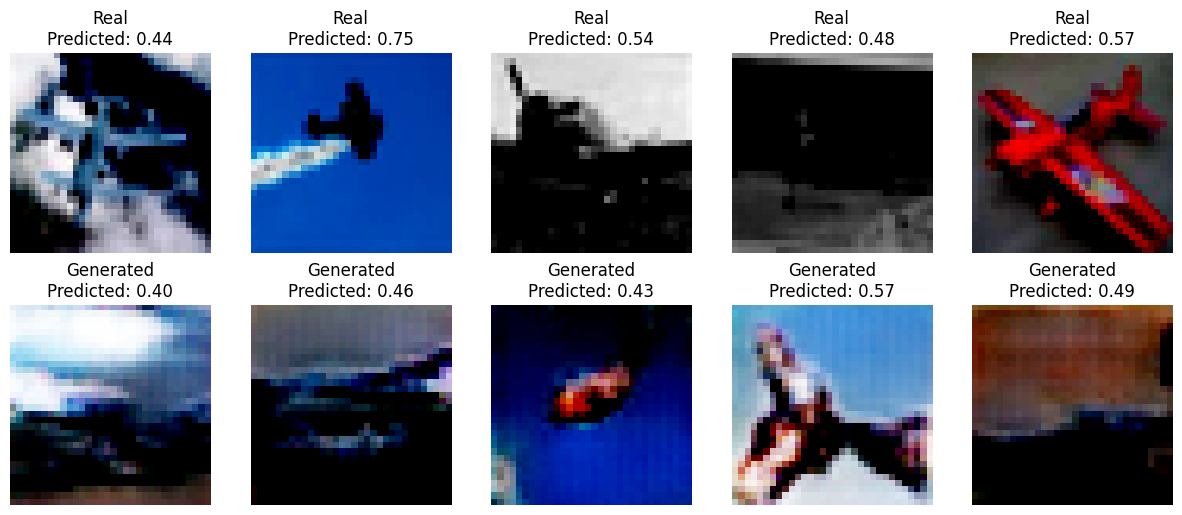

2400 [D loss: 0.646723, acc.: 66.41%] [G loss: 0.853308]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 30ms/step
[[0.51255786]
 [0.48812366]
 [0.5389452 ]
 [0.5672614 ]
 [0.55771893]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 29ms/step
[[0.51767164]
 [0.42009366]
 [0.42318892]
 [0.39803392]
 [0.5098632 ]]
1/1 [==============================] - 0s 44ms/step


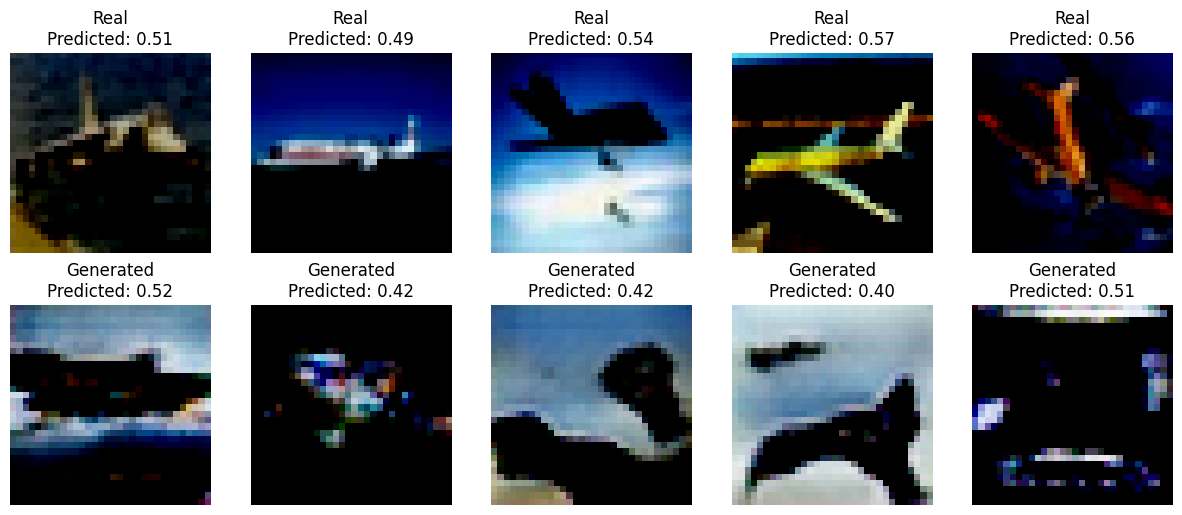

2600 [D loss: 0.655023, acc.: 67.19%] [G loss: 0.855013]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.49327824]
 [0.45344725]
 [0.5403619 ]
 [0.42522025]
 [0.4155635 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.41239315]
 [0.3942499 ]
 [0.34005857]
 [0.43007043]
 [0.41407362]]
1/1 [==============================] - 0s 20ms/step


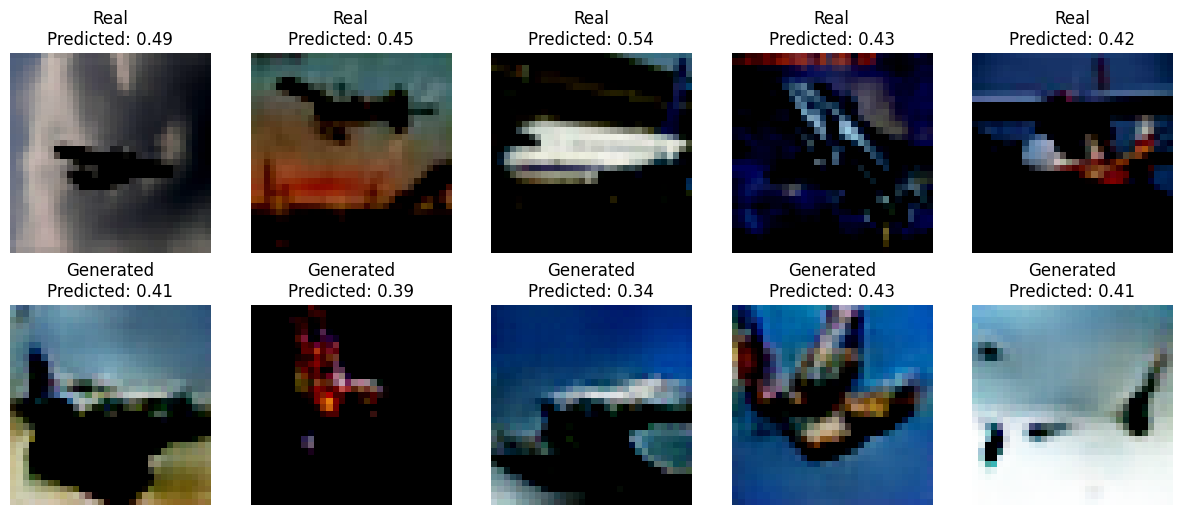

2800 [D loss: 0.654441, acc.: 62.50%] [G loss: 0.878837]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.5927675 ]
 [0.534171  ]
 [0.2693223 ]
 [0.51869845]
 [0.5757178 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.5005127 ]
 [0.3848419 ]
 [0.45275995]
 [0.42225054]
 [0.07702635]]
1/1 [==============================] - 0s 24ms/step


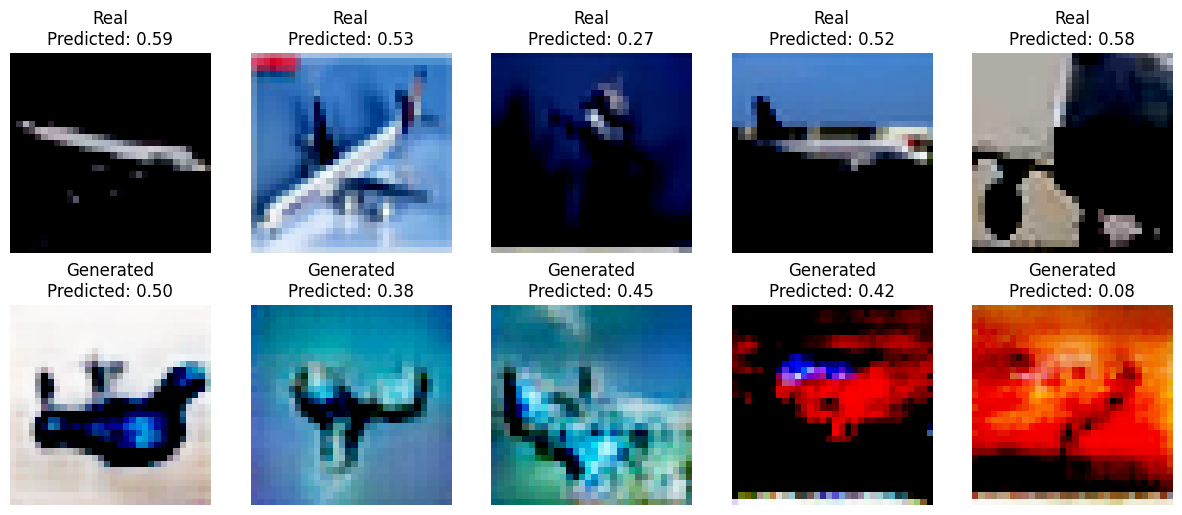

3000 [D loss: 0.700516, acc.: 57.81%] [G loss: 0.884110]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.488428  ]
 [0.43489274]
 [0.66317743]
 [0.68236023]
 [0.3947812 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.36404547]
 [0.29431954]
 [0.3549147 ]
 [0.43124965]
 [0.48292843]]
1/1 [==============================] - 0s 19ms/step


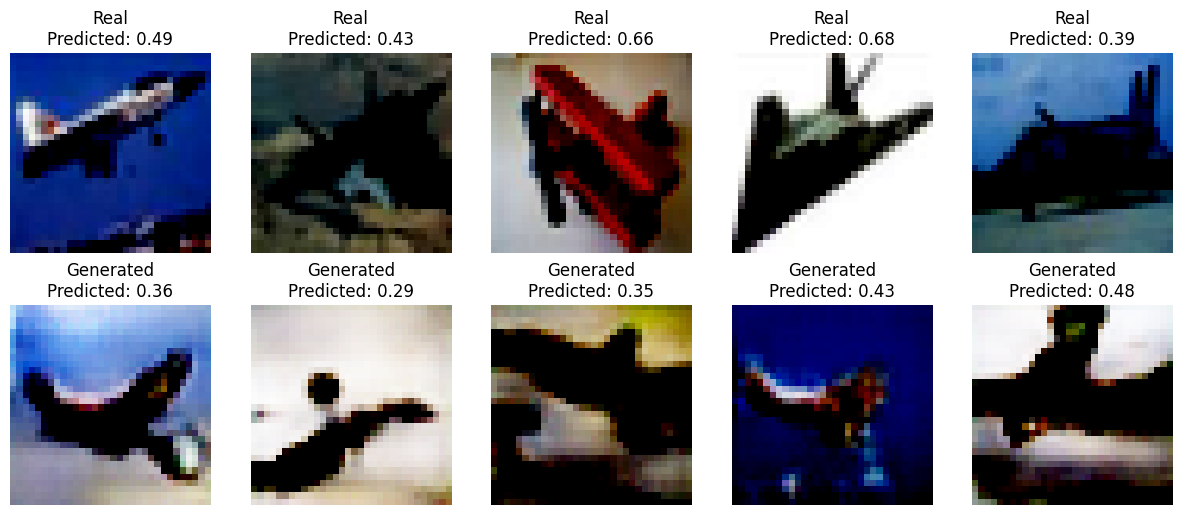

3200 [D loss: 0.650670, acc.: 62.50%] [G loss: 0.931112]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.4004167 ]
 [0.4414059 ]
 [0.40210047]
 [0.66105914]
 [0.71739864]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.27970448]
 [0.28710014]
 [0.44126755]
 [0.4000587 ]
 [0.3583914 ]]
1/1 [==============================] - 0s 24ms/step


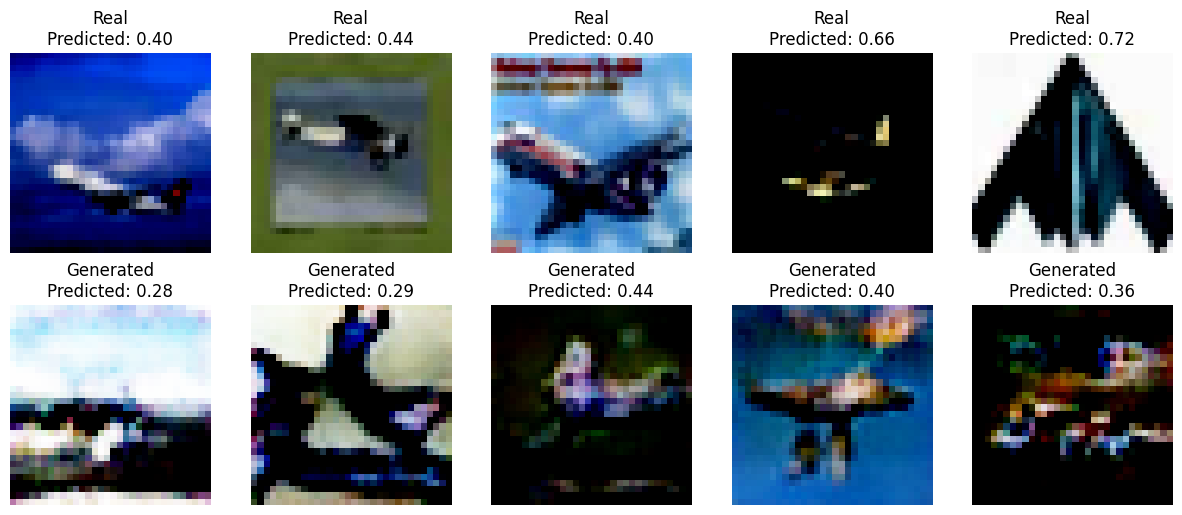

3400 [D loss: 0.646247, acc.: 60.94%] [G loss: 0.900383]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.50304776]
 [0.4949392 ]
 [0.7264996 ]
 [0.6700541 ]
 [0.6601143 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.39866406]
 [0.43582904]
 [0.4098166 ]
 [0.36122572]
 [0.3997864 ]]
1/1 [==============================] - 0s 20ms/step


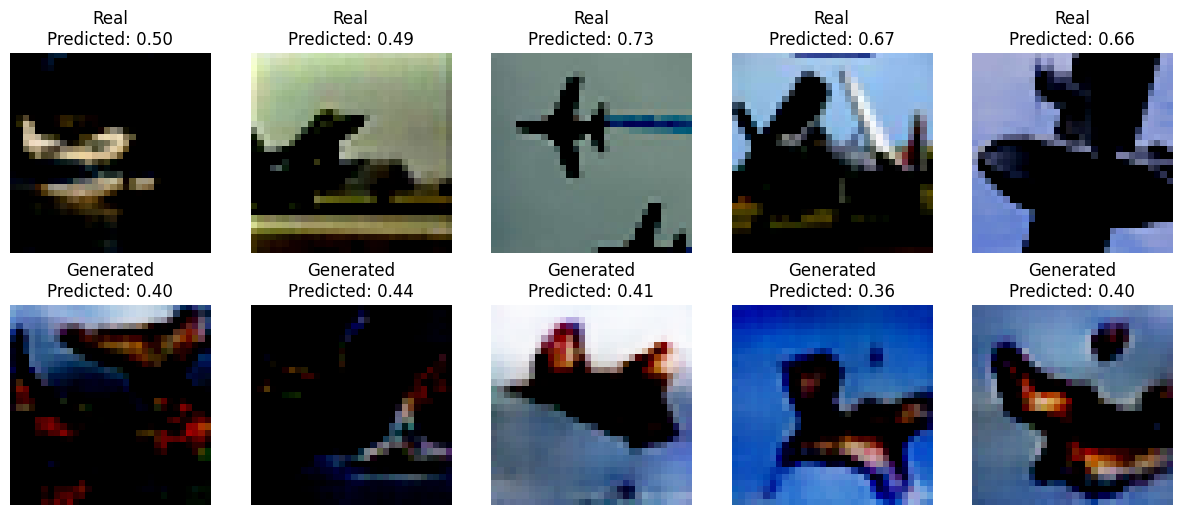

3600 [D loss: 0.665304, acc.: 61.72%] [G loss: 0.852888]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 22ms/step
[[0.54413694]
 [0.8131386 ]
 [0.44491467]
 [0.40621763]
 [0.57573205]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.3756843 ]
 [0.40311116]
 [0.4431739 ]
 [0.60666984]
 [0.37089637]]
1/1 [==============================] - 0s 20ms/step


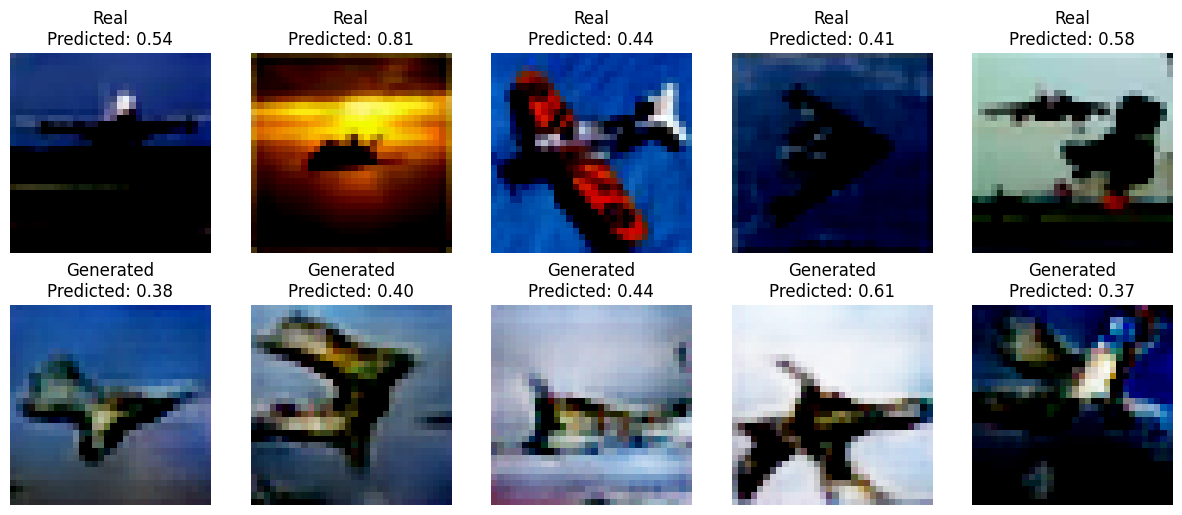

3800 [D loss: 0.654989, acc.: 60.94%] [G loss: 0.835471]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 26ms/step
[[0.60402566]
 [0.699464  ]
 [0.54289496]
 [0.71876967]
 [0.36832052]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 26ms/step
[[0.4707681 ]
 [0.48637867]
 [0.72822785]
 [0.5703495 ]
 [0.34334612]]
1/1 [==============================] - 0s 19ms/step


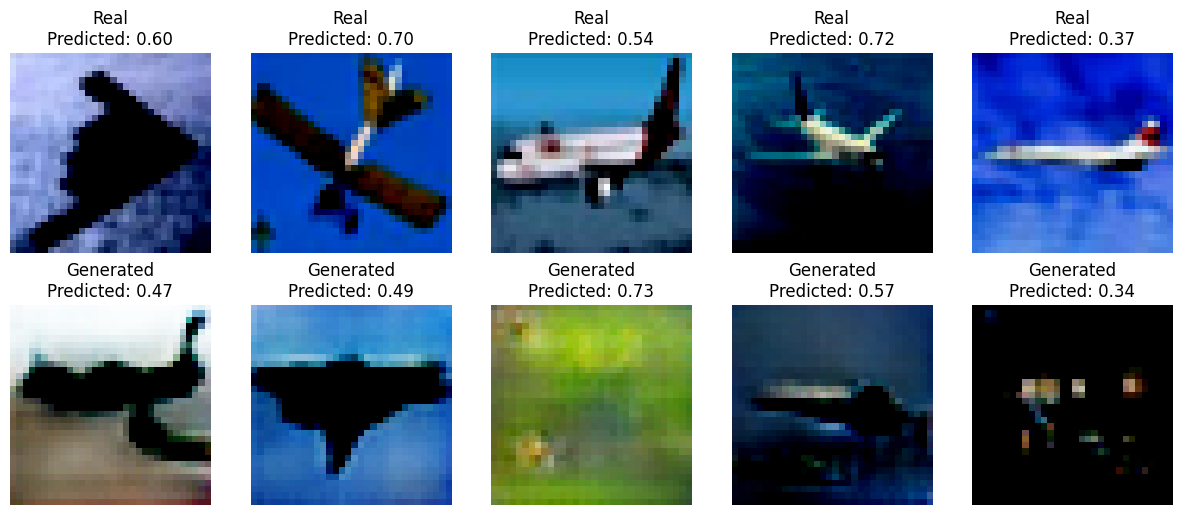

4000 [D loss: 0.658309, acc.: 63.28%] [G loss: 0.904289]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.56679976]
 [0.6375919 ]
 [0.43642828]
 [0.5462237 ]
 [0.48480186]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.26221448]
 [0.34858063]
 [0.45542932]
 [0.35940698]
 [0.4355532 ]]
1/1 [==============================] - 0s 21ms/step


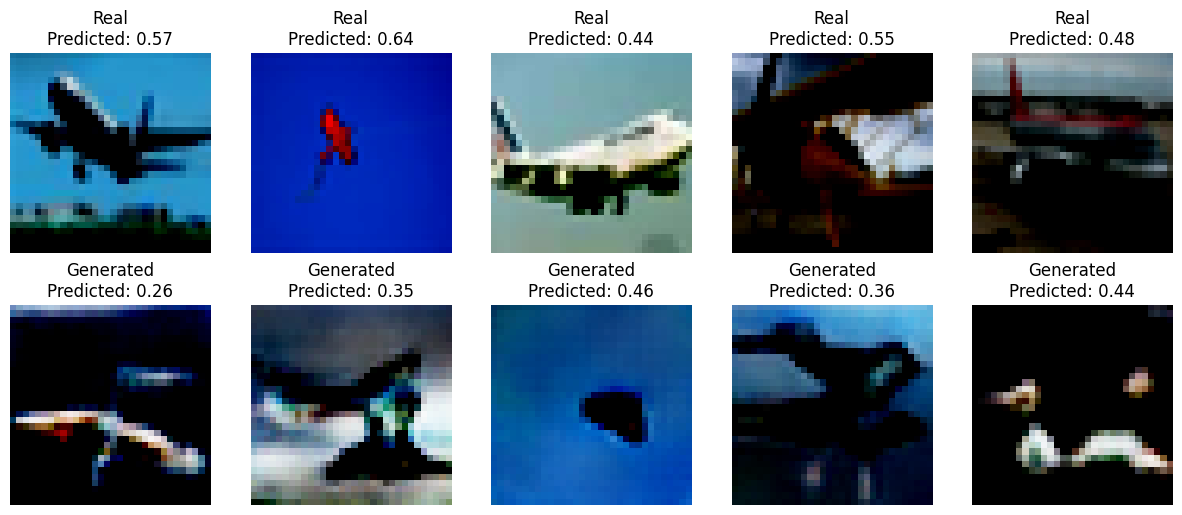

4200 [D loss: 0.626972, acc.: 67.97%] [G loss: 0.921794]
2/2 [==============================] - 0s 5ms/step


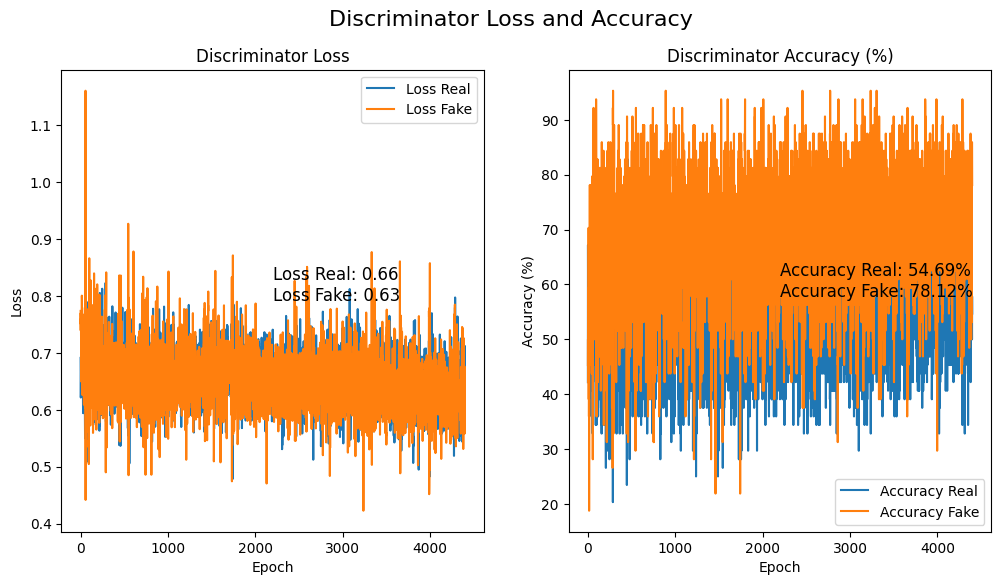

In [37]:
# Create a new GAN instance
gan = GAN()

# Specify the epoch from which you want to resume training
resume_epoch =2400  # Change this to the epoch you want to start from

# Load the weights for the specified epoch
load_model_weights(gan, resume_epoch)

# Continue training for additional epochs
additional_epochs = 2000  # Adjust the number of additional epochs as needed

gan.train(noise_function=generate_random_noise, epochs=resume_epoch + additional_epochs, batch_size=64, save_interval=200)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_39 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 flatten_6 (Flatten)         (None, 16384)           

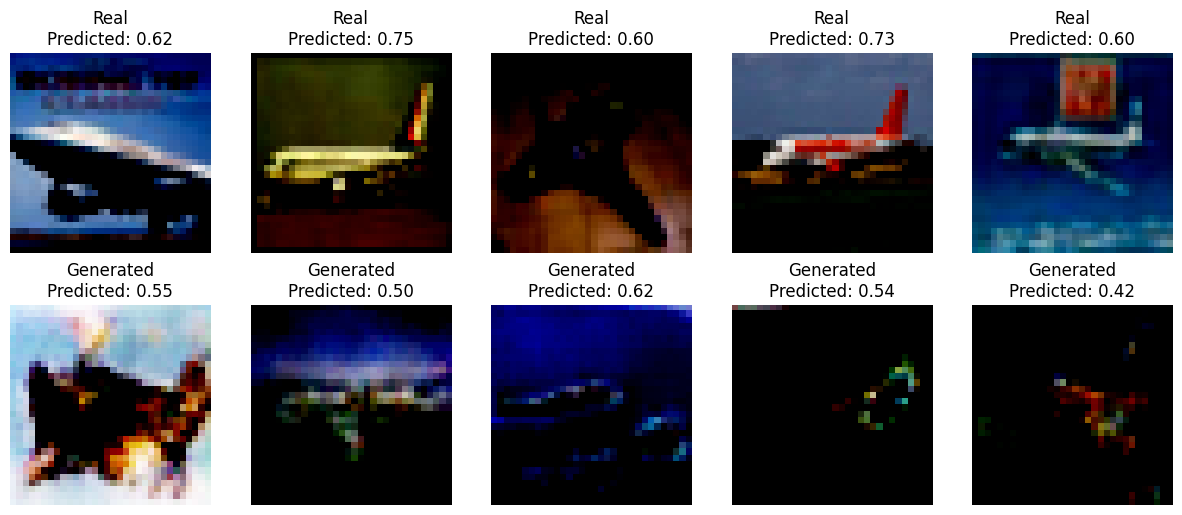

0 [D loss: 0.730283, acc.: 46.09%] [G loss: 0.694297]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.42749238]
 [0.43805304]
 [0.63404435]
 [0.92283916]
 [0.6133621 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.3404475 ]
 [0.4729895 ]
 [0.30406025]
 [0.29600736]
 [0.3587311 ]]
1/1 [==============================] - 0s 19ms/step


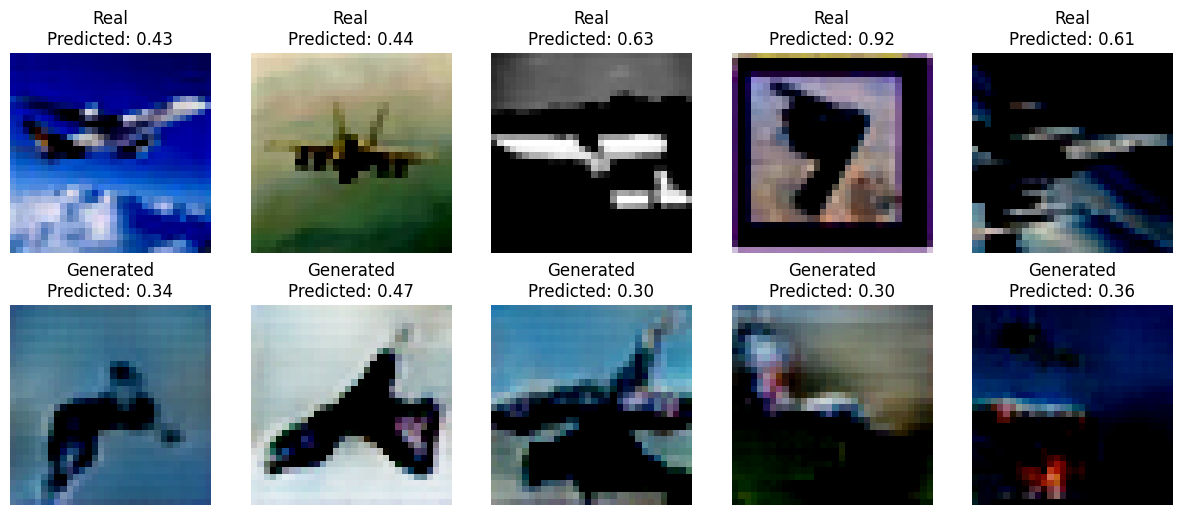

200 [D loss: 0.643453, acc.: 61.72%] [G loss: 0.865004]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.4968223 ]
 [0.49275818]
 [0.4426823 ]
 [0.5164997 ]
 [0.5515721 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.42195264]
 [0.5110397 ]
 [0.40190378]
 [0.43029773]
 [0.606899  ]]
1/1 [==============================] - 0s 20ms/step


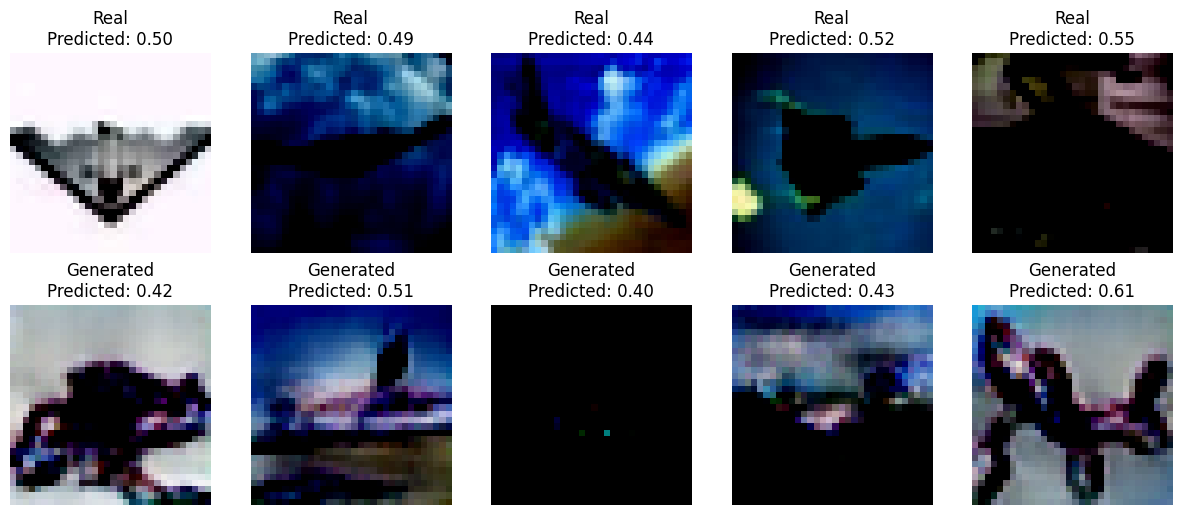

400 [D loss: 0.689106, acc.: 54.69%] [G loss: 0.829453]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.732279  ]
 [0.58244836]
 [0.42110062]
 [0.974986  ]
 [0.4438399 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.53499764]
 [0.37402025]
 [0.4582219 ]
 [0.47141716]
 [0.27376038]]
1/1 [==============================] - 0s 19ms/step


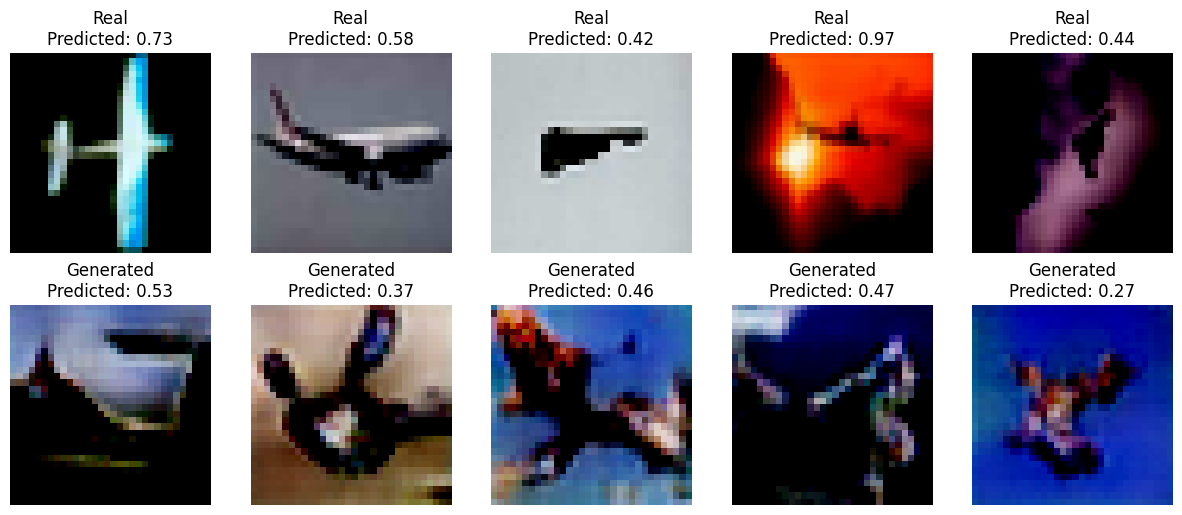

600 [D loss: 0.655696, acc.: 55.47%] [G loss: 0.889701]
2/2 [==============================] - 0s 9ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 26ms/step
[[0.38967475]
 [0.4894079 ]
 [0.53265184]
 [0.41619828]
 [0.51119846]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 26ms/step
[[0.5340234 ]
 [0.4491102 ]
 [0.5522715 ]
 [0.447946  ]
 [0.30652356]]
1/1 [==============================] - 0s 23ms/step


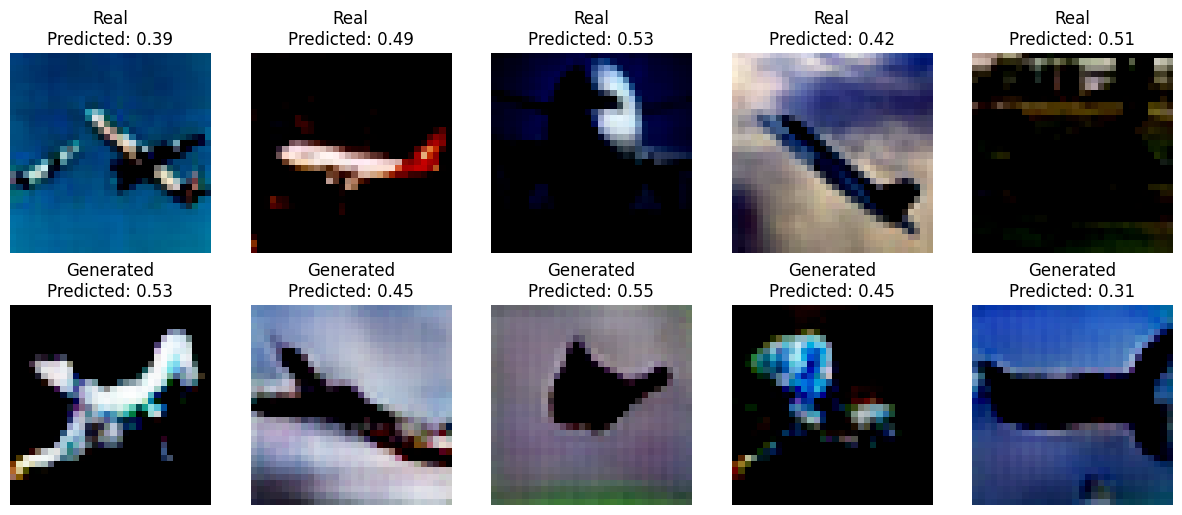

800 [D loss: 0.651086, acc.: 64.06%] [G loss: 0.953939]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.51451933]
 [0.5159051 ]
 [0.82678574]
 [0.6425251 ]
 [0.50012857]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.34216923]
 [0.41035238]
 [0.3497396 ]
 [0.3422246 ]
 [0.34939793]]
1/1 [==============================] - 0s 18ms/step


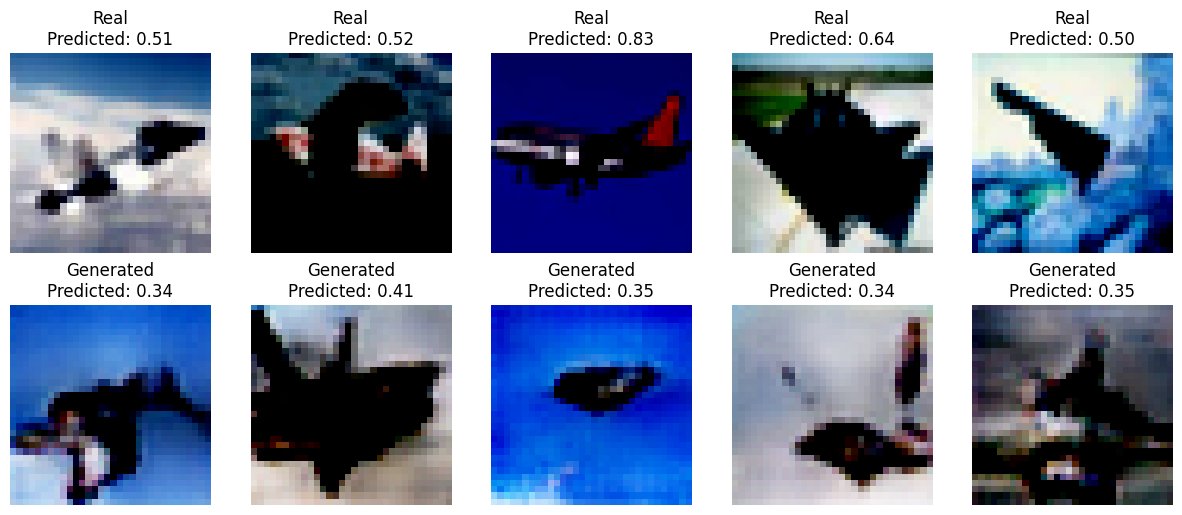

1000 [D loss: 0.632613, acc.: 64.84%] [G loss: 0.917329]
2/2 [==============================] - 0s 6ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 25ms/step
[[0.6297338 ]
 [0.57346076]
 [0.55793023]
 [0.6375301 ]
 [0.54368615]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 25ms/step
[[0.4575466 ]
 [0.5015073 ]
 [0.38377297]
 [0.40730336]
 [0.48192298]]
1/1 [==============================] - 0s 26ms/step


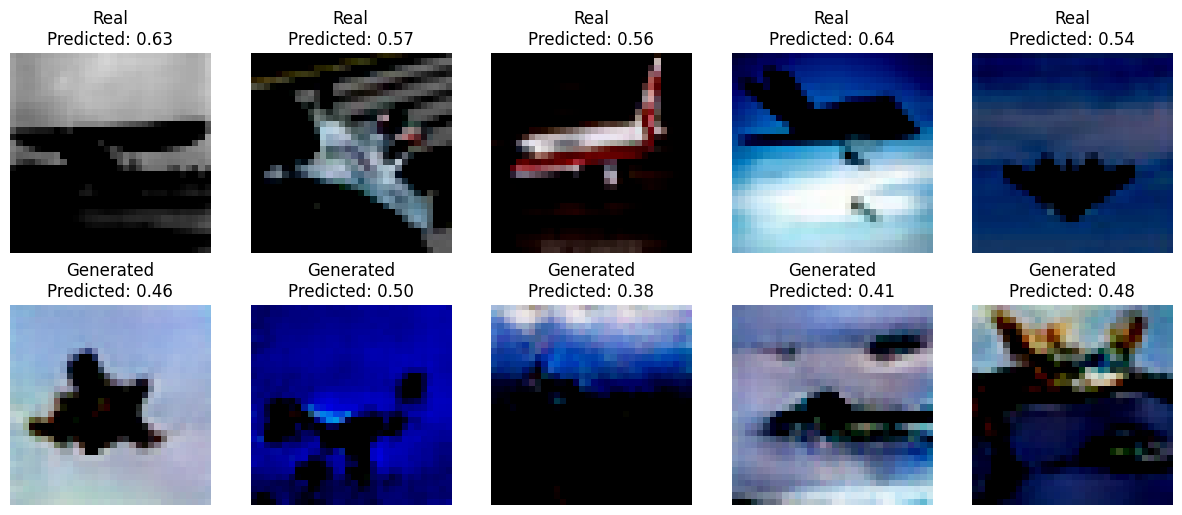

1200 [D loss: 0.590141, acc.: 71.09%] [G loss: 0.936449]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.47136122]
 [0.54417384]
 [0.73228276]
 [0.46792984]
 [0.4675183 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.36289096]
 [0.35668203]
 [0.5206609 ]
 [0.38811257]
 [0.5507624 ]]
1/1 [==============================] - 0s 19ms/step


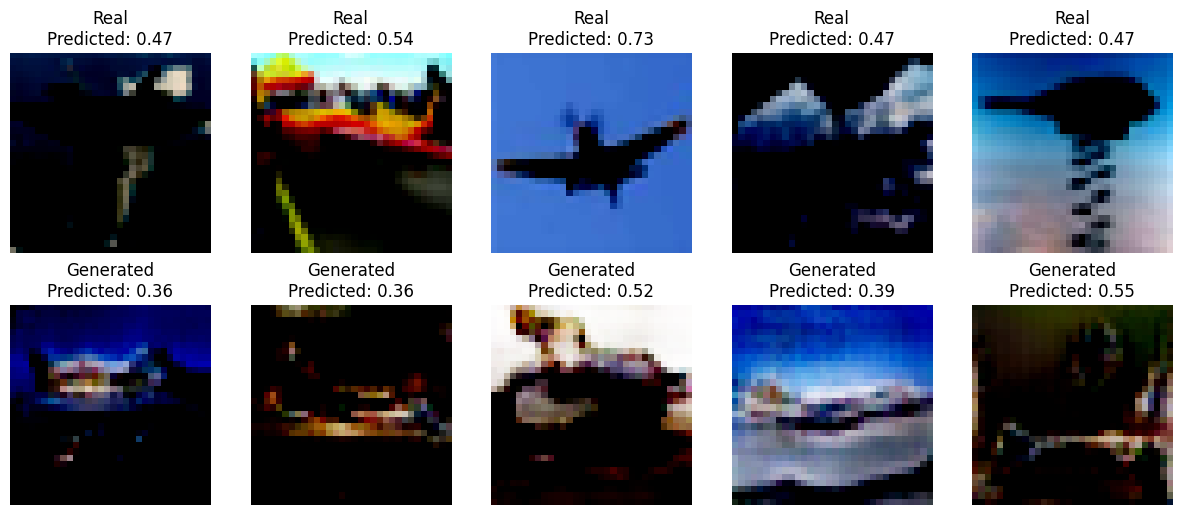

1400 [D loss: 0.660912, acc.: 60.94%] [G loss: 0.943139]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 24ms/step
[[0.38539806]
 [0.5228785 ]
 [0.4888718 ]
 [0.42217308]
 [0.48596156]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 22ms/step
[[0.30472702]
 [0.33320946]
 [0.39619964]
 [0.6560002 ]
 [0.37341282]]
1/1 [==============================] - 0s 29ms/step


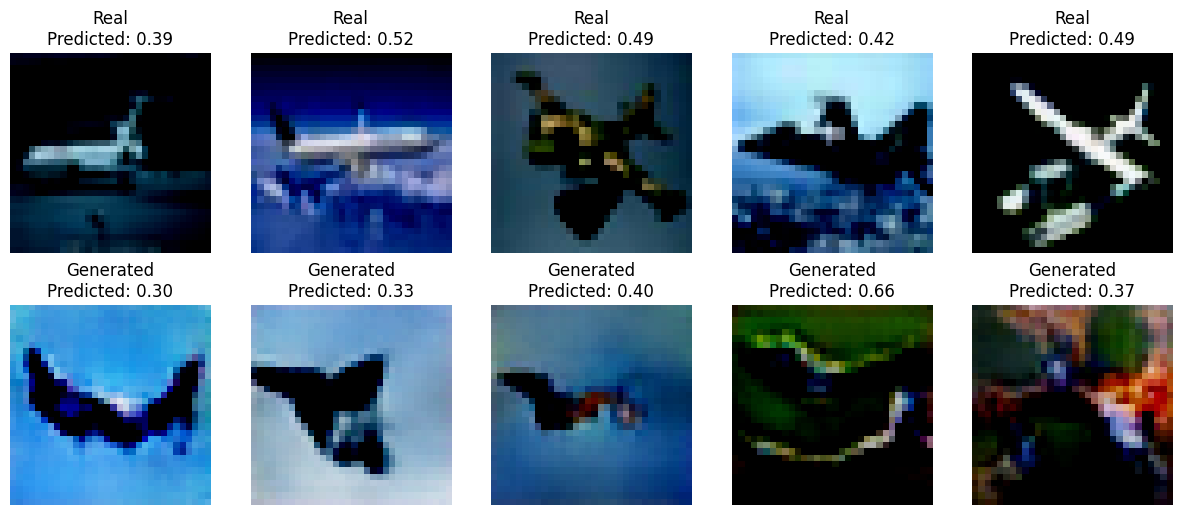

1600 [D loss: 0.645911, acc.: 55.47%] [G loss: 1.077516]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.46758914]
 [0.5384114 ]
 [0.67883277]
 [0.485825  ]
 [0.66520274]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.42866609]
 [0.34257087]
 [0.54348904]
 [0.45426017]
 [0.31969798]]
1/1 [==============================] - 0s 19ms/step


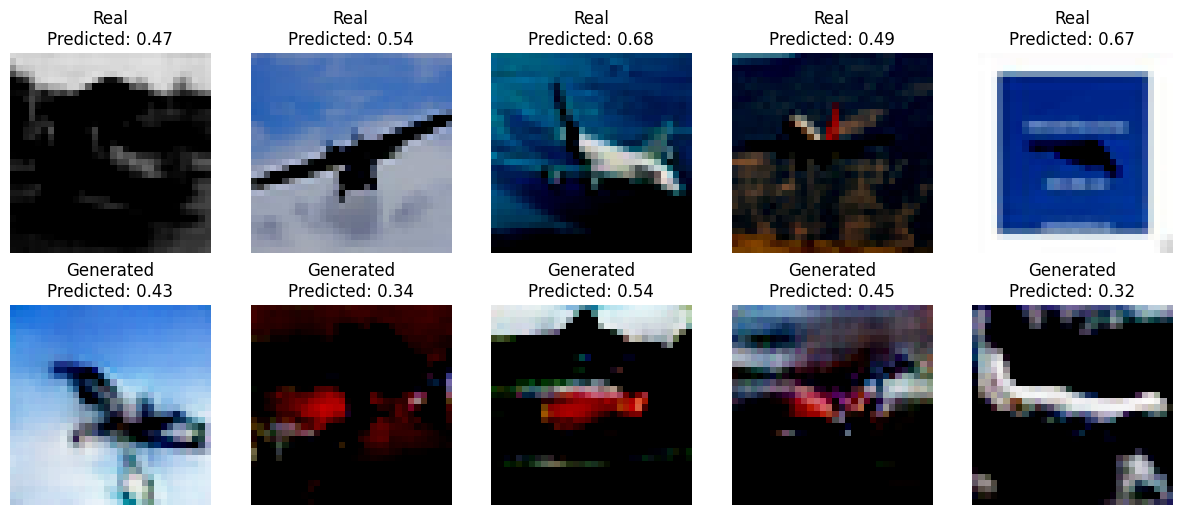

1800 [D loss: 0.607073, acc.: 65.62%] [G loss: 0.875976]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.56280696]
 [0.62206113]
 [0.49356714]
 [0.49405736]
 [0.46114245]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.4184256 ]
 [0.5028173 ]
 [0.14082077]
 [0.3543376 ]
 [0.4268885 ]]
1/1 [==============================] - 0s 19ms/step


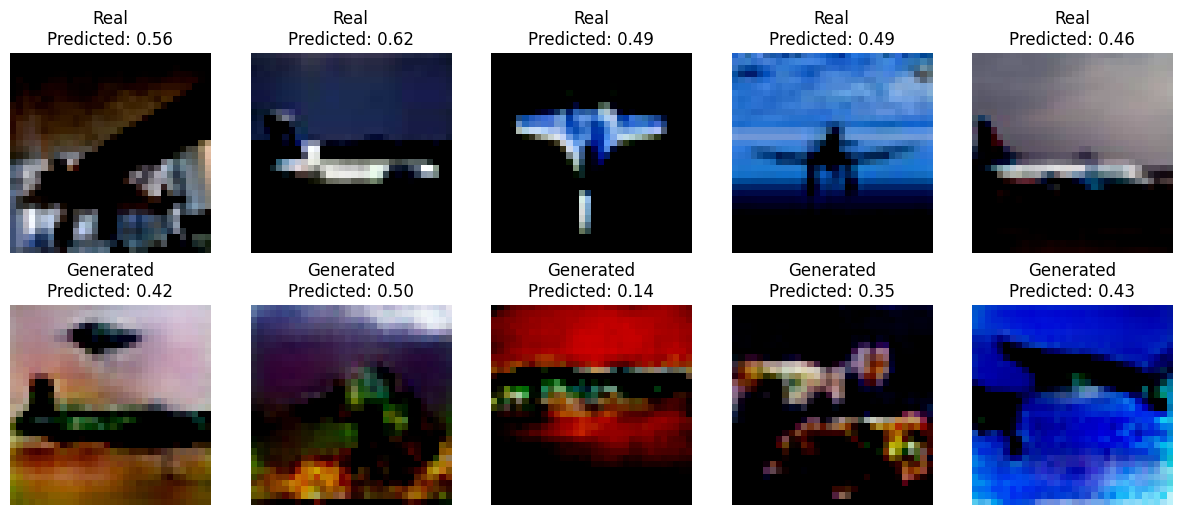

2000 [D loss: 0.676829, acc.: 60.94%] [G loss: 1.055982]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.4183422 ]
 [0.54194236]
 [0.6289262 ]
 [0.44528773]
 [0.55788165]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.33753383]
 [0.4849005 ]
 [0.1891063 ]
 [0.26753908]
 [0.44047192]]
1/1 [==============================] - 0s 21ms/step


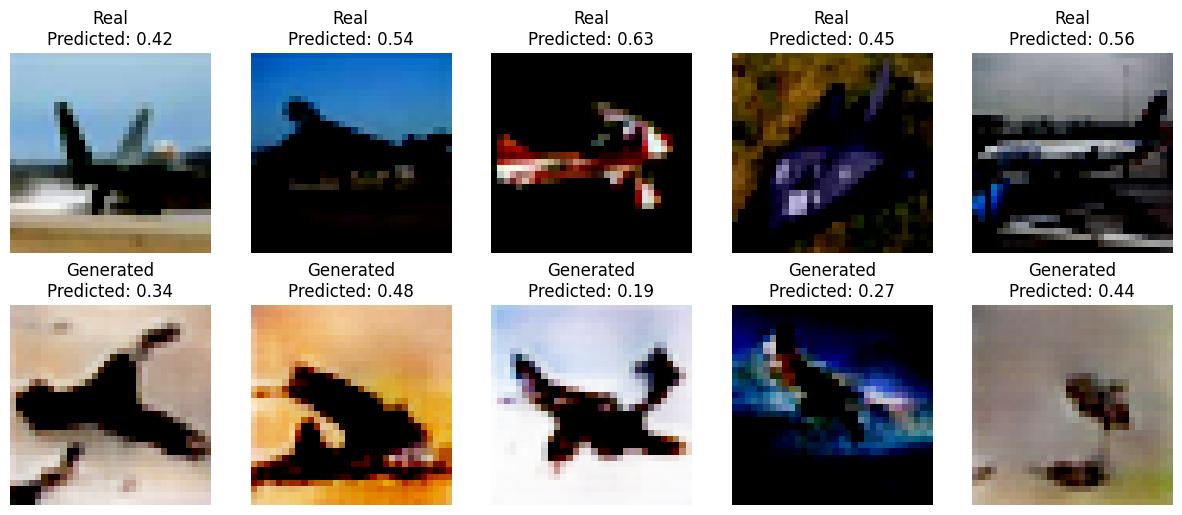

2200 [D loss: 0.593694, acc.: 70.31%] [G loss: 0.965050]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 22ms/step
[[0.58402735]
 [0.49705723]
 [0.4768383 ]
 [0.6793412 ]
 [0.48747942]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.29645753]
 [0.37667704]
 [0.36932644]
 [0.24375823]
 [0.37379244]]
1/1 [==============================] - 0s 19ms/step


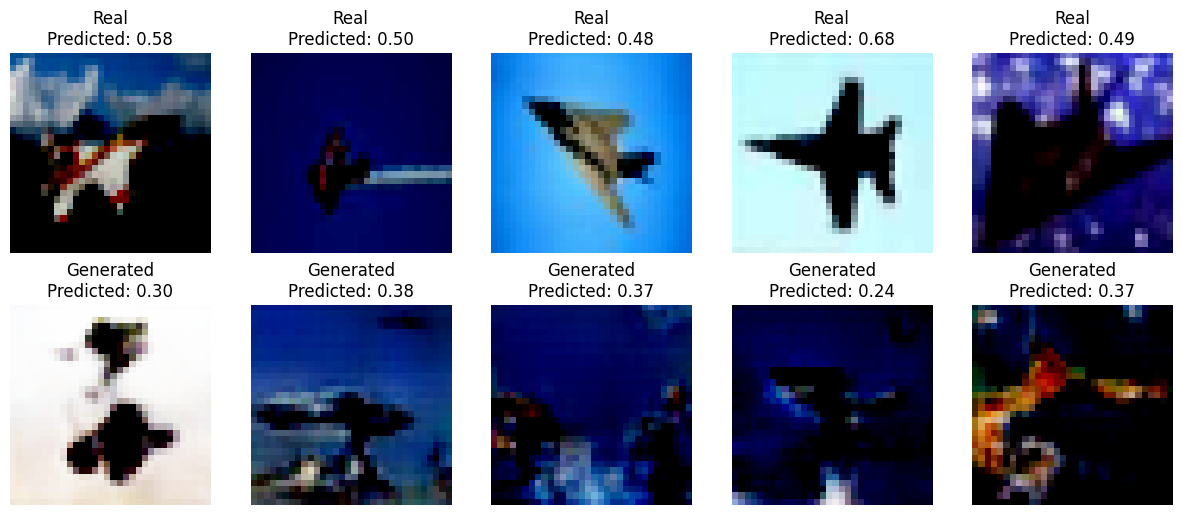

2400 [D loss: 0.620958, acc.: 64.84%] [G loss: 1.003859]
2/2 [==============================] - 0s 6ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 37ms/step
[[0.73944193]
 [0.79601777]
 [0.5872701 ]
 [0.60771817]
 [0.54886967]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 33ms/step
[[0.28421715]
 [0.31095344]
 [0.42651373]
 [0.35061517]
 [0.36627576]]
1/1 [==============================] - 0s 22ms/step


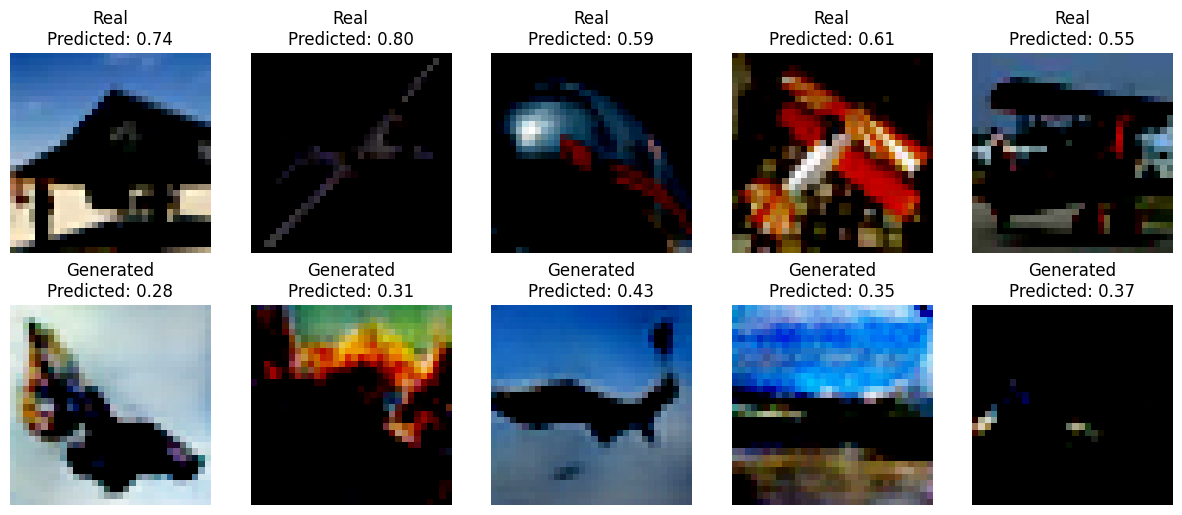

2600 [D loss: 0.619650, acc.: 68.75%] [G loss: 0.996030]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 22ms/step
[[0.66809607]
 [0.444276  ]
 [0.7059264 ]
 [0.30805913]
 [0.32409644]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.55470866]
 [0.40009624]
 [0.4813557 ]
 [0.3301196 ]
 [0.30925956]]
1/1 [==============================] - 0s 19ms/step


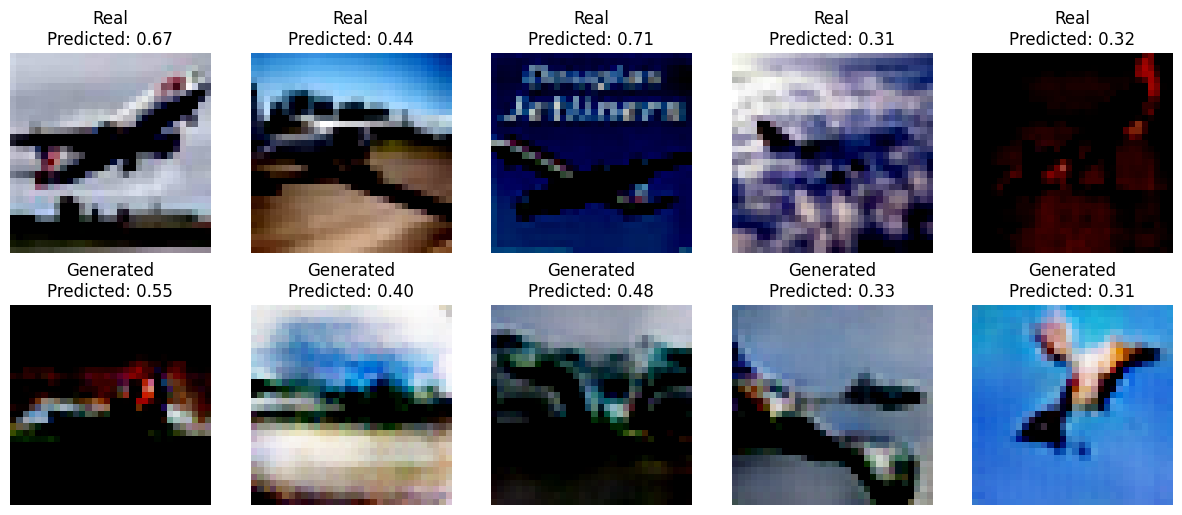

2800 [D loss: 0.611567, acc.: 64.84%] [G loss: 0.899048]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.67868555]
 [0.618894  ]
 [0.4654249 ]
 [0.685553  ]
 [0.48866096]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 24ms/step
[[0.22805251]
 [0.20938356]
 [0.25820044]
 [0.46317577]
 [0.27598175]]
1/1 [==============================] - 0s 24ms/step


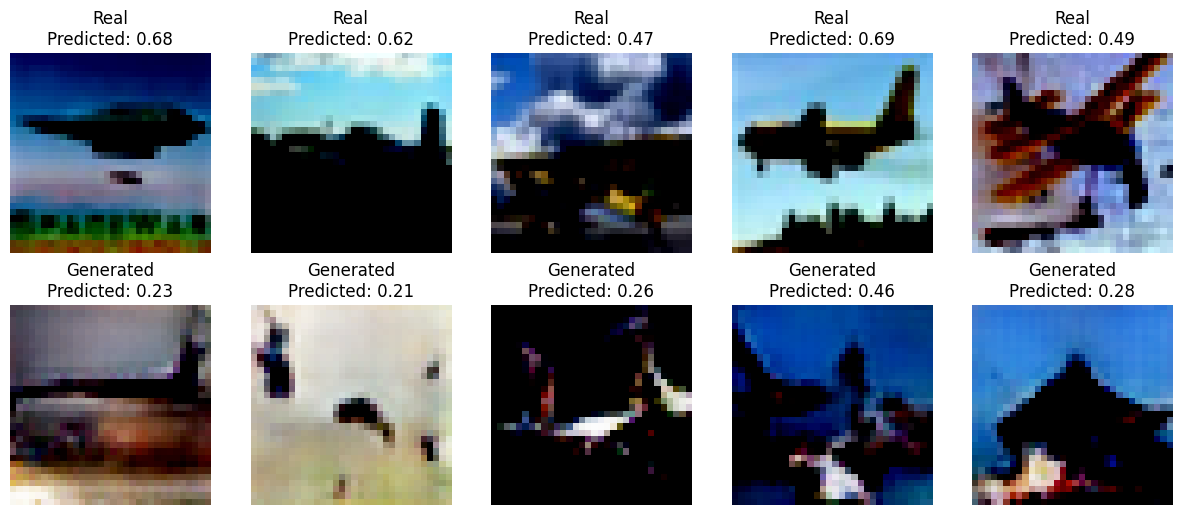

3000 [D loss: 0.531646, acc.: 75.78%] [G loss: 0.982157]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.57668996]
 [0.5023917 ]
 [0.61844444]
 [0.7236307 ]
 [0.6928461 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.41142973]
 [0.34825948]
 [0.2526454 ]
 [0.46366036]
 [0.42252317]]
1/1 [==============================] - 0s 20ms/step


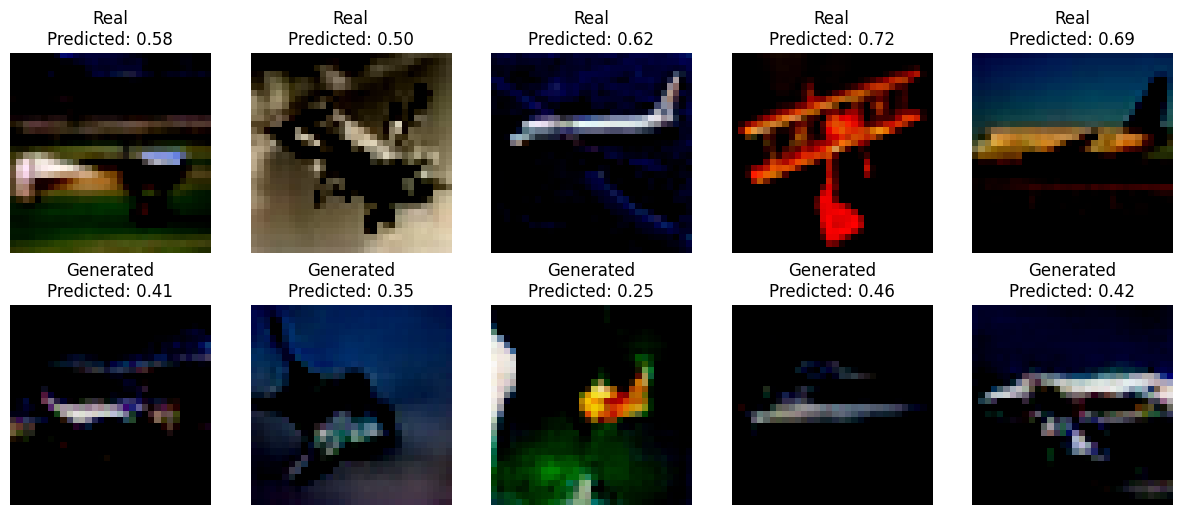

3200 [D loss: 0.569637, acc.: 75.00%] [G loss: 0.889287]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.5395506 ]
 [0.5546254 ]
 [0.87455195]
 [0.46068949]
 [0.7743208 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 24ms/step
[[0.5674421 ]
 [0.34516948]
 [0.35614905]
 [0.31025547]
 [0.31501168]]
1/1 [==============================] - 0s 27ms/step


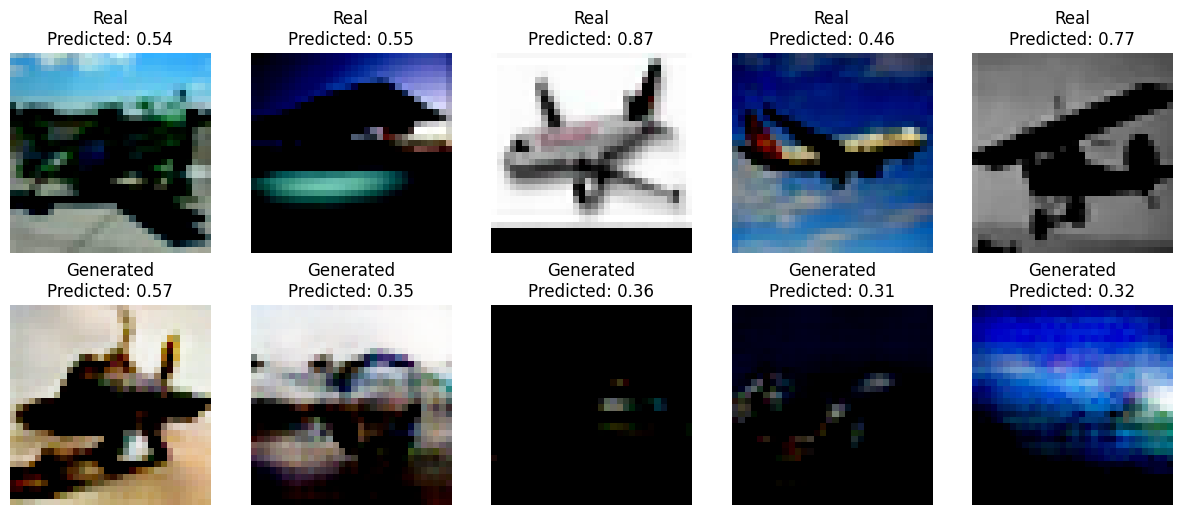

3400 [D loss: 0.589265, acc.: 70.31%] [G loss: 0.984663]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.3857697 ]
 [0.5666874 ]
 [0.54978627]
 [0.4822851 ]
 [0.8322551 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.4436279 ]
 [0.34697238]
 [0.3708064 ]
 [0.2660415 ]
 [0.54172236]]
1/1 [==============================] - 0s 19ms/step


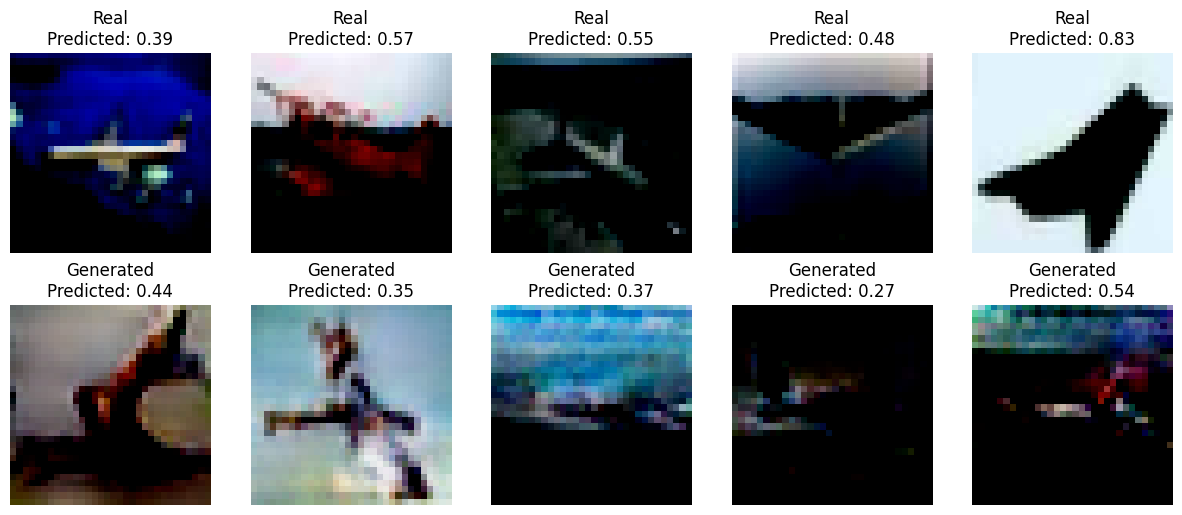

3600 [D loss: 0.601151, acc.: 72.66%] [G loss: 0.912688]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.32688537]
 [0.6505991 ]
 [0.62274003]
 [0.46727622]
 [0.80219245]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.3809519]
 [0.5665734]
 [0.5852257]
 [0.3839804]
 [0.2873851]]
1/1 [==============================] - 0s 25ms/step


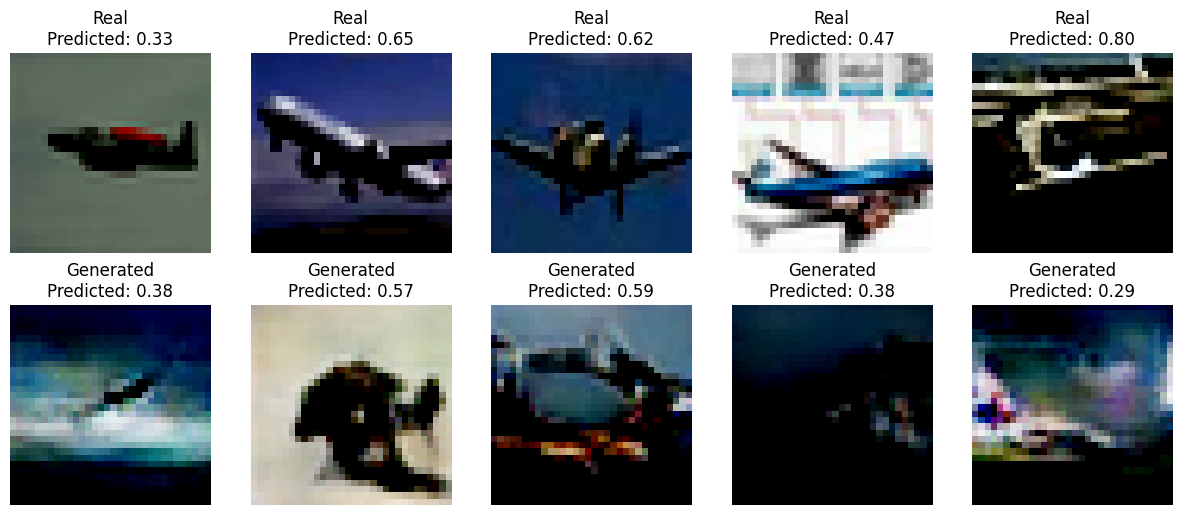

3800 [D loss: 0.585241, acc.: 69.53%] [G loss: 1.059465]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.67994153]
 [0.6501647 ]
 [0.60241663]
 [0.52844644]
 [0.41125733]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.26399326]
 [0.3754044 ]
 [0.41983318]
 [0.2968997 ]
 [0.3489538 ]]
1/1 [==============================] - 0s 19ms/step


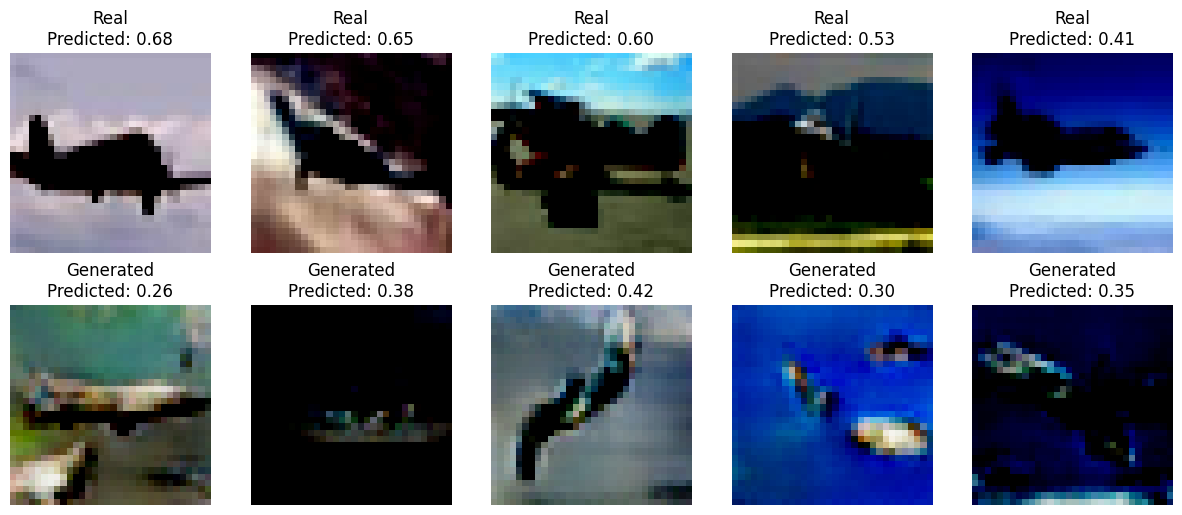

4000 [D loss: 0.594844, acc.: 71.88%] [G loss: 1.004978]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.4672995 ]
 [0.38328156]
 [0.67143273]
 [0.6291601 ]
 [0.5978882 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.30454487]
 [0.3335594 ]
 [0.31990096]
 [0.45191893]
 [0.54571646]]
1/1 [==============================] - 0s 21ms/step


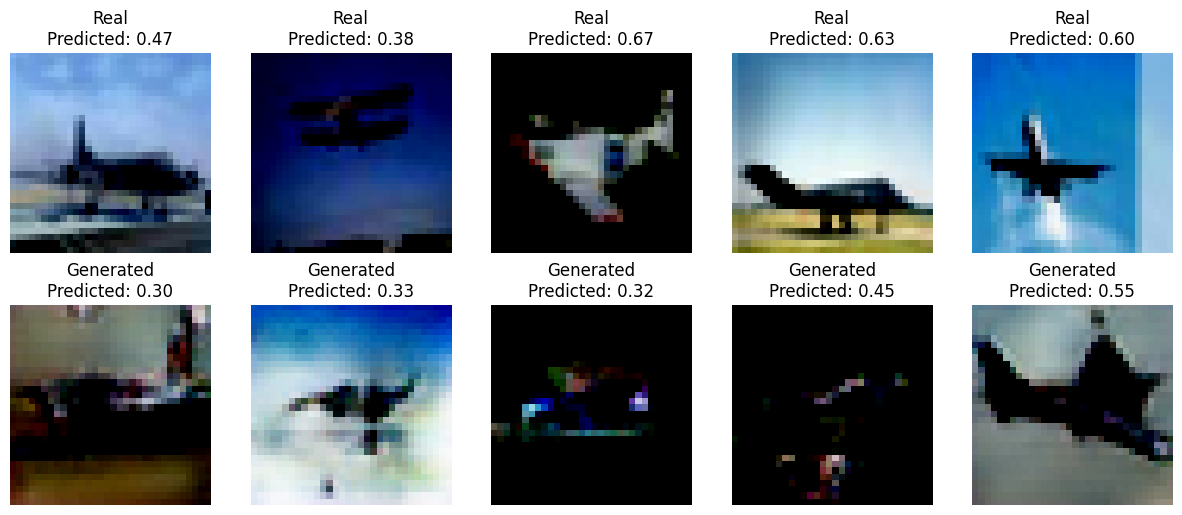

4200 [D loss: 0.624690, acc.: 64.84%] [G loss: 1.030406]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.3608045 ]
 [0.63427883]
 [0.6616587 ]
 [0.6867149 ]
 [0.47714642]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.28023353]
 [0.27855492]
 [0.43008927]
 [0.37946624]
 [0.528562  ]]
1/1 [==============================] - 0s 19ms/step


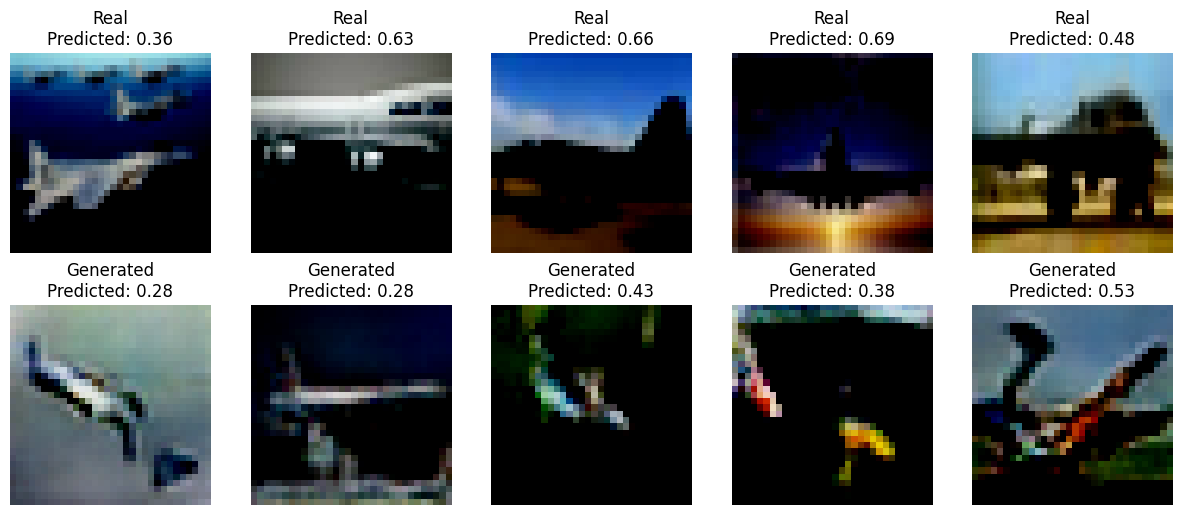

4400 [D loss: 0.566797, acc.: 75.00%] [G loss: 1.020109]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.58453196]
 [0.7979382 ]
 [0.4411718 ]
 [0.6283858 ]
 [0.86759764]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.33737028]
 [0.43395084]
 [0.17687316]
 [0.2746883 ]
 [0.279963  ]]
1/1 [==============================] - 0s 19ms/step


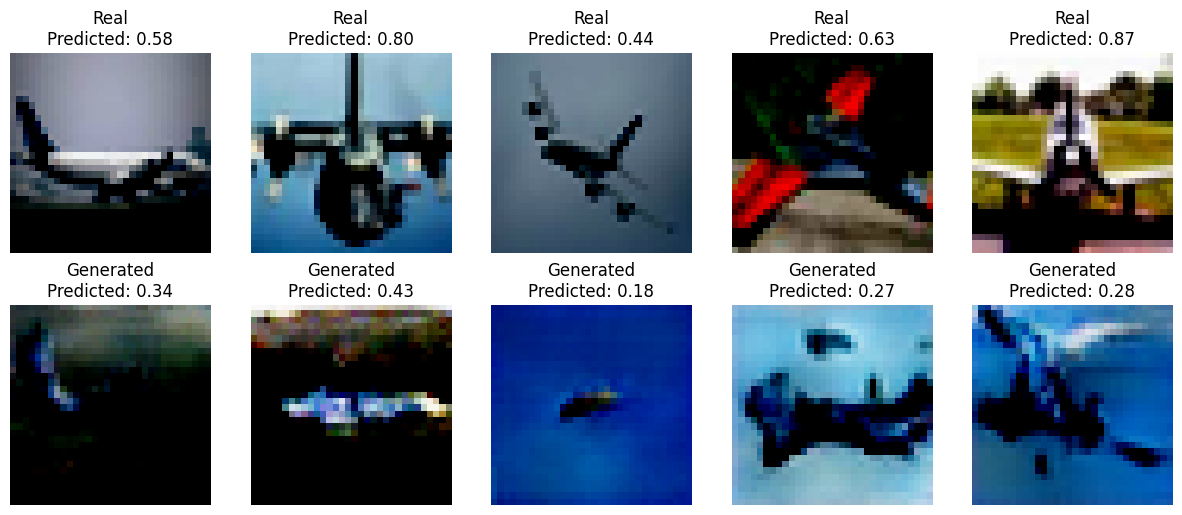

4600 [D loss: 0.492579, acc.: 81.25%] [G loss: 1.143308]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 25ms/step
[[0.7409579 ]
 [0.488422  ]
 [0.42104384]
 [0.64198065]
 [0.6709888 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 24ms/step
[[0.23008396]
 [0.26622927]
 [0.3010377 ]
 [0.28860328]
 [0.33395964]]
1/1 [==============================] - 0s 24ms/step


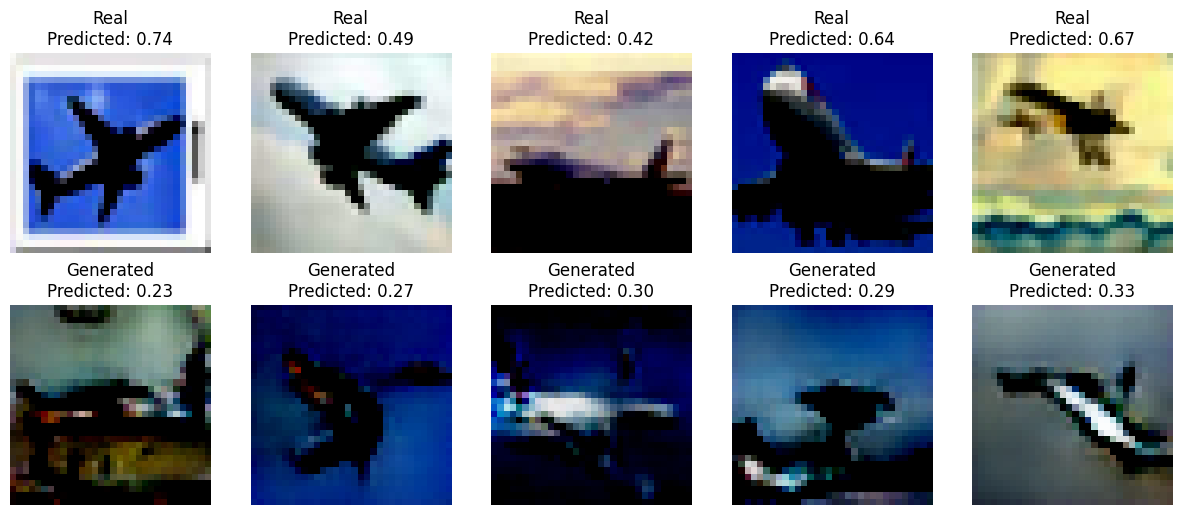

4800 [D loss: 0.542403, acc.: 74.22%] [G loss: 1.132834]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.5206378 ]
 [0.7182425 ]
 [0.57350636]
 [0.6094878 ]
 [0.68738407]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.3836594 ]
 [0.34377265]
 [0.5196954 ]
 [0.23858309]
 [0.27745095]]
1/1 [==============================] - 0s 18ms/step


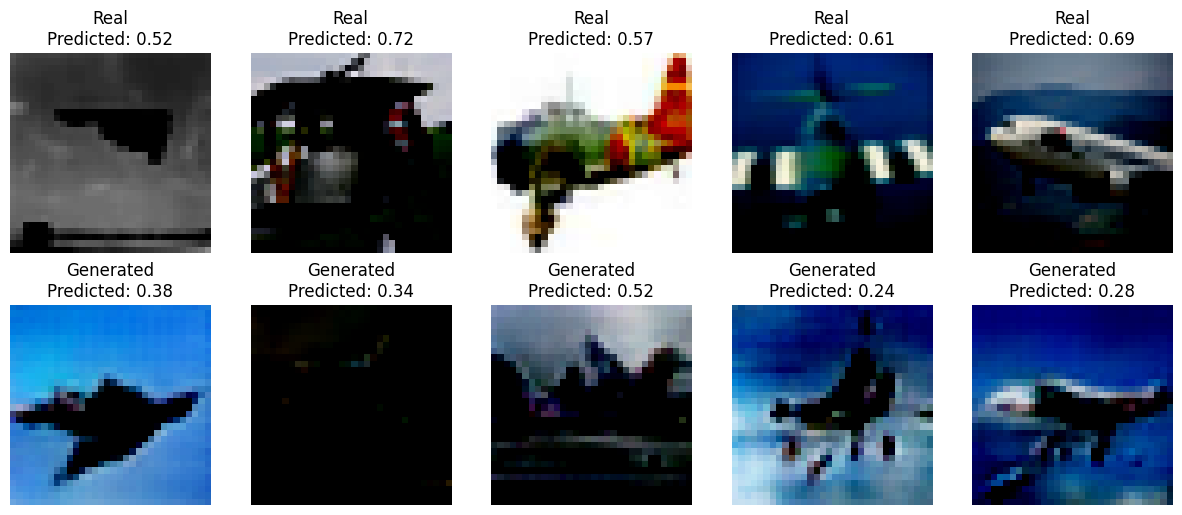

5000 [D loss: 0.596700, acc.: 64.06%] [G loss: 1.134226]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 24ms/step
[[0.8837216 ]
 [0.5796459 ]
 [0.61364573]
 [0.8355551 ]
 [0.5597221 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 24ms/step
[[0.4415995 ]
 [0.3142069 ]
 [0.29762405]
 [0.49538115]
 [0.43271998]]
1/1 [==============================] - 0s 45ms/step


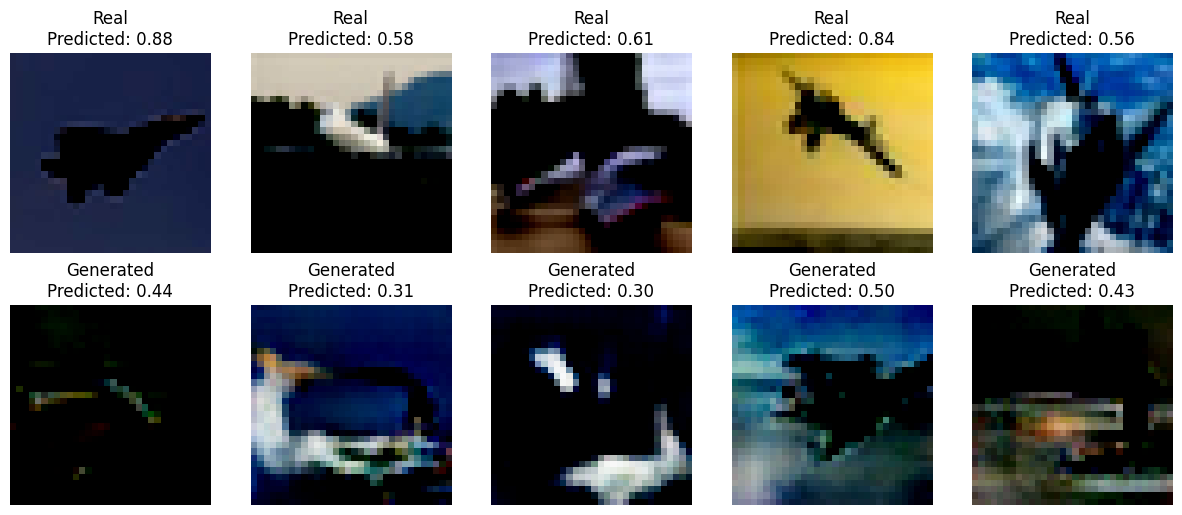

5200 [D loss: 0.558882, acc.: 72.66%] [G loss: 1.167232]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.70541304]
 [0.5451289 ]
 [0.5867769 ]
 [0.26472554]
 [0.48737955]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 20ms/step
[[0.2913671 ]
 [0.18925455]
 [0.24660331]
 [0.28296423]
 [0.26950905]]
1/1 [==============================] - 0s 19ms/step


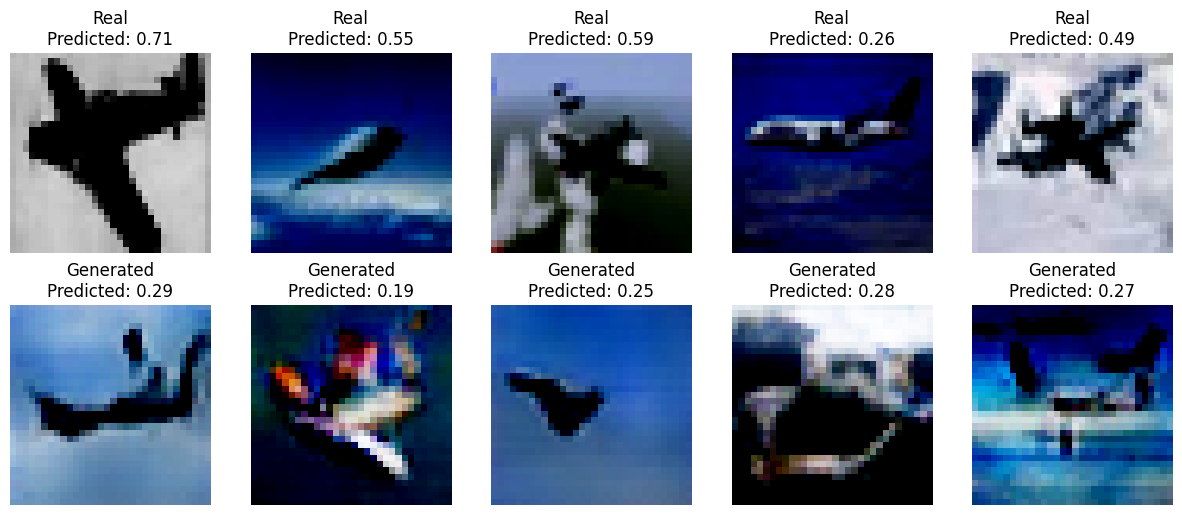

5400 [D loss: 0.584118, acc.: 70.31%] [G loss: 1.211047]
2/2 [==============================] - 0s 4ms/step


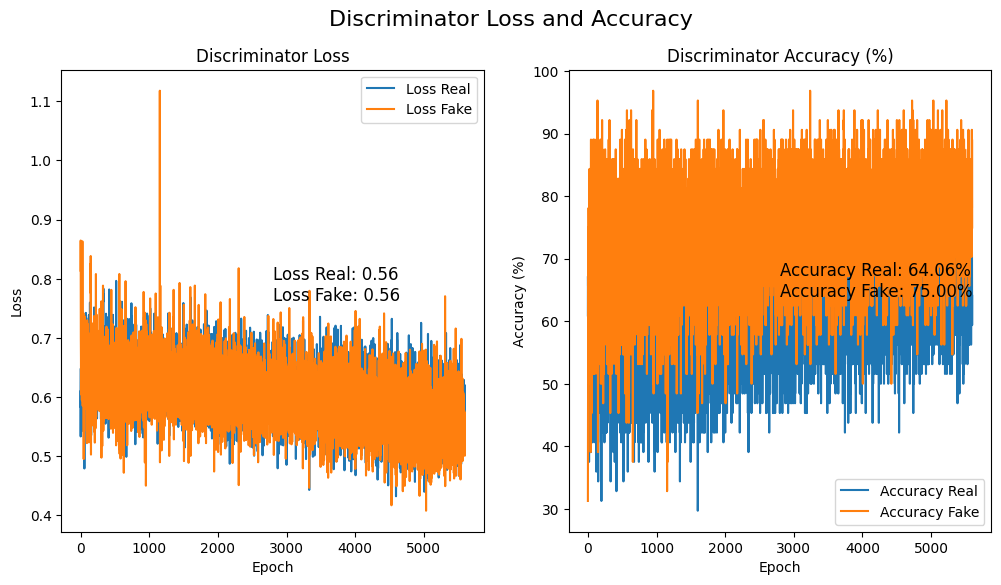

In [38]:
# Create a new GAN instance
gan = GAN()

# Specify the epoch from which you want to resume training
resume_epoch =3600  # Change this to the epoch you want to start from

# Load the weights for the specified epoch
load_model_weights(gan, resume_epoch)

# Continue training for additional epochs
additional_epochs = 2000  # Adjust the number of additional epochs as needed

gan.train(noise_function=generate_random_noise, epochs=resume_epoch + additional_epochs, batch_size=64, save_interval=200)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_46 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 flatten_7 (Flatten)         (None, 16384)           

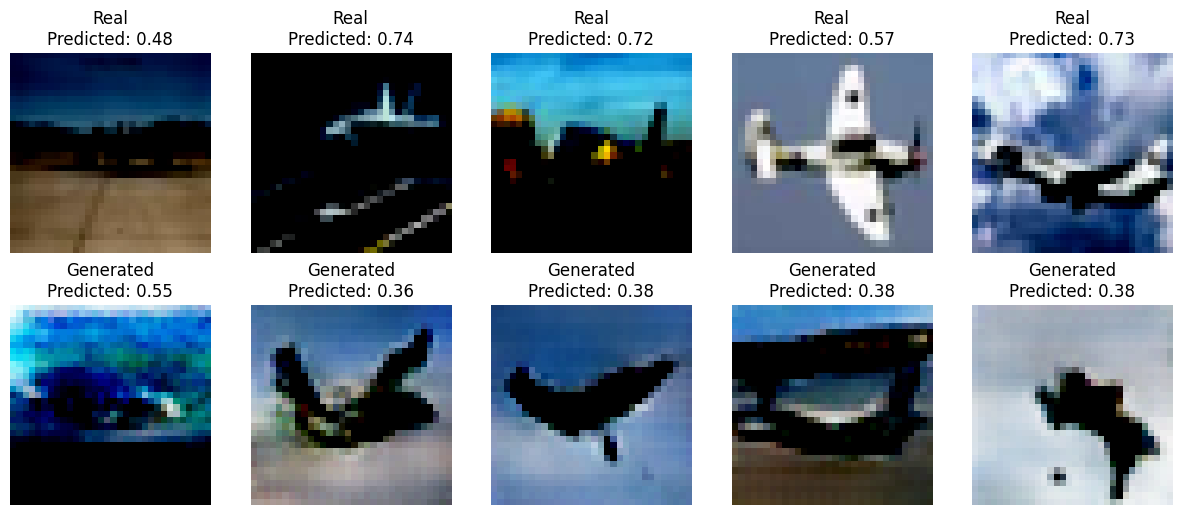

0 [D loss: 0.701517, acc.: 51.56%] [G loss: 0.801048]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.65651083]
 [0.66726655]
 [0.6503134 ]
 [0.43286818]
 [0.81588644]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.29122144]
 [0.43150997]
 [0.28046975]
 [0.31607085]
 [0.23992854]]
1/1 [==============================] - 0s 20ms/step


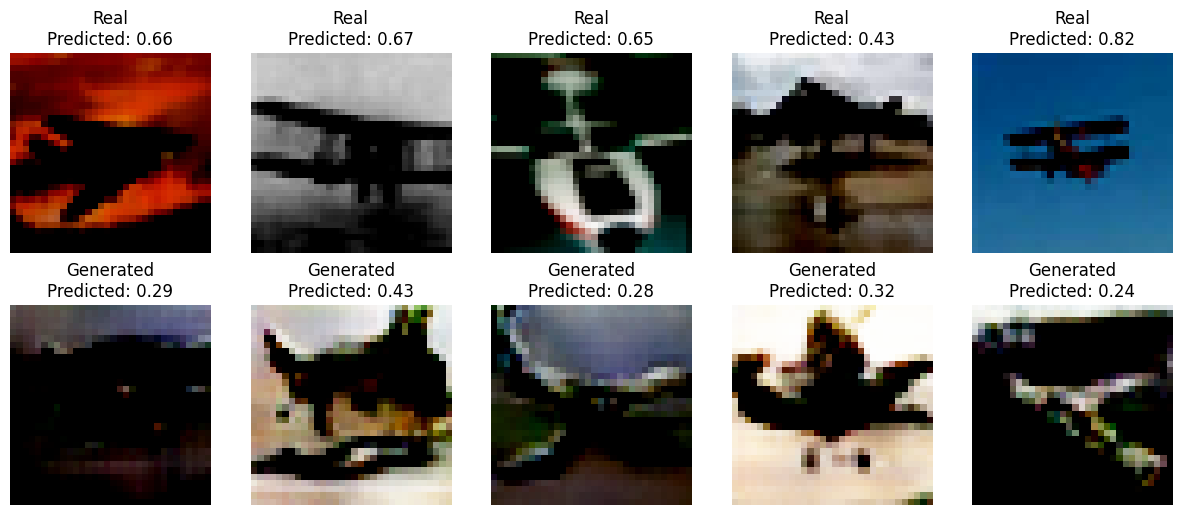

500 [D loss: 0.572245, acc.: 71.88%] [G loss: 1.236009]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.8440881 ]
 [0.6353318 ]
 [0.66333455]
 [0.6552039 ]
 [0.53669816]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.35155568]
 [0.3366363 ]
 [0.42166883]
 [0.3236337 ]
 [0.27294308]]
1/1 [==============================] - 0s 19ms/step


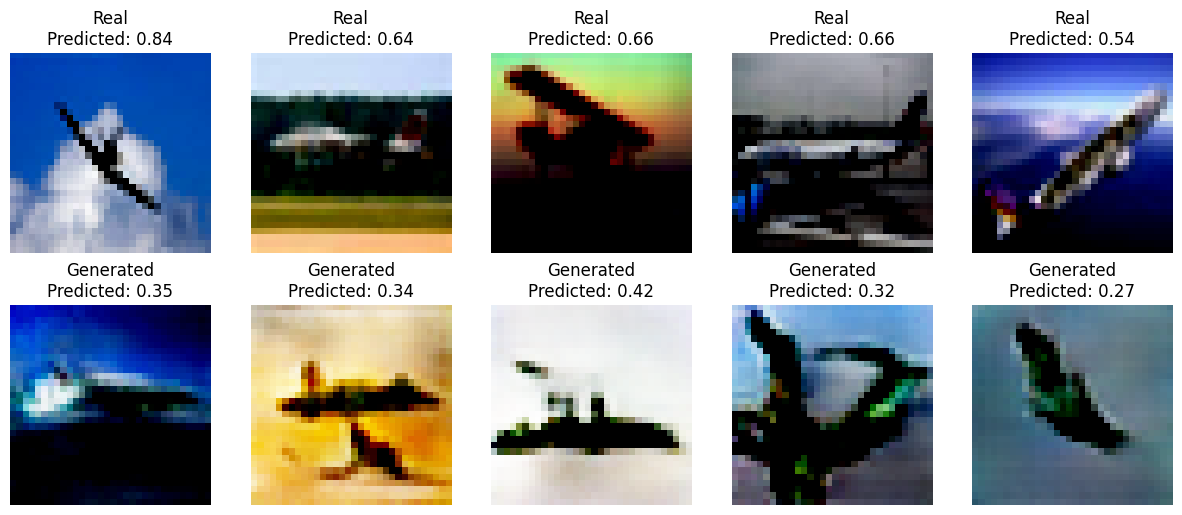

1000 [D loss: 0.509842, acc.: 81.25%] [G loss: 1.164335]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.6888238 ]
 [0.97241205]
 [0.6384438 ]
 [0.3029944 ]
 [0.9767308 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.28114867]
 [0.16359815]
 [0.33897537]
 [0.25242347]
 [0.32018214]]
1/1 [==============================] - 0s 19ms/step


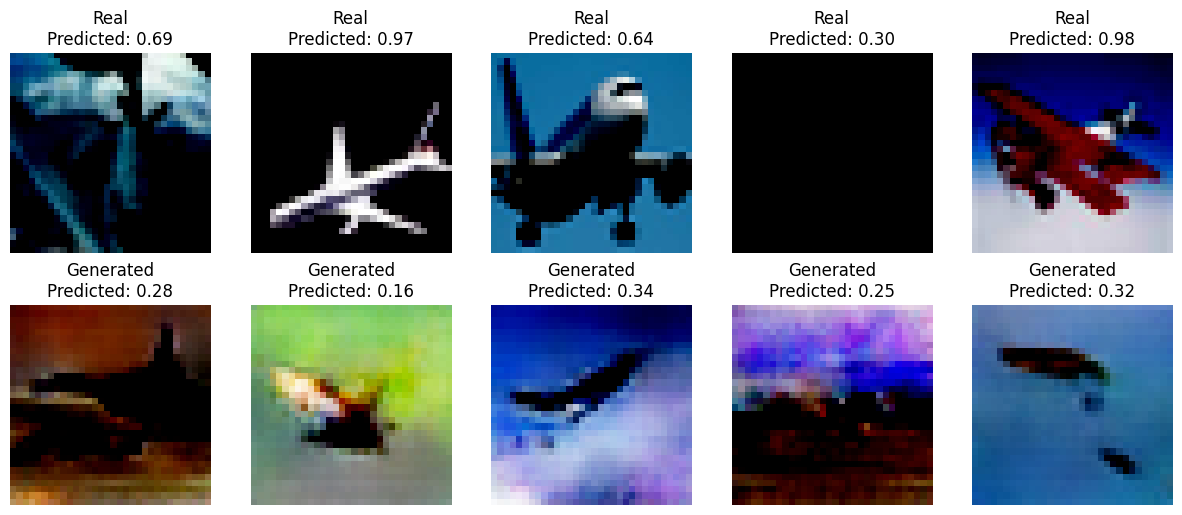

1500 [D loss: 0.584731, acc.: 74.22%] [G loss: 1.141301]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.4688324 ]
 [0.3755696 ]
 [0.5309729 ]
 [0.6843872 ]
 [0.66192716]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 22ms/step
[[0.18143839]
 [0.22794454]
 [0.33939287]
 [0.23162134]
 [0.52334756]]
1/1 [==============================] - 0s 32ms/step


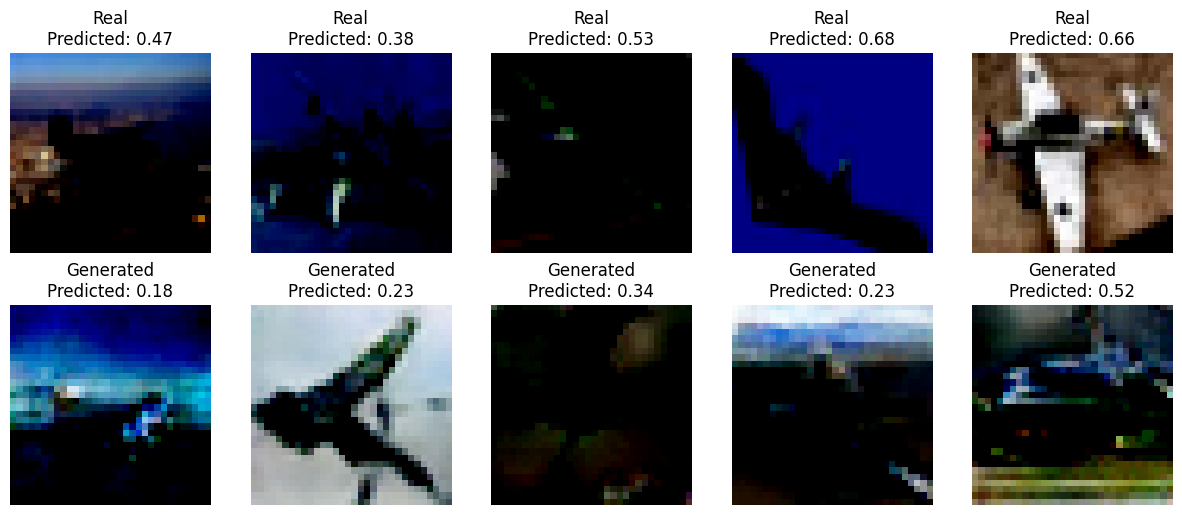

2000 [D loss: 0.573478, acc.: 70.31%] [G loss: 1.360954]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.65893525]
 [0.37804845]
 [0.9950858 ]
 [0.7097224 ]
 [0.9478657 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 25ms/step
[[0.17623857]
 [0.32962167]
 [0.37110832]
 [0.12414061]
 [0.64632857]]
1/1 [==============================] - 0s 26ms/step


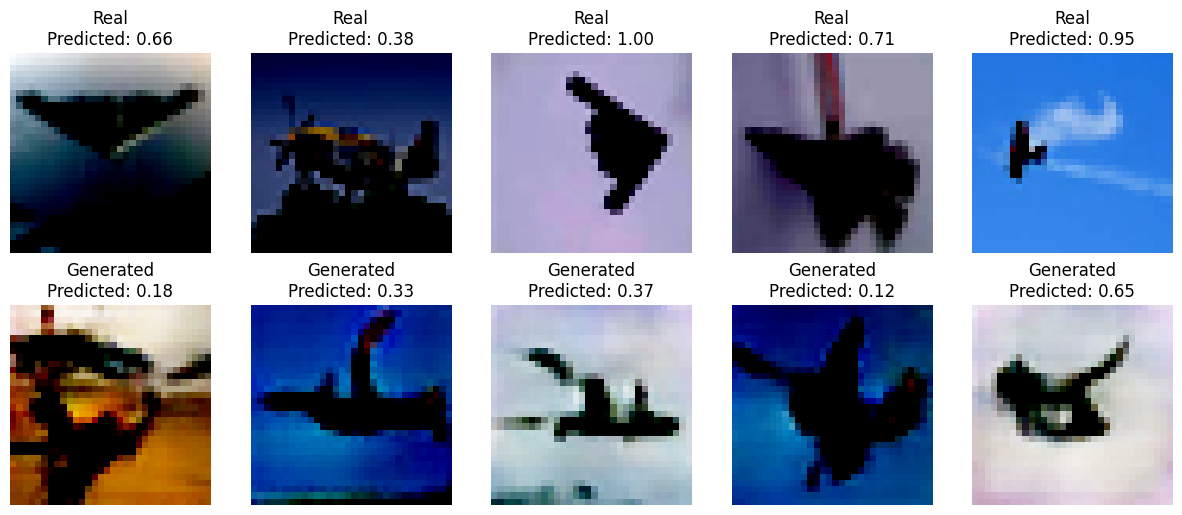

2500 [D loss: 0.475450, acc.: 84.38%] [G loss: 1.302308]
2/2 [==============================] - 0s 6ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 26ms/step
[[0.2868331 ]
 [0.7746542 ]
 [0.7831919 ]
 [0.46837705]
 [0.4605654 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 26ms/step
[[0.23594444]
 [0.3742802 ]
 [0.09282995]
 [0.23682733]
 [0.23128776]]
1/1 [==============================] - 0s 25ms/step


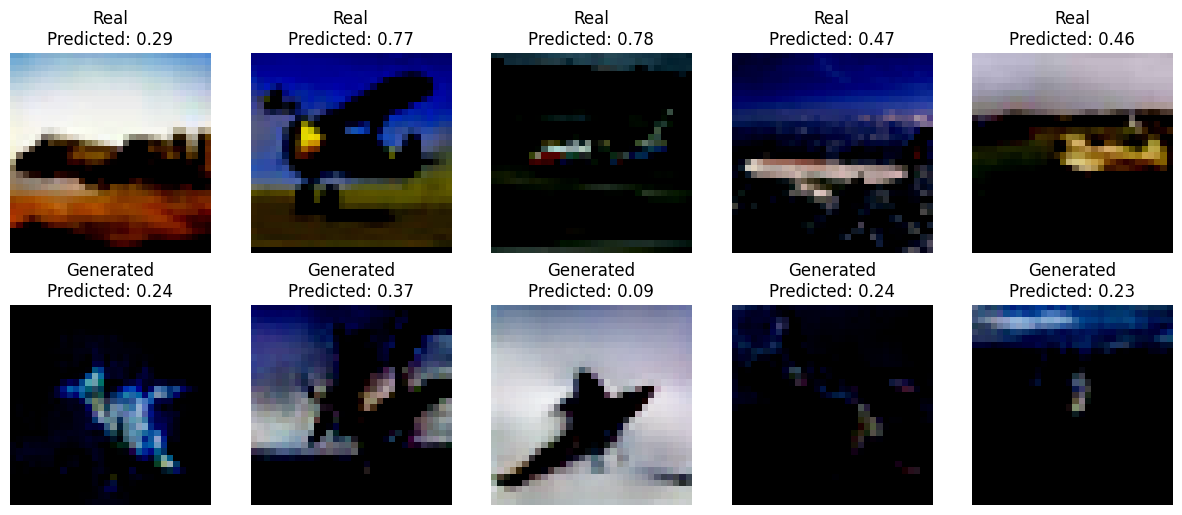

3000 [D loss: 0.611744, acc.: 65.62%] [G loss: 1.231053]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.42885733]
 [0.4301051 ]
 [0.3180436 ]
 [0.41613144]
 [0.58933866]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 22ms/step
[[0.19526869]
 [0.1413495 ]
 [0.29802817]
 [0.27770224]
 [0.3207391 ]]
1/1 [==============================] - 0s 22ms/step


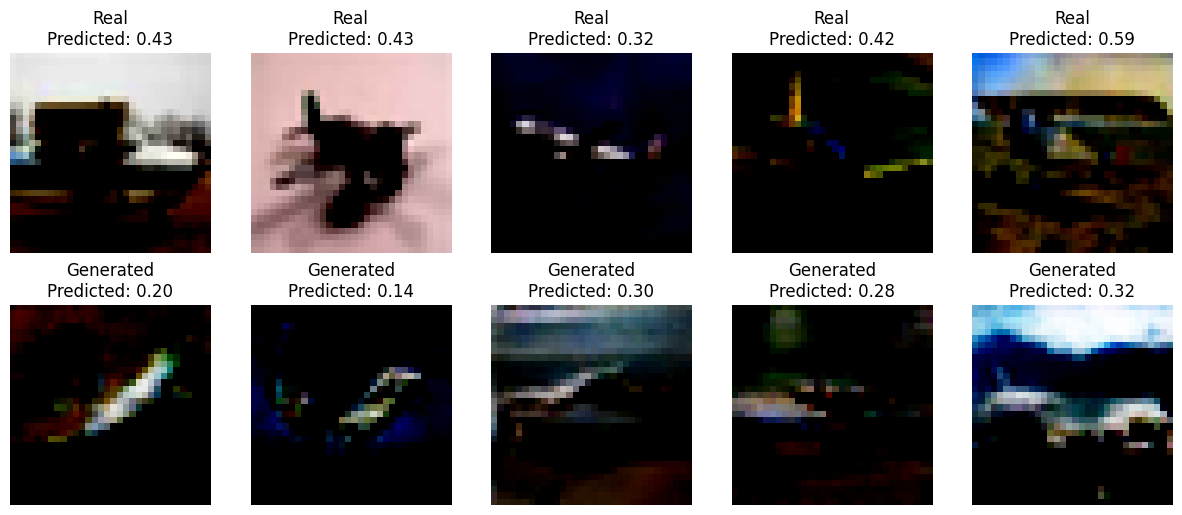

3500 [D loss: 0.540591, acc.: 75.00%] [G loss: 1.354860]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.7570007 ]
 [0.3928774 ]
 [0.64263386]
 [0.58081955]
 [0.769626  ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.15955463]
 [0.18948293]
 [0.23959088]
 [0.1592354 ]
 [0.3539128 ]]
1/1 [==============================] - 0s 19ms/step


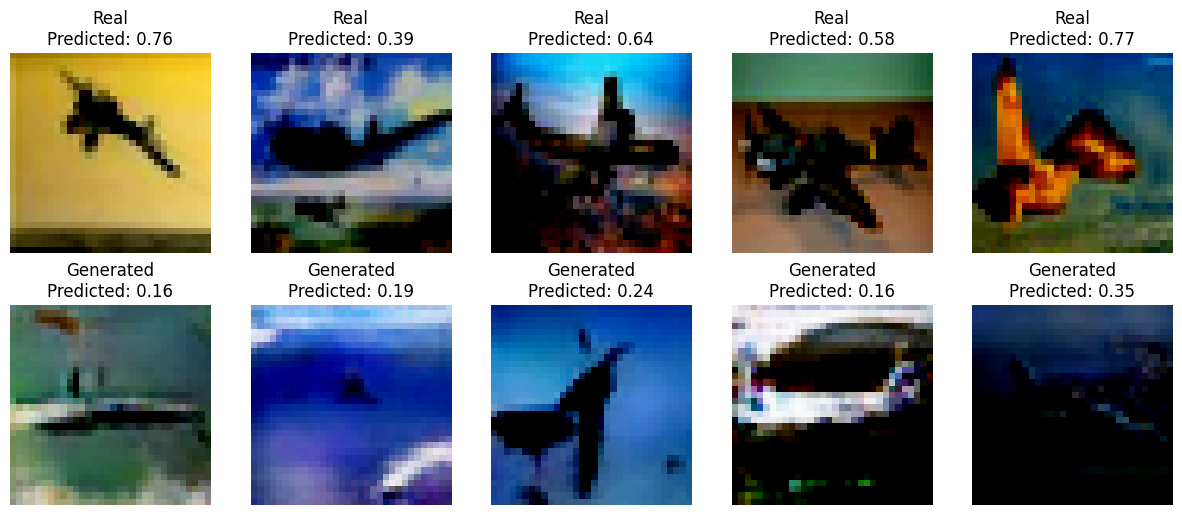

4000 [D loss: 0.521947, acc.: 77.34%] [G loss: 1.401374]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 19ms/step
[[0.55770403]
 [0.7712714 ]
 [0.18933567]
 [0.4995398 ]
 [0.58911794]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.25985378]
 [0.23500392]
 [0.421466  ]
 [0.2515277 ]
 [0.20023052]]
1/1 [==============================] - 0s 18ms/step


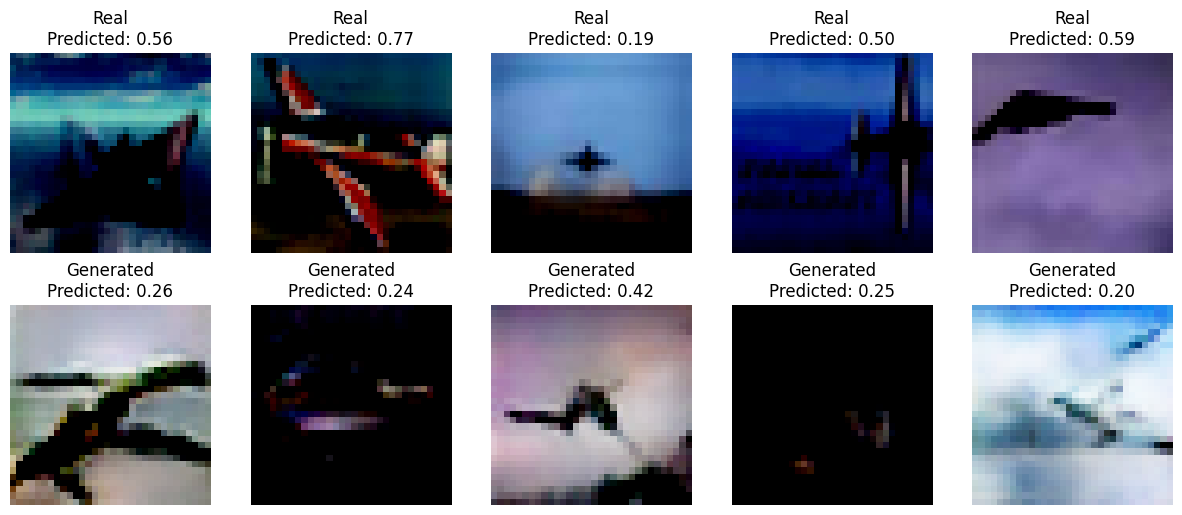

4500 [D loss: 0.478903, acc.: 79.69%] [G loss: 1.380787]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.7813331 ]
 [0.79004115]
 [0.9895648 ]
 [0.9057599 ]
 [0.79417694]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 18ms/step
[[0.1776392 ]
 [0.08603097]
 [0.20208351]
 [0.19187552]
 [0.17580153]]
1/1 [==============================] - 0s 18ms/step


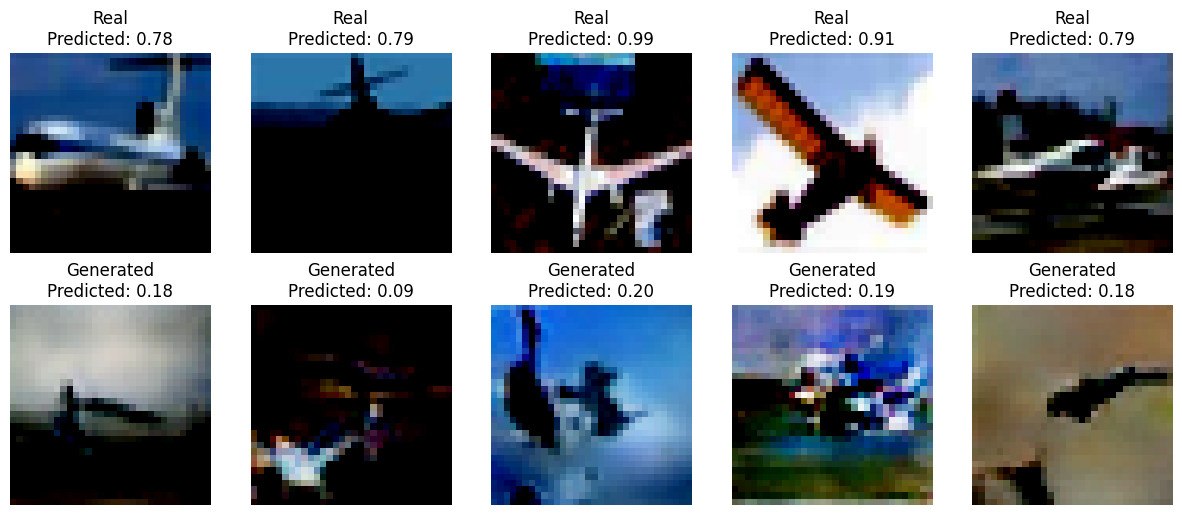

5000 [D loss: 0.444315, acc.: 83.59%] [G loss: 1.556362]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.6341218 ]
 [0.99212307]
 [0.8790485 ]
 [0.7400155 ]
 [0.82584655]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.17275004]
 [0.27244753]
 [0.4462959 ]
 [0.11109117]
 [0.41519582]]
1/1 [==============================] - 0s 21ms/step


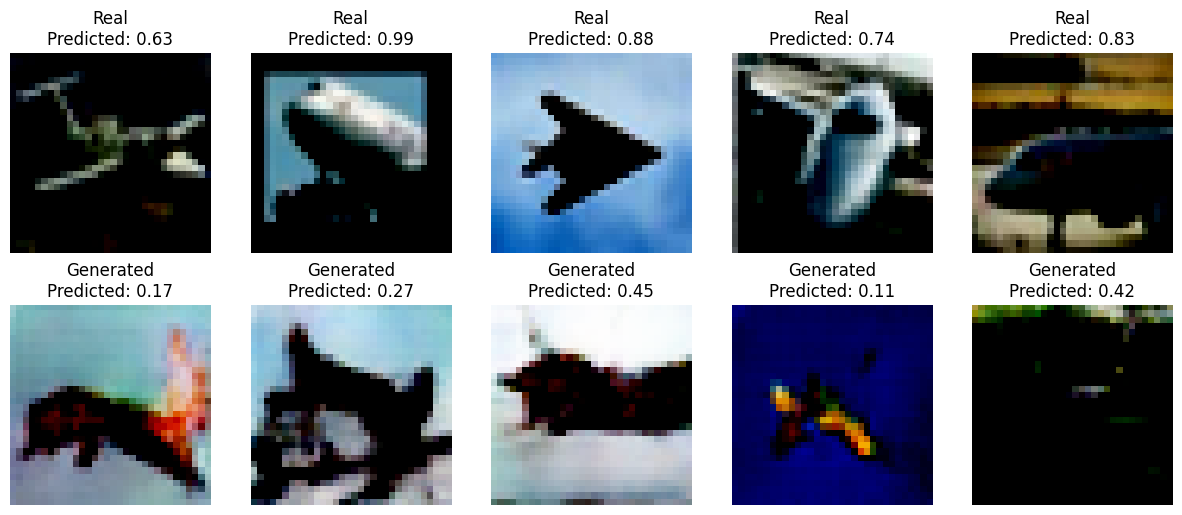

5500 [D loss: 0.447791, acc.: 79.69%] [G loss: 1.415154]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 21ms/step
[[0.6540922 ]
 [0.50323886]
 [0.7096052 ]
 [0.307265  ]
 [0.93867743]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.17910272]
 [0.15582639]
 [0.1327387 ]
 [0.12180804]
 [0.23617399]]
1/1 [==============================] - 0s 23ms/step


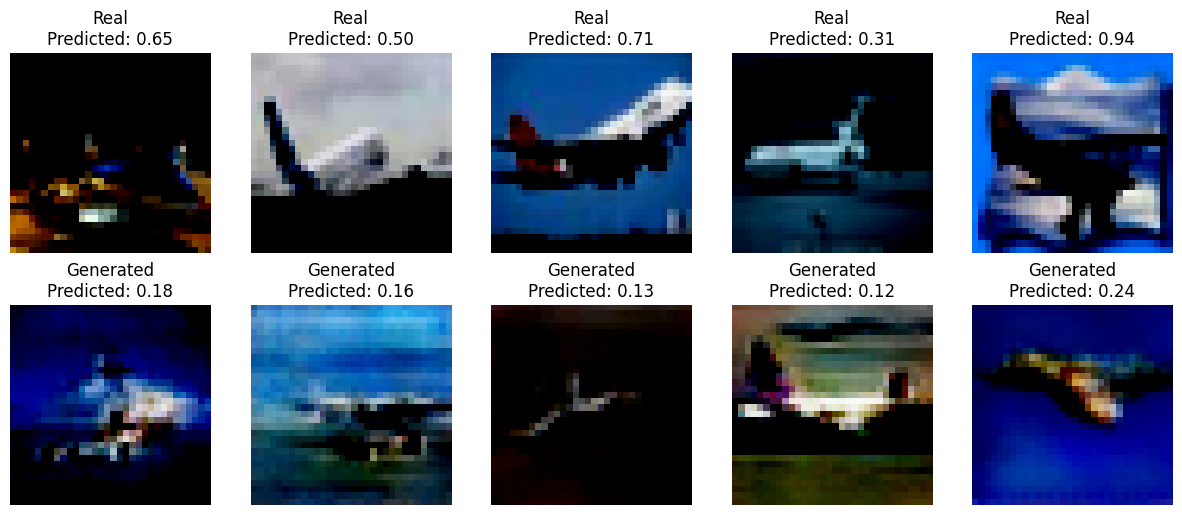

6000 [D loss: 0.410448, acc.: 82.81%] [G loss: 1.598239]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 22ms/step
[[0.7377085]
 [0.576383 ]
 [0.7002011]
 [0.8348517]
 [0.9023317]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.04636006]
 [0.30008766]
 [0.18330763]
 [0.31542954]
 [0.1947302 ]]
1/1 [==============================] - 0s 19ms/step


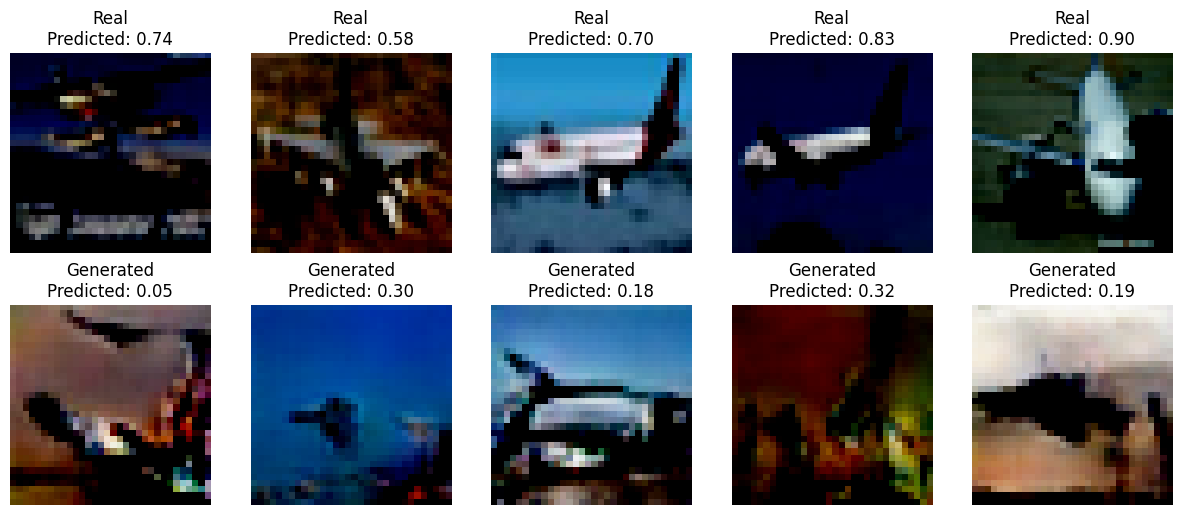

6500 [D loss: 0.450690, acc.: 80.47%] [G loss: 1.672772]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.50004995]
 [0.93794847]
 [0.69803935]
 [0.6405955 ]
 [0.86920404]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 21ms/step
[[0.23450506]
 [0.26379126]
 [0.08581323]
 [0.39015922]
 [0.28315324]]
1/1 [==============================] - 0s 20ms/step


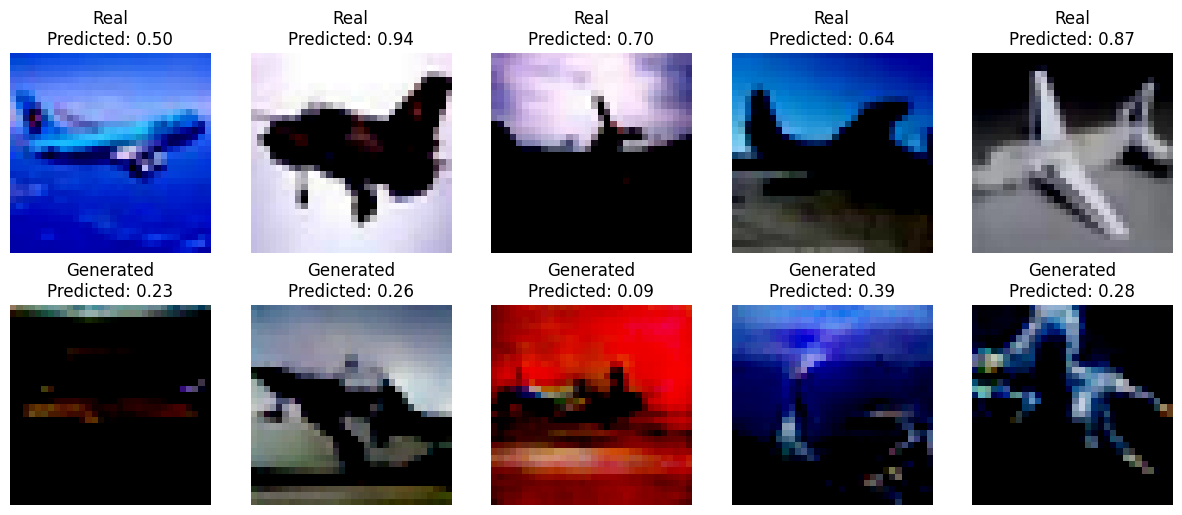

7000 [D loss: 0.433706, acc.: 80.47%] [G loss: 1.628414]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 27ms/step
[[0.71755046]
 [0.99387157]
 [0.9958943 ]
 [0.8831568 ]
 [0.86538225]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 25ms/step
[[0.16350058]
 [0.26265118]
 [0.52239877]
 [0.19380853]
 [0.09619165]]
1/1 [==============================] - 0s 26ms/step


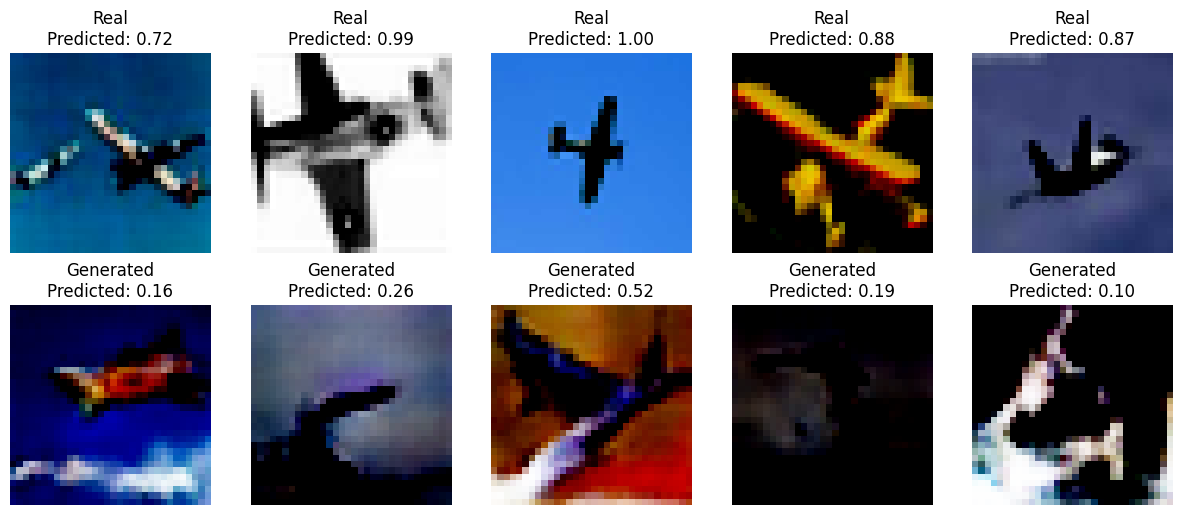

7500 [D loss: 0.398824, acc.: 85.16%] [G loss: 1.924591]
2/2 [==============================] - 0s 5ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.68007696]
 [0.38325736]
 [0.82758135]
 [0.7371334 ]
 [0.7732888 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 22ms/step
[[0.6508065 ]
 [0.44841242]
 [0.41245258]
 [0.16748191]
 [0.18204004]]
1/1 [==============================] - 0s 24ms/step


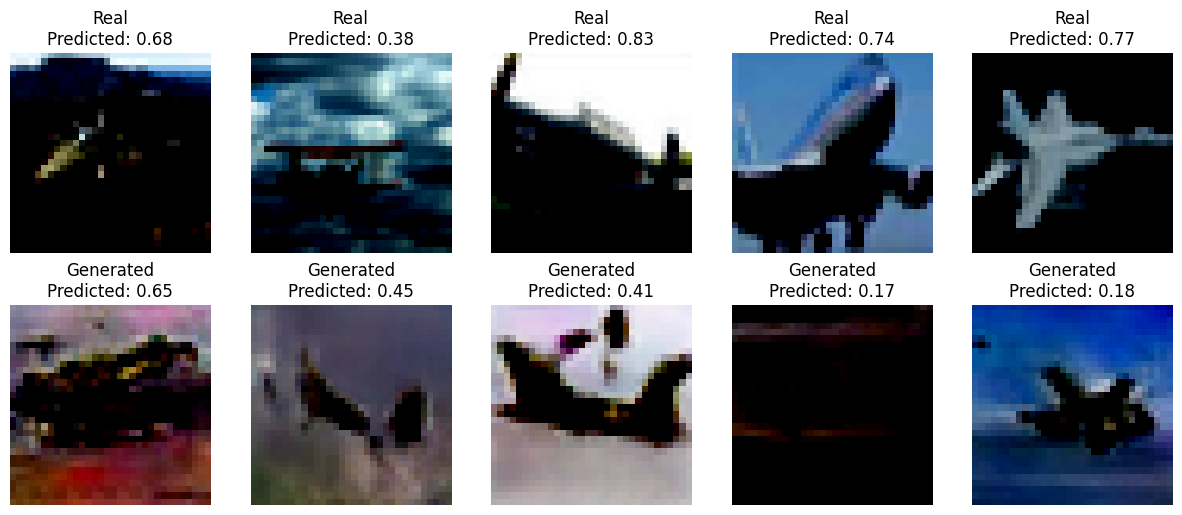

8000 [D loss: 0.404696, acc.: 82.81%] [G loss: 1.587078]
2/2 [==============================] - 0s 6ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 23ms/step
[[0.75672126]
 [0.5003863 ]
 [0.68591356]
 [0.999498  ]
 [0.91374636]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 23ms/step
[[0.07250589]
 [0.09459755]
 [0.0891878 ]
 [0.08254436]
 [0.02682397]]
1/1 [==============================] - 0s 26ms/step


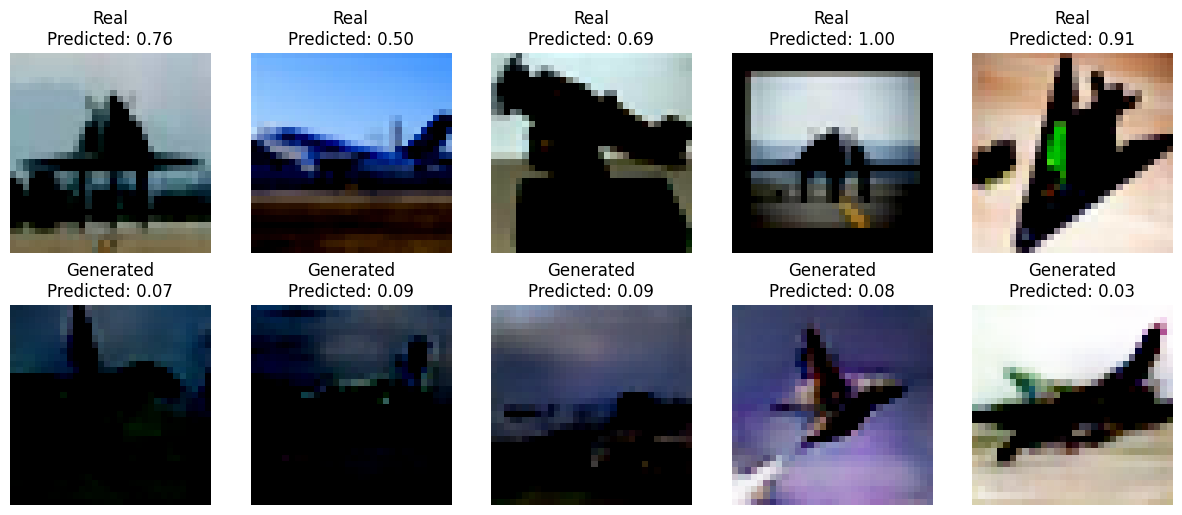

8500 [D loss: 0.319023, acc.: 89.84%] [G loss: 1.827381]
2/2 [==============================] - 0s 4ms/step
Discriminator Predictions for Real Data:
1/1 [==============================] - 0s 20ms/step
[[0.8734601 ]
 [0.7882729 ]
 [0.9909808 ]
 [0.68242216]
 [0.3891989 ]]
Discriminator Predictions for Generated Data:
1/1 [==============================] - 0s 19ms/step
[[0.21859567]
 [0.03728228]
 [0.09217615]
 [0.03822171]
 [0.17659447]]
1/1 [==============================] - 0s 21ms/step


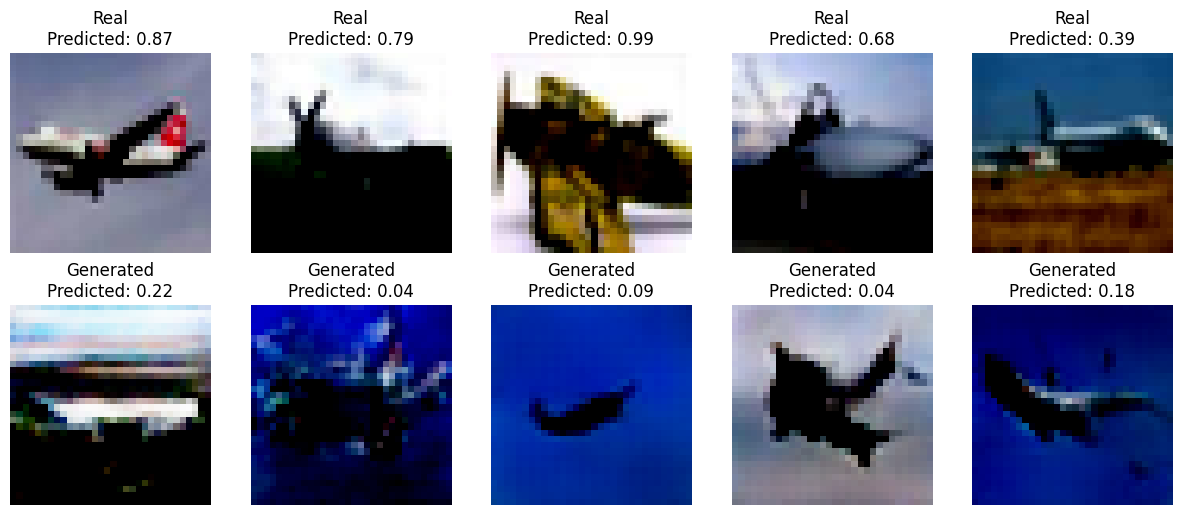

9500 [D loss: 0.324186, acc.: 88.28%] [G loss: 2.285570]
2/2 [==============================] - 0s 4ms/step


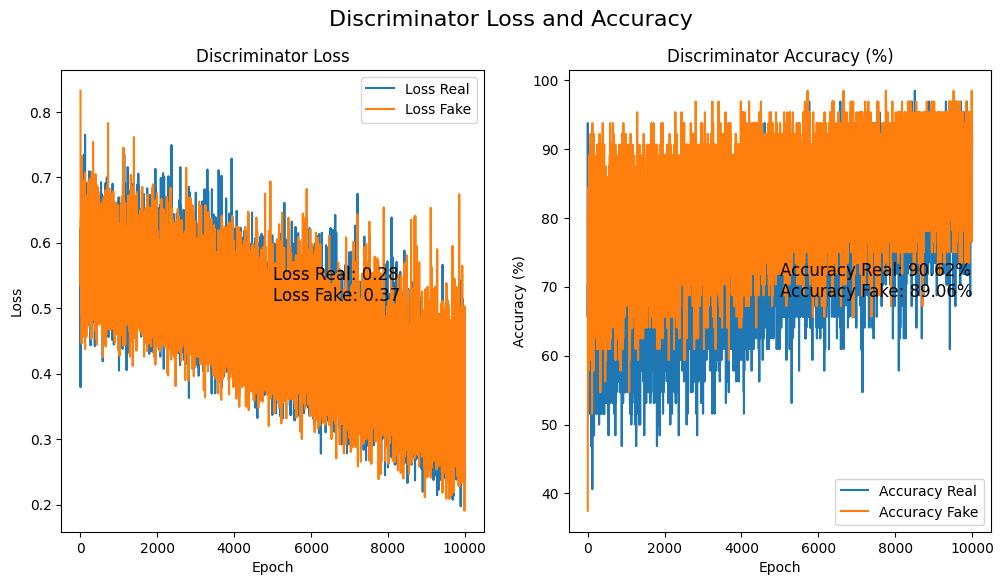

In [39]:
# Create a new GAN instance
gan = GAN()

# Specify the epoch from which you want to resume training
resume_epoch =5000  # Change this to the epoch you want to start from

# Load the weights for the specified epoch
load_model_weights(gan, resume_epoch)

# Continue training for additional epochs
additional_epochs = 5000  # Adjust the number of additional epochs as needed

gan.train(noise_function=generate_random_noise, epochs=resume_epoch + additional_epochs, batch_size=64, save_interval=500)
